<a href="https://colab.research.google.com/github/sebasqv05/ML_Churn/blob/main/TP1/ML_Model_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miembros del Proyecto

*  Sebastian Quesada Valencia
*  Estefanía Zuluaga Quintero


# Introducción

Uno de los retos más importantes que tienen las compañías de servicios como internet es entender cuántos clientes abandonan el servicio y las razones por las cuales esto sucede. Al ser una industria con muchos competidores en el mercado, los usuarios tienden a ser susceptibles a diferentes factores como precio, calidad de servicio, calidad de red, entre otros; y como es bien sabido, una vez un cliente se va es complicado que éste regrese.

El objetivo principal de este proyecto es generar un modelo predictivo que permita identificar, de acuerdo a patrones de comportamiento de los clientes en esta base de datos, la probabilidad de que el cliente cancele el servicio. Esto permitirá a los directivos de las diferentes áreas de la compañía tomar decisiones más informadas y orientadas a mejorar el servicio y generar mejores estrategias de retención de manera tal que los clientes decidan no irse con la competencia.

Este análisis se realiza a partir de un indicador llamado Churn Rate, el cual evalúa el porcentaje de clientes que cancelan el servicio en un periodo de tiempo y cuántas pérdidas puede generar esto para el negocio.


#Objetivo del trabajo
El churn rate es un indicador clave para las empresas que prestan servicios por suscripción (ya sea prepagados o pospago). En el caso de las empresas de telecomuncaciones, este indicador es clave para evaluar qué tan sanos son sus clientes y la sostenibilidad que tiene la empresa dentro de un mercado altamente competido. Es por ello que el trabajo tiene 2 objetivos:

1.   Evaluar el churn actual que tiene la empresa
2.   Generar un modelo predictivo con el cual se pueda prever si un cliente va a cancelar el servicio


#Contexto comercial
El área comercial ha visto un comportamiento inusual en el Q3 del año en la tasa de deserción en el área de California en donde opera. A pesar que tienen una serie de hipótesis de las razones de cancelaciones, solicitan un análisis profundo de por qué se presentaron estas cancelaciones, y piden un modelo para poder predecir si un cliente va a cancelar, con el fin de generar acciones proactivas para fidelizarlo.

#Problema comercial
Se deben responder las preguntas:
* ¿Cuáles son las razones principales (top 5) por las que los clientes han decidido cancelar el servicio con la compañía? ¿Varía si es hombre a si es mujer?
* ¿Cuánto es la duración promedio con el servicio de acuerdo con el género?
* ¿Cuál es el tipo de contrato con el que los usuarios tienen mayor tasa de deserción?
* ¿Cuál es la distribución de la tasa de deserción por género?
* ¿Cuál es la distribución de precios que pagan los usuarios de acuerdo con el tipo de contrato?
* ¿Cómo se distribuye el valor que pagan los usuarios por el servicio de internet de acuerdo con el tipo de servicio contratado?
* ¿Cuál es la participación de cada tipo de contrato de acuerdo con el número de usuarios de la base de datos?



#Contexto analítico
Se proporciona un archivo en .CSV alojado en Github, que contiene detalles de la ubicación, el género, tipo de servicio, valor mensual, motivo de cancelación, tiempo de duración con el servicio, tipo de contrato, entre otros datos que permiten analizar la información desde diversos puntos de vista y sacar conclusiones más acertadas acerca del comportamiento de los usuarios.


# Importar Dataset de Github

↓ Este dataframe trae la base de datos de clientes de una empresa de telecomunicaciones con variables demográficas, geográficas y conductuales (o de comportamiento). La muestra es de 7.043 datos y 33 columnas.

In [ ]:
# Esto me clona los archivos que se encuentra en la ruta de Git
# y me los ubica en mis carpetas dentro de Google Colab
! git clone https://github.com/sebasqv05/ML_Churn

Cloning into 'ML_Churn'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 1.25 MiB | 6.58 MiB/s, done.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#manejo de data
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import math
import scipy
from scipy import stats

df = pd.read_excel('/content/ML_Churn/Telco_customer_churn.xlsx')
df.index = df['CustomerID'] #usar esta columna como index
df = df.drop('CustomerID', axis='columns') #elimina la columna que se colocó como index
df = pd.DataFrame(df)
df.head(5).T

CustomerID                           3668-QPYBK             9237-HQITU  \
Count                                         1                      1   
Country                           United States          United States   
State                                California             California   
City                                Los Angeles            Los Angeles   
Zip Code                                  90003                  90005   
Lat Long                 33.964131, -118.272783  34.059281, -118.30742   
Latitude                              33.964131              34.059281   
Longitude                           -118.272783             -118.30742   
Gender                                     Male                 Female   
Senior Citizen                               No                     No   
Partner                                      No                     No   
Dependents                                   No                    Yes   
Tenure Months                                 2                      2   
Phone Service                               Yes                    Yes   
Multiple Lines                               No                     No   
Internet Service                            DSL            Fiber optic   
Online Security                             Yes                     No   
Online Backup                               Yes                     No   
Device Protection                            No                     No   
Tech Support                                 No                     No   
Streaming TV                                 No                     No   
Streaming Movies                             No                     No   
Contract                         Month-to-month         Month-to-month   
Paperless Billing                           Yes                    Yes   
Payment Method                     Mailed check       Electronic check   
Monthly Charges                           53.85                   70.7   
Total Charges                            108.15                 151.65   
Churn Label                                 Yes                    Yes   
Churn Value                                   1                      1   
Churn Score                                  86                     67   
CLTV                                       3239                   2701   
Churn Reason       Competitor made better offer                  Moved   

CustomerID                     9305-CDSKC              7892-POOKP  \
Count                                   1                       1   
Country                     United States           United States   
State                          California              California   
City                          Los Angeles             Los Angeles   
Zip Code                            90006                   90010   
Lat Long           34.048013, -118.293953  34.062125, -118.315709   
Latitude                        34.048013               34.062125   
Longitude                     -118.293953             -118.315709   
Gender                             Female                  Female   
Senior Citizen                         No                      No   
Partner                                No                     Yes   
Dependents                            Yes                     Yes   
Tenure Months                           8                      28   
Phone Service                         Yes                     Yes   
Multiple Lines                        Yes                     Yes   
Internet Service              Fiber optic             Fiber optic   
Online Security                        No                      No   
Online Backup                          No                      No   
Device Protection                     Yes                     Yes   
Tech Support                           No                     Yes   
Streaming TV                          Yes                     Yes   
Streaming Movies                      Y

In [ ]:
print(df.describe())

        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.00

In [ ]:
#Sección para consultar valores unicos de las razones de cancelación
print(pd.DataFrame(df['Churn Reason'].unique()))
#print(df.columns)

                                            0
0                Competitor made better offer
1                                       Moved
2               Competitor had better devices
3   Competitor offered higher download speeds
4                Competitor offered more data
5                              Price too high
6                     Product dissatisfaction
7                     Service dissatisfaction
8             Lack of self-service on Website
9                         Network reliability
10                  Limited range of services
11   Lack of affordable download/upload speed
12                      Long distance charges
13                         Extra data charges
14                                 Don't know
15           Poor expertise of online support
16            Poor expertise of phone support
17               Attitude of service provider
18                 Attitude of support person
19                                   Deceased
20                                

In [ ]:
contingency_table = pd.crosstab(df['Churn Value'], df['Churn Label'])

print(contingency_table)

Churn Label    No   Yes
Churn Value            
0            5174     0
1               0  1869


## Datos - columnas de interés

Se presenta la información en ingles ya que el dataset está en ingles y el cliente es de EEUU:

* CustomerID: A unique ID that identifies each customer.
Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* Country: The country of the customer’s primary residence.
* State: The state of the customer’s primary residence.
* City: The city of the customer’s primary residence.
* Zip Code: The zip code of the customer’s primary residence.
* Lat Long: The combined latitude and longitude of the customer’s primary residence.
* Latitude: The latitude of the customer’s primary residence.
* Longitude: The longitude of the customer’s primary residence.
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicate if the customer has a partner: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [ ]:
d_desc = {
          'CustomerID': 'A unique ID that identifies each customer. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.',
          'Country': 'The country of the customers primary residence',
          'State': 'The state of the customers primary residence',
          'City': 'The city of the customers primary residence.',
          'Zip code': 'The zip code of the customers primary residence.',
          'Lat Long': 'The combined latitude and longitude of the customers primary residence.',
          'Latitude': 'The latitude of the customers primary residence.',
          'Longitude': 'The longitude of the customers primary residence.',
          'Gender': 'The customer’s gender: Male, Female',
          'Senior Citizen': 'Indicates if the customer is 65 or older: Yes, No',
          'Partner': 'Indicate if the customer has a partner: Yes, No',
          'Dependents': 'Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.',
          'Tenure Months': 'Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.',
          'Phone Service': 'Indicates if the customer subscribes to home phone service with the company: Yes, No'                  ,
          'Multiple Lines': 'Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No',
          'Internet Service': 'Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.',
          'Online Security': 'Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No',
          'Online Backup': 'Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No',
          'Device Protection': 'Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No',
          'Tech Support': 'Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No',
          'Streaming Support': 'Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No.',
          'Streaming Movies': 'if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.',
          'Contract': 'Indicates the customers current contract type: Month-to-Month, One Year, Two Year.',
          'Paperless Billing': 'Indicates if the customer has chosen paperless billing: Yes, No',
          'Payment Method': 'Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check',
          'Monthly Charges': 'Indicates the customer’s current total monthly charge for all their services from the company.',
          'Total Charges': 'Indicates the customer’s total charges, calculated to the end of the quarter specified above.',
          'Churn Label':'Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.',
          'Churn Value': 'the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.',
          'Churn Score': ' A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.',
          'CLTV': 'Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.',
          'Churn Reason': 'A customer’s specific reason for leaving the company. Directly related to Churn Category.'}

In [ ]:
# Se convierte Total Charges a float
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Securit

In [ ]:
df[['Churn Reason']].nunique()

Churn Reason    20
dtype: int64

In [ ]:
df[['Online Backup']].value_counts()

Online Backup      
No                     3088
Yes                    2429
No internet service    1526
dtype: int64

## Metodos

In [ ]:
#promedio del periodo de permanencia de un cliente

def avg_tenure(x): #se crea funcion para sacar el promedio cogiendo una columna puntual
  new_df = df[[x, 'Tenure Months']] #selecciona las columnas
  new_df.index = new_df[x] #selecciona la columna como indice
  new_df = new_df.drop(x, axis=1) #elimina la columna duplicada
  avg_tenure = new_df.groupby(x).mean() #saca el promedio
  formatted_result = avg_tenure.round(2).astype(str)
  return formatted_result #retorna el resultado


print(avg_tenure('Internet Service'))

                 Tenure Months
Internet Service              
DSL                      32.82
Fiber optic              32.92
No                       30.55


In [ ]:
#calcula el churn rate agrupado con una columna

def churn_rate(x):
    grouped_df = df.groupby(x)['Churn Value'].sum()  # Group by 'x' column and sum the 'Churn Value'

    #total_customers = len(df[df['Churn Value'] == 0])  # Count the number of active customers
    total_customers = df.groupby(x)['Churn Value'].count()  # Count the number of active customers


    churn_rate = grouped_df / total_customers * 100  # Calculate churn rate
    #formatted_result = churn_rate.round(2).astype(str) + '%'

    return churn_rate

print(churn_rate('Internet Service'))

Internet Service
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn Value, dtype: float64


# Visualizaciones y análisis (EDA)

## Análisis univarido

### Medidas de tendencia central

In [ ]:
print(df[['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']].describe())

       Tenure Months  Monthly Charges  Churn Value  Churn Score         CLTV  \
count    7043.000000      7043.000000  7043.000000  7043.000000  7043.000000   
mean       32.371149        64.761692     0.265370    58.699418  4400.295755   
std        24.559481        30.090047     0.441561    21.525131  1183.057152   
min         0.000000        18.250000     0.000000     5.000000  2003.000000   
25%         9.000000        35.500000     0.000000    40.000000  3469.000000   
50%        29.000000        70.350000     0.000000    61.000000  4527.000000   
75%        55.000000        89.850000     1.000000    75.000000  5380.500000   
max        72.000000       118.750000     1.000000   100.000000  6500.000000   

       Total Charges  
count    7032.000000  
mean     2283.300441  
std      2266.771362  
min        18.800000  
25%       401.450000  
50%      1397.475000  
75%      3794.737500  
max      8684.800000  


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas_profiling

In [ ]:
df_num = pd.DataFrame(df[['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']])
profile = pandas_profiling.ProfileReport(df_num)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Tenure Months : Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
Monthly Charges : Indicates the customer’s current total monthly charge for all their services from the company.
Churn Score :  A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
CLTV : Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
Total Charges : Indicates the customer’s total charges, calculated to the end of the quarter specified above.


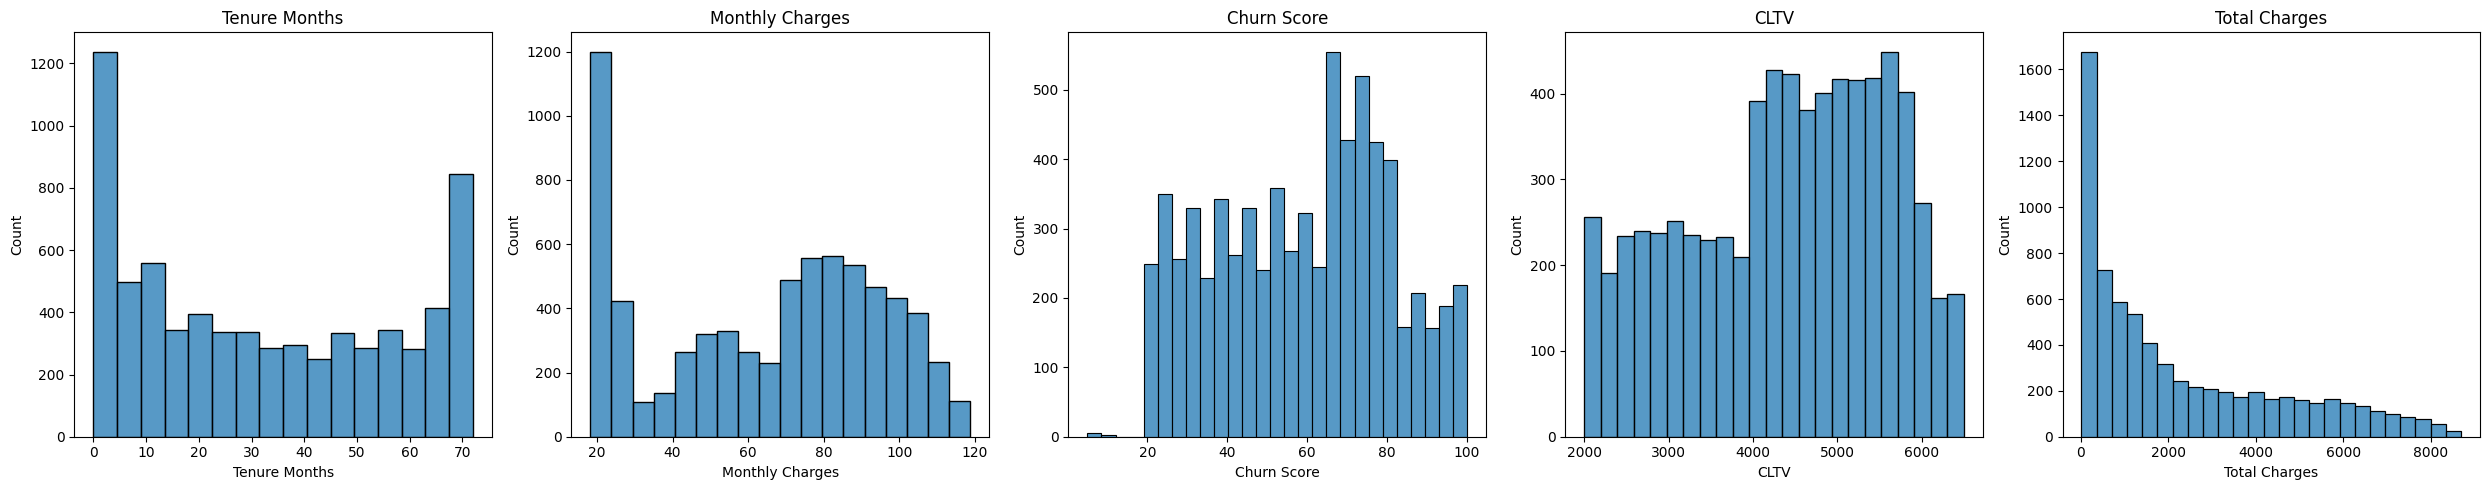

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV', 'Total Charges']
num_plots = len(x)

# Create a figure with a single row and 'num_plots' number of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

# Iterate over each column in 'x' and create a histogram subplot
for idx, col in enumerate(x):
    print(col, ':', d_desc[col])

    # Set the title of the subplot as the column name
    axs[idx].set_title(col)

    # Create a histogram using seaborn's histplot function and assign it to the current subplot
    sns.histplot(data=df_num, x=col, ax=axs[idx])

# Adjust the layout of the subplots for better spacing
plt.tight_layout()

# Display the figure with all the subplots
plt.show()


A continuaciòn se va a evauar las posibi¡lidades de generar una distribuciòn normal en las variables numéricas del dataSet

#### Churn Score

In [ ]:
x = 'Churn Score'

print('Descripción:' ,scipy.stats.describe(df_num[x])) #skewness= Coeficiende de Asimetría (CA)
print('Media geométrica:', scipy.stats.gmean(df_num[x]))
print('Media armónica:', scipy.stats.hmean(df_num[x]))
print('Media recortada', scipy.stats.trim_mean(df_num[x],0.1))
print('Moda:', scipy.stats.mode(df_num[x]))
print('---------------')

Descripción: DescribeResult(nobs=7043, minmax=(5, 100), mean=58.69941786170666, variance=463.3312507261052, skewness=-0.08982085409848185, kurtosis=-1.0058171013139976)
Media geométrica: 54.130500848948614
Media armónica: 48.98171045729639
Media recortada 58.73735581188998
Moda: ModeResult(mode=array([80]), count=array([151]))
---------------


* El CA es negativo, lo que siginifica que la cola de la distribución se extiende a valores superiores a la media
* La curtosis es menos a 2, lo que indica que la distribución es mezclada

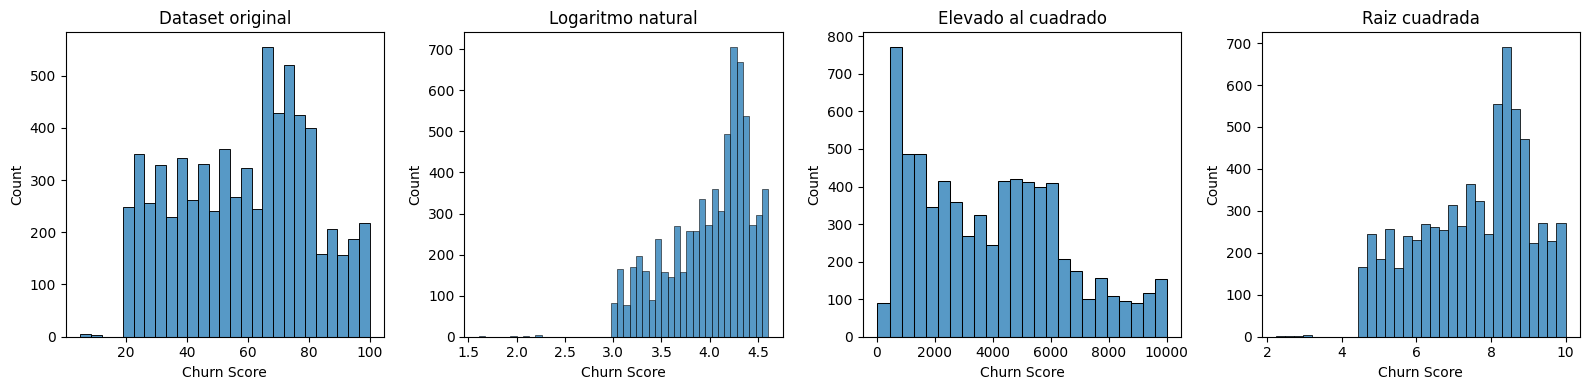

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Churn Score'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df_num, x=df_num[selected_x], ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df_num, x=np.log(df_num[selected_x]), ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df_num, x=df_num[selected_x]**2, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df_num, x=df_num[selected_x]**0.5, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

In [ ]:
prueba = pd.DataFrame(df_num)

prueba[selected_x] = prueba[selected_x]

# Calculate summary statistics
mean = prueba[selected_x].mean()
median = prueba[selected_x].median()
std_dev = prueba[selected_x].std()

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(prueba[selected_x])
shapiro_pvalue = shapiro_test.pvalue

# Perform Anderson-Darling test for normality
anderson_test = stats.anderson(prueba[selected_x])
anderson_statistic = anderson_test.statistic
anderson_critical_values = anderson_test.critical_values
anderson_significance_levels = anderson_test.significance_level

print("Summary Statistics:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print()
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_pvalue)
print()
print("Anderson-Darling Test:")
print("Test Statistic:", anderson_statistic)
print("Critical Values:", anderson_critical_values)
print("Significance Levels:", anderson_significance_levels)

Summary Statistics:
Mean: 58.69941786170666
Median: 61.0
Standard Deviation: 21.525130678490786

Shapiro-Wilk Test:
Test Statistic: 0.9683816432952881
p-value: 1.0318140400759399e-36

Anderson-Darling Test:
Test Statistic: 61.04098840639199
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


In [ ]:
prueba = pd.DataFrame(df_num)

prueba[selected_x] = prueba[selected_x]**0.5

# Calculate summary statistics
mean = prueba[selected_x].mean()
median = prueba[selected_x].median()
std_dev = prueba[selected_x].std()

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(prueba[selected_x])
shapiro_pvalue = shapiro_test.pvalue

# Perform Anderson-Darling test for normality
anderson_test = stats.anderson(prueba[selected_x])
anderson_statistic = anderson_test.statistic
anderson_critical_values = anderson_test.critical_values
anderson_significance_levels = anderson_test.significance_level

print("Summary Statistics:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print()
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_pvalue)
print()
print("Anderson-Darling Test:")
print("Test Statistic:", anderson_statistic)
print("Critical Values:", anderson_critical_values)
print("Significance Levels:", anderson_significance_levels)

Summary Statistics:
Mean: 7.5169295781639045
Median: 7.810249675906654
Standard Deviation: 1.4817217371995486

Shapiro-Wilk Test:
Test Statistic: 0.9579399824142456
p-value: 5.298169363765701e-41

Anderson-Darling Test:
Test Statistic: 93.59366803712692
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


Certainly! Here's a breakdown of how you can analyze each result:

Summary Statistics:
- Mean: The average value of the 'Churn Score' variable.
- Median: The middle value of the 'Churn Score' variable.
- Standard Deviation: A measure of the variability or spread of the 'Churn Score' values around the mean.

Shapiro-Wilk Test:
- Test Statistic: A numerical value calculated by the Shapiro-Wilk test to evaluate the departure from normality. A lower value indicates a greater departure from normality.
- p-value: The probability associated with the test statistic. It indicates the likelihood of observing the data if the distribution is normal. A higher p-value suggests a stronger evidence for normality.

Anderson-Darling Test:
- Test Statistic: A numerical value calculated by the Anderson-Darling test to assess the departure from normality. A higher value indicates a greater departure from normality.
- Critical Values: A set of critical values at different significance levels (e.g., 15%, 10%, 5%, 2.5%, and 1%). These values are used to compare against the test statistic. If the test statistic is larger than the critical value at a given significance level, it suggests a departure from normality.
- Significance Levels: The corresponding significance levels for the critical values. These indicate the probability of rejecting the null hypothesis of normality when it is true.

Here's how you can interpret the results:
- If the p-value from the Shapiro-Wilk test is greater than a chosen significance level (e.g., 0.05), it suggests that the 'Churn Score' variable is likely normally distributed.
- If the p-value is smaller than the chosen significance level, it provides evidence against the null hypothesis of normality.
- The test statistic from the Anderson-Darling test can be compared against the critical values. If the test statistic is larger than the critical value at a certain significance level, it indicates a departure from normality at that significance level.
- Consider the magnitude of the test statistic and compare it to the critical values at different significance levels to determine the level of departure from normality.

Remember that the interpretation of normality tests depends on the chosen significance level and the context of your analysis. It's important to consider the specific requirements and assumptions of your machine learning model or statistical analysis when interpreting these results.

#### Monthly Charges

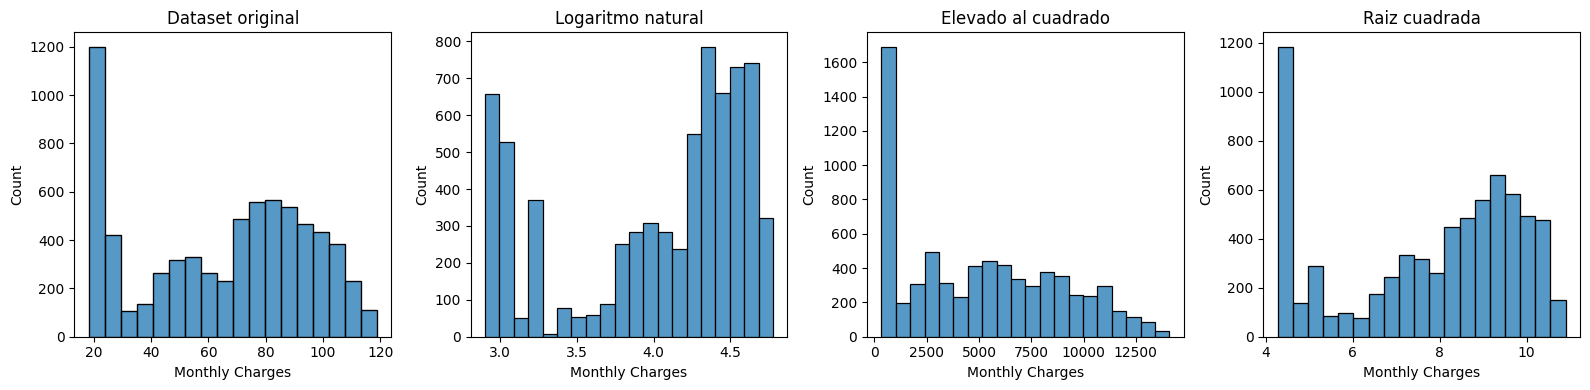

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Monthly Charges'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df_num, x=df_num[selected_x], ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df_num, x=np.log(df_num[selected_x]), ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df_num, x=df_num[selected_x]**2, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df_num, x=df_num[selected_x]**0.5, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

#### CLTV

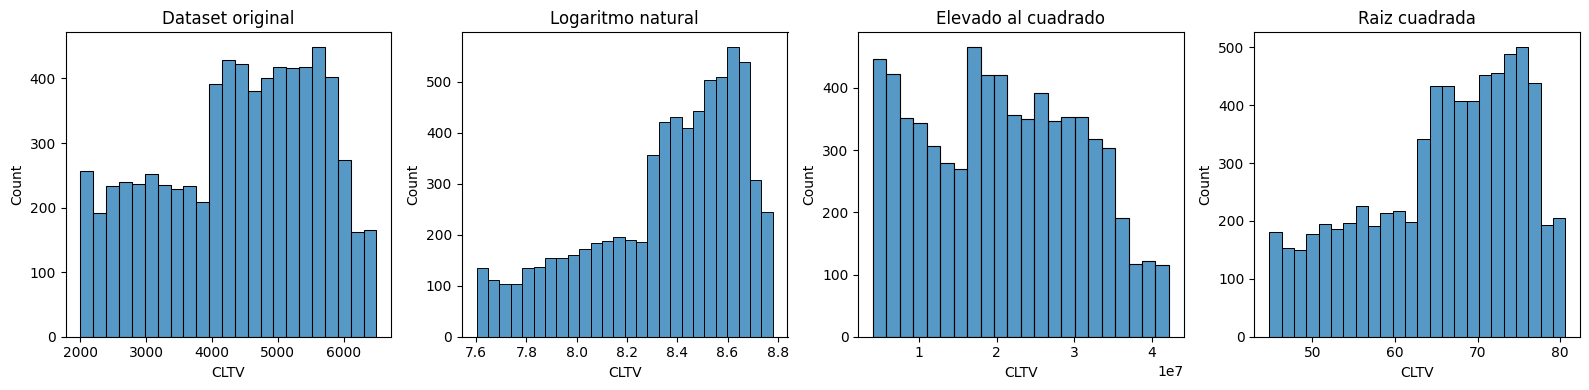

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'CLTV'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df_num, x=df_num[selected_x], ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df_num, x=np.log(df_num[selected_x]), ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df_num, x=df_num[selected_x]**2, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df_num, x=df_num[selected_x]**0.5, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

#### Tenure Months

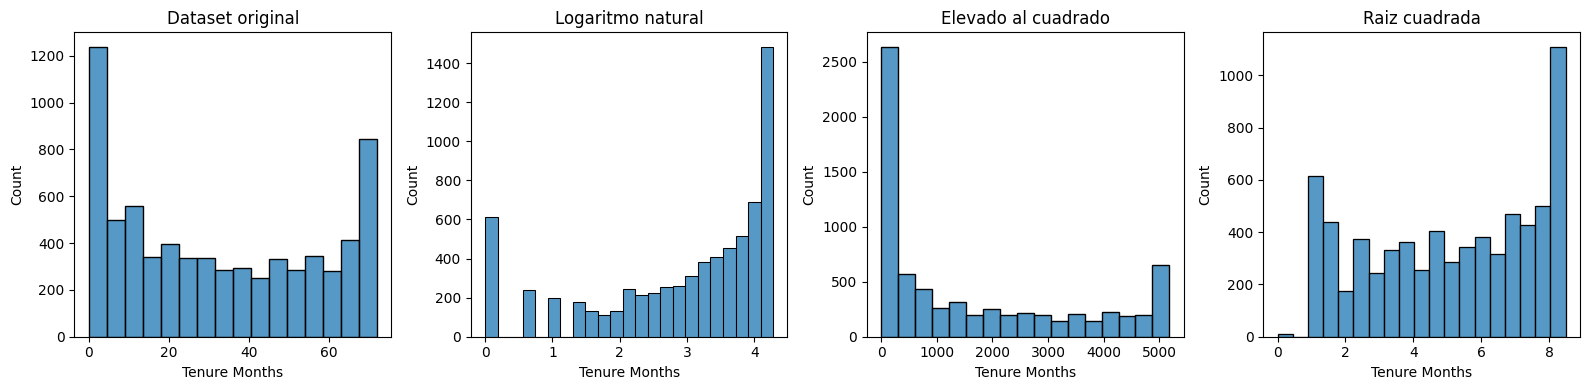

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']
selected_x = 'Tenure Months'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df_num, x=df_num[selected_x], ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df_num, x=np.log(df_num[selected_x]), ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df_num, x=df_num[selected_x]**2, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df_num, x=df_num[selected_x]**0.5, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

### Gráficos estadísticos y medidas de localización

↓ De acuerdo con el resultado de la siguiente gráfica se puede concluir que la mayoría de los usuarios se han retirado por desacuerdos con la actitud del personal de servicio al cliente y por la velocidad que ofrecen otros competidores en el mercado. Esto permite inferir que la mayor parte de los usuarios no es tan sensible al precio sino que presta especial atención a otros aspectos del servicio, como la calidad del servicio del asesor.


In [ ]:
df_ajustado = pd.DataFrame(df[df['Churn Reason'] != 'Activo'])
df_ajustado['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

Cantidad de datos: 837


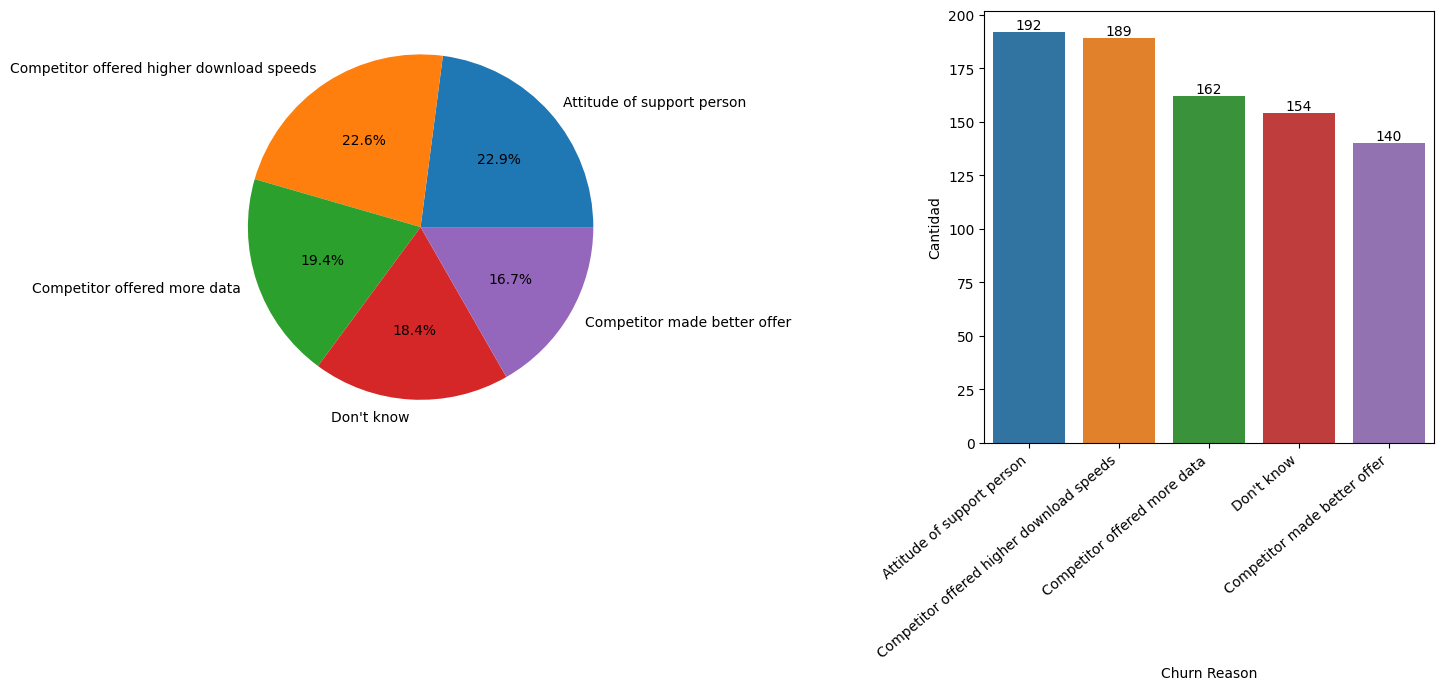

In [ ]:
df_ajustado = pd.DataFrame(df[df['Churn Reason'] != 'Activo'])
top_reasons = df_ajustado['Churn Reason'].value_counts().nlargest(5)
df_top_reasons = pd.DataFrame({'Churn Reason': top_reasons.index, 'Cantidad': top_reasons.values})

q = df_top_reasons['Cantidad'].sum()

print(f'Cantidad de datos: {q}')

f, axs = plt.subplots(1, 2, figsize=(15,7), gridspec_kw=dict(width_ratios=[3, 2]))

#plt.figure(figsize=(8,6))
axs[0].pie(df_top_reasons['Cantidad'], labels = df_top_reasons['Churn Reason'], autopct='%1.1f%%')

axs[1] = sns.barplot(data=df_top_reasons, x='Churn Reason', y='Cantidad')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=40, ha="right")

for i, v in enumerate(top_reasons):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

↓ El 89% de las cancelaciones durante este periodo fue del contrato M2M, mientras que el de 1Y fue de 9% y 2Y de 2%.

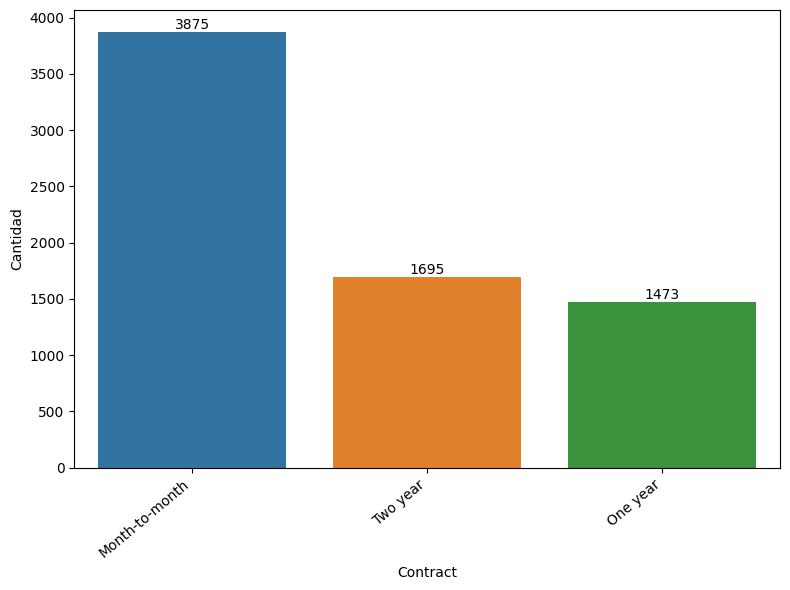

In [ ]:
df_ajustado = pd.DataFrame(df[df['Churn Reason'] != 'Activo'])
top_reasons = df_ajustado['Contract'].value_counts().nlargest(5)
df_top_reasons = pd.DataFrame({'Contract': top_reasons.index, 'Cantidad': top_reasons.values})

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_top_reasons, x='Contract', y='Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

for i, v in enumerate(top_reasons):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

↓ Del gráfico se puede ver que en el contrato M2M las cancelaciones se caracterizan principlanente por la actitud del asesor (24%), y paradojicamente, en 3er lugar se encuentra que el cliente no sabe por qué cancela. Esto cuestiona si el asesor diligenció correctamente esta informaciòn.

Frente a los otros dos contratos, las 2 primeras posiciones, las cuales constituyen más del 50% de la muestra de las cancelaciones, se caracterizan por alguna acción de la competencia.

Gráficos del contrato: Month-to-month
Cantidad de datos: 742


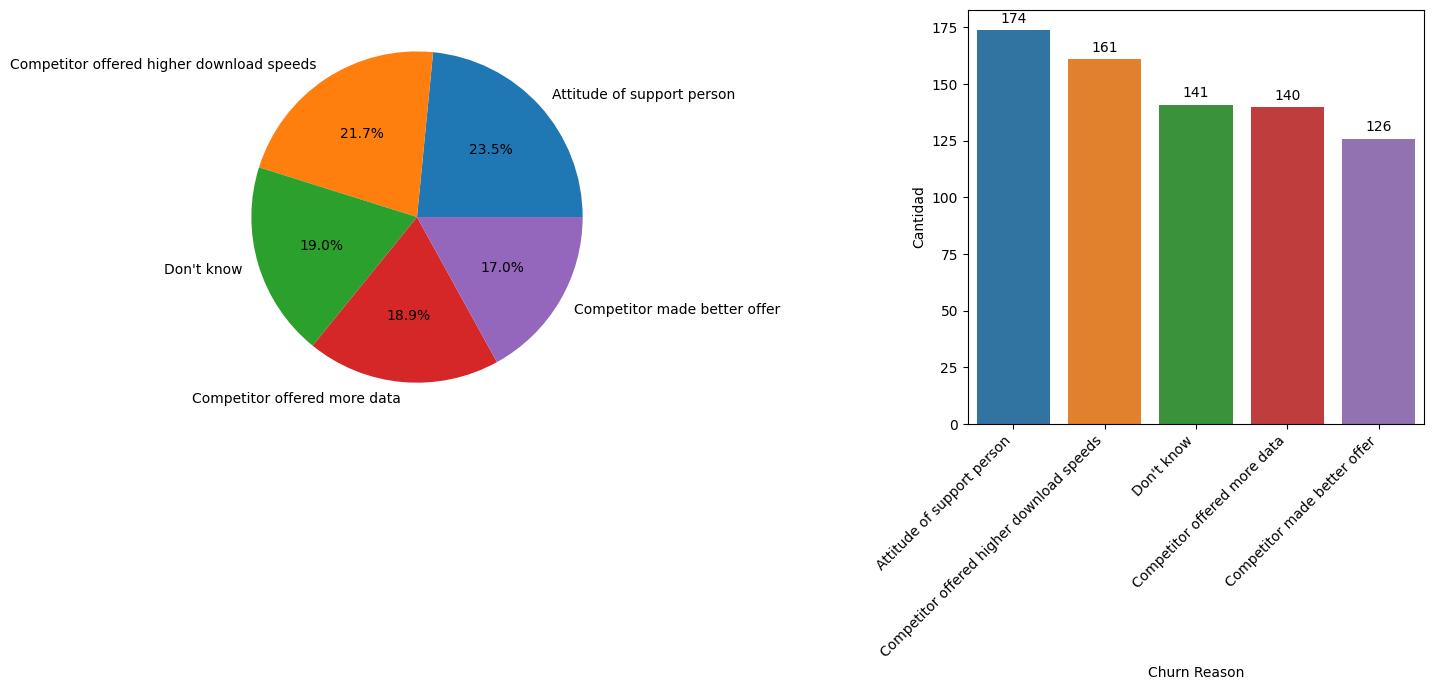

Gráficos del contrato: One year
Cantidad de datos: 77


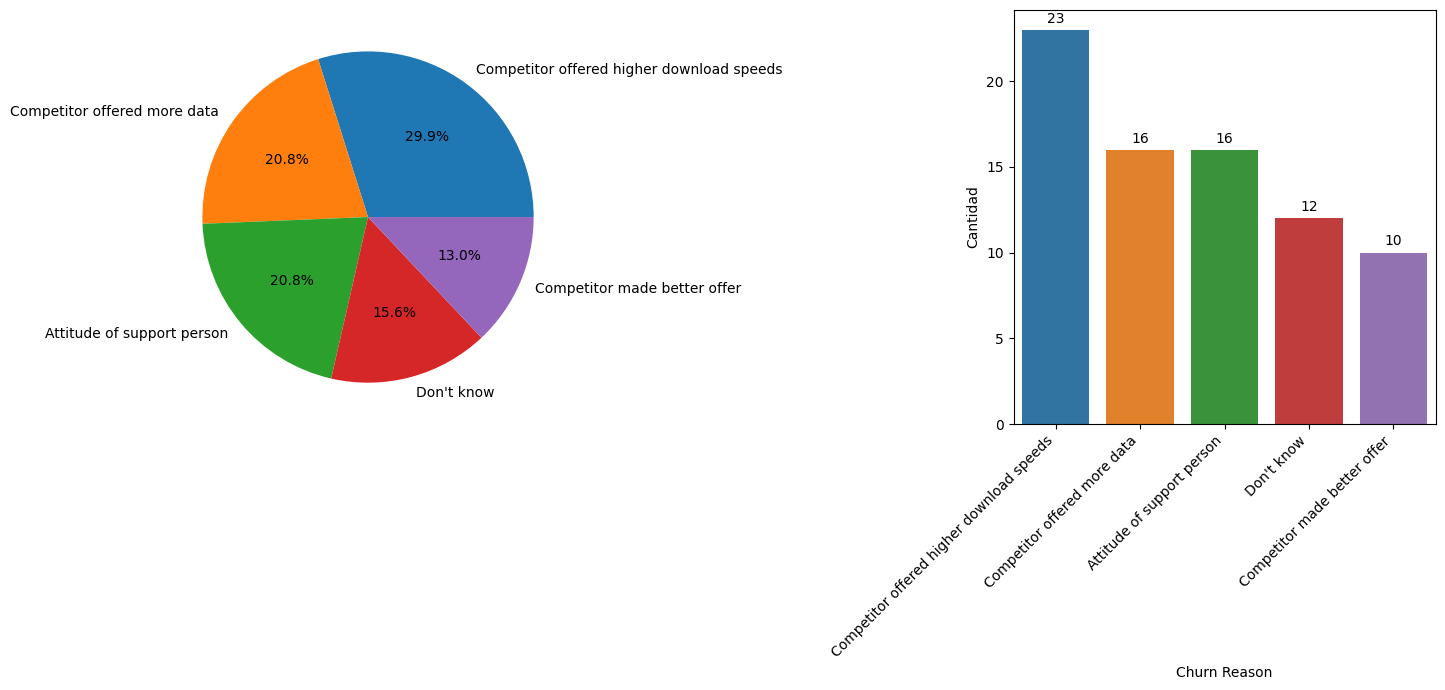

Gráficos del contrato: Two year
Cantidad de datos: 18


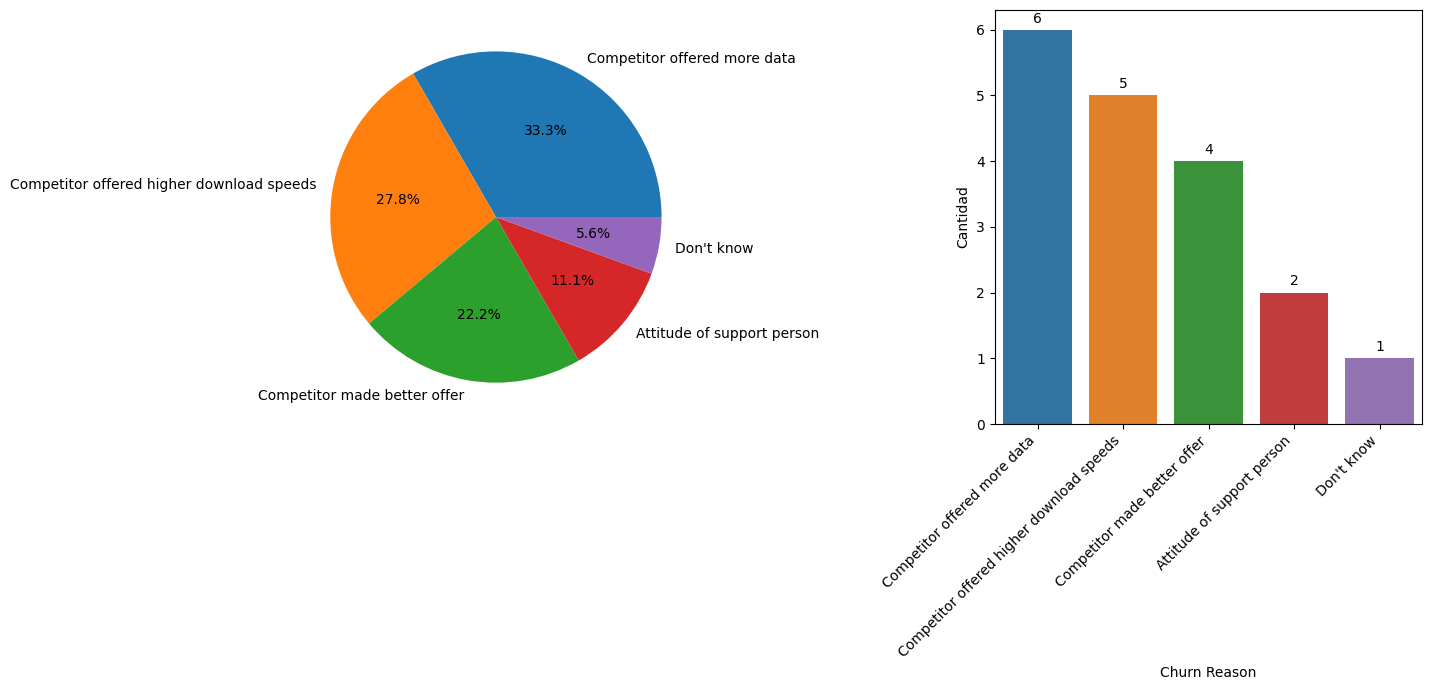

In [ ]:
#se aislan el top 5 de las razones de cancelación para hacer un grafico de distribución
df_top_reasons = ["Attitude of support person",
     "Competitor offered higher download speeds",
     "Competitor offered more data",
     "Don't know",
     "Competitor made better offer"]

top_reasons = pd.DataFrame(df_ajustado[['Churn Reason', 'Contract']].value_counts().reset_index(name='Cantidad'))
top_reasons = top_reasons[top_reasons['Churn Reason'].isin(df_top_reasons)]

x = ['Month-to-month',
     'One year',
     'Two year']

for i in x:
  print(f'Gráficos del contrato: {i}')
  filtered_data = top_reasons[top_reasons['Contract'] == i].sum()['Cantidad']
  print(f'Cantidad de datos: {filtered_data}')
  w = [i]
  filtered_data = top_reasons[top_reasons['Contract'].isin(w)]

  f, axs = plt.subplots(1, 2, figsize=(15,7), gridspec_kw=dict(width_ratios=[3, 2]))

  axs[0].pie(filtered_data['Cantidad'], labels = filtered_data['Churn Reason'], autopct='%1.1f%%')
  axs[1] = sns.barplot(data=filtered_data, x=filtered_data['Churn Reason'], y=filtered_data['Cantidad'])


  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-label text by 45 degrees and align to right

  for bar in axs[1].patches:   #Para agregar las etiquetas de datos en la gráfica de barras
      height = bar.get_height()
      axs[1].annotate(f'{height:.0f}',  # Format the label text
                      xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                      xytext=(0, 3),  # Offset of the label from the bar
                      textcoords='offset points',
                      ha='center', va='bottom')


  plt.tight_layout()
  plt.show()

In [ ]:
prueba = top_reasons[['Churn Reason', 'Contract','Cantidad']].groupby(['Churn Reason', 'Contract']).sum().sort_values(by=['Cantidad'], ascending=False)
prueba

Cantidad
Churn Reason                              Contract                
Attitude of support person                Month-to-month       174
Competitor offered higher download speeds Month-to-month       161
Don't know                                Month-to-month       141
Competitor offered more data              Month-to-month       140
Competitor made better offer              Month-to-month       126
Competitor offered higher download speeds One year              23
Attitude of support person                One year              16
Competitor offered more data              One year              16
Don't know                                One year              12
Competitor made better offer              One year              10
Competitor offered more data              Two year               6
Competitor offered higher download speeds Two year               5
Competitor made better offer              Two year               4
Attitude of support person                Two year               2
Don't know                                Two year               1

↓ Del gráfico se puede interpretar que gran parte de los clientes que tuvieron el servicio con la empresa tuvieron un precio del servicio entre 20 a 30USD. Sin embargo, falta informaciòn relevante para poder categorizar bien la distribución.

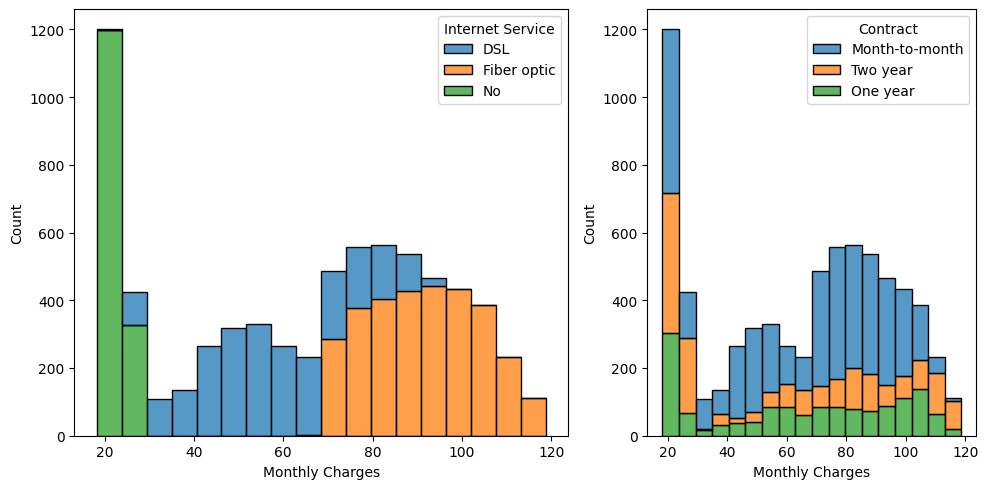

In [ ]:
#Histograma del costo por mes


MonthlyCharges = df['Monthly Charges']
TotalCharges = df['Total Charges']
TenureMonths = df['Tenure Months']
CLTV = df['CLTV']
Churn_score = df['Churn Score']
Internet_service = df['Internet Service']
Contract = df['Contract']

f, axs = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=dict(width_ratios=[3, 2]))
sns.histplot(data=df, x=MonthlyCharges, hue='Internet Service', multiple="stack", ax=axs[0])
sns.histplot(data=df, x=MonthlyCharges, hue=Contract, multiple="stack", ax=axs[1])
f.tight_layout()


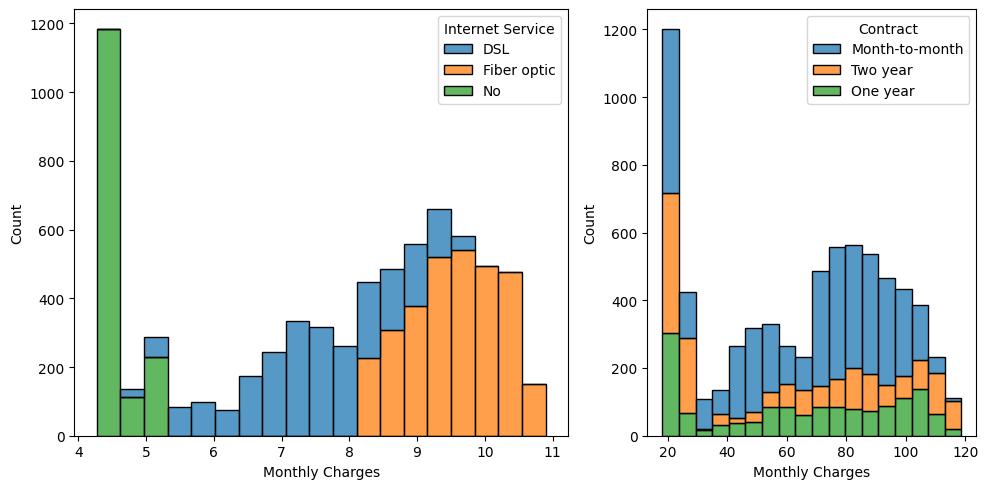

In [ ]:
#Histograma del costo por mes solo de las personas que cancelaron el servicio

df_ajustado = pd.DataFrame(df[df['Churn Reason'] != 'Activo'])


MonthlyCharges = df_ajustado['Monthly Charges']
TotalCharges = df_ajustado['Total Charges']
TenureMonths = df_ajustado['Tenure Months']
CLTV = df_ajustado['CLTV']
Churn_score = df_ajustado['Churn Score']
Internet_service = df_ajustado['Internet Service']
Contract = df_ajustado['Contract']

f, axs = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=dict(width_ratios=[3, 2]))
sns.histplot(data=df_ajustado, x=MonthlyCharges**0.5, hue='Internet Service', multiple="stack", ax=axs[0])
sns.histplot(data=df_ajustado, x=MonthlyCharges, hue=Contract, multiple="stack", ax=axs[1])
f.tight_layout()

↓ La distribución entre hombres y mujeres es muy equitativa en la muestra.

Adicionalmente, se puede ver que la mitad del CLTV proviene del Month-to-Month, lo cual es un insight importante para plantear estrategias de fidelización para que renueven el servicio con la compañía.

                    CLTV
Contract                
Month-to-month  16029745
One year         6672625
Two year         8288913


Text(0.5, 1.0, 'Piechart de distribución del CLTV por tipo de contrato')

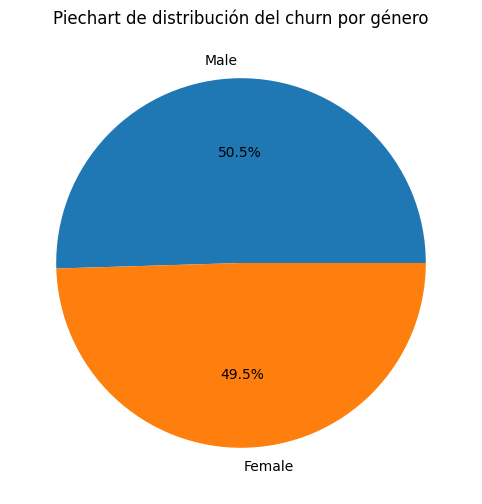

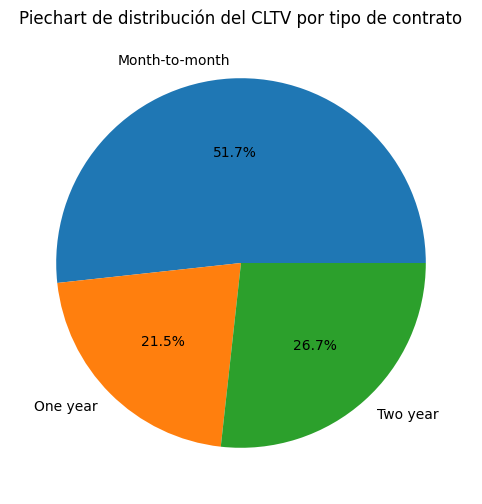

In [ ]:
#df.columns = df.columns.str.replace(' ', '')

serie_Gender = df['Gender'].value_counts()
serie_Gender

plt.figure(figsize=(10, 6))
plt.pie(serie_Gender, labels = serie_Gender.index, autopct='%1.1f%%')
plt.title('Piechart de distribución del churn por género')

serie_CLTV = df[['Contract', 'CLTV']].groupby('Contract').sum()
serie_CLTV = pd.DataFrame(serie_CLTV)
print(serie_CLTV)

plt.figure(figsize=(10, 6))
plt.pie(serie_CLTV['CLTV'], labels = serie_CLTV.index, autopct='%1.1f%%')
plt.title('Piechart de distribución del CLTV por tipo de contrato')

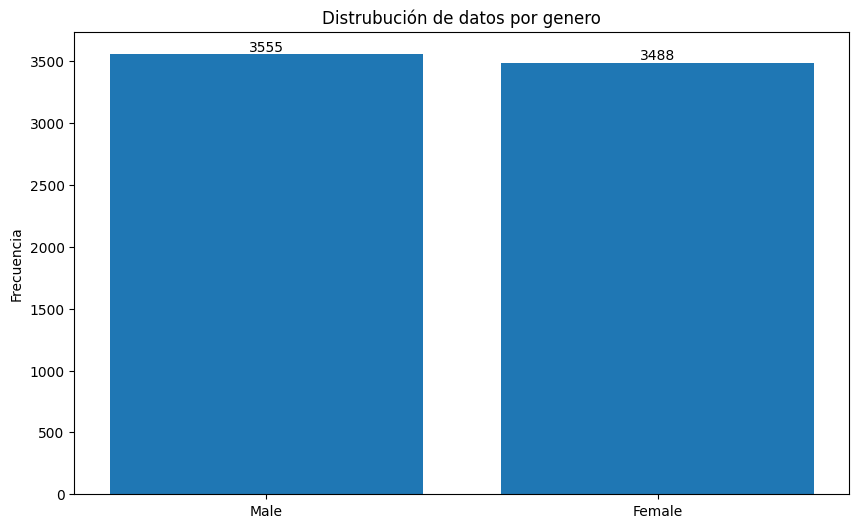

In [ ]:
gender_df = df['Gender'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(gender_df.index, gender_df)
plt.title('Distrubución de datos por genero')
plt.ylabel('Frecuencia')

for i, v in enumerate(gender_df):
    plt.text(i, v, str(v), ha='center', va='bottom')

↓ Gran parte de la muestra tiene como tipo de contrato mensual, lo que demuestra la importancia que tienen estos clientes para la empresa.

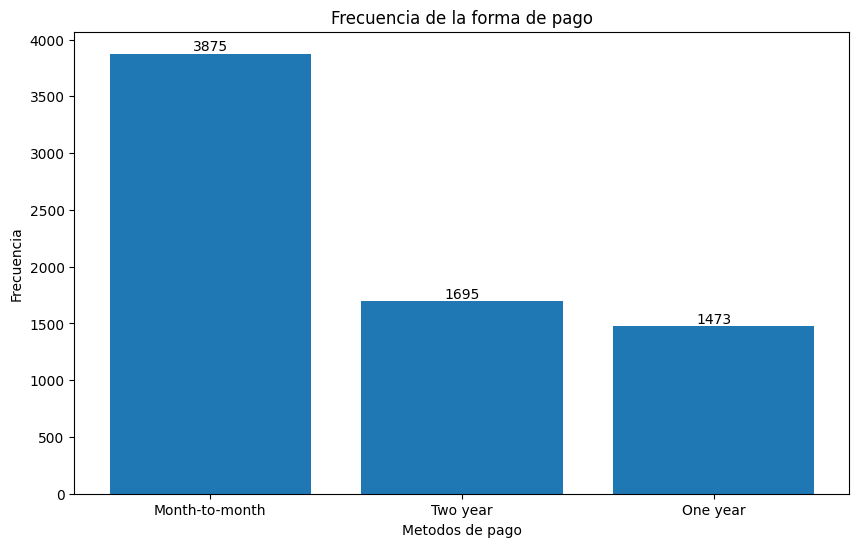

In [ ]:
serie_contrato = df['Contract'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(serie_contrato.index, serie_contrato)
plt.title('Frecuencia de la forma de pago')
plt.xlabel('Metodos de pago')
plt.ylabel('Frecuencia')

for i, v in enumerate(serie_contrato):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

↓ Como complemento del histograma anterior, gran parte de los clientes que se encuentran con un precio del servicio entre 20-30USD tienen contratos de un año o de un mes. De la misma manera, a lo largo de los rangos hasta llegar a precios de 110USD el contrato por mes tiene prevalencia sobre los demás. A partir de 110USD, los clientes suelen tener contratos por dos años.

<Axes: xlabel='Monthly Charges', ylabel='Count'>

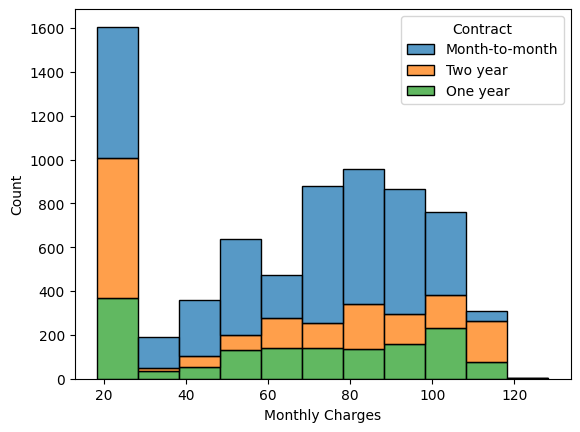

In [ ]:

sns.histplot(data=df , x=MonthlyCharges, hue= 'Contract', multiple='stack', binwidth= 10)

↓ Se puede ver que en todos los contratos el pago por cheque enviado por correo tiene prevalencia en los precios de 20-25USD, asi como también tiene una buena participación las transferencias de banco. En todos los contratos y precios se puede ver pagos por tarjeta de crédito.  El cheque electrónico solo tiene particiación en el contrato por mes, principalmente en los percios mayores a 70USD.

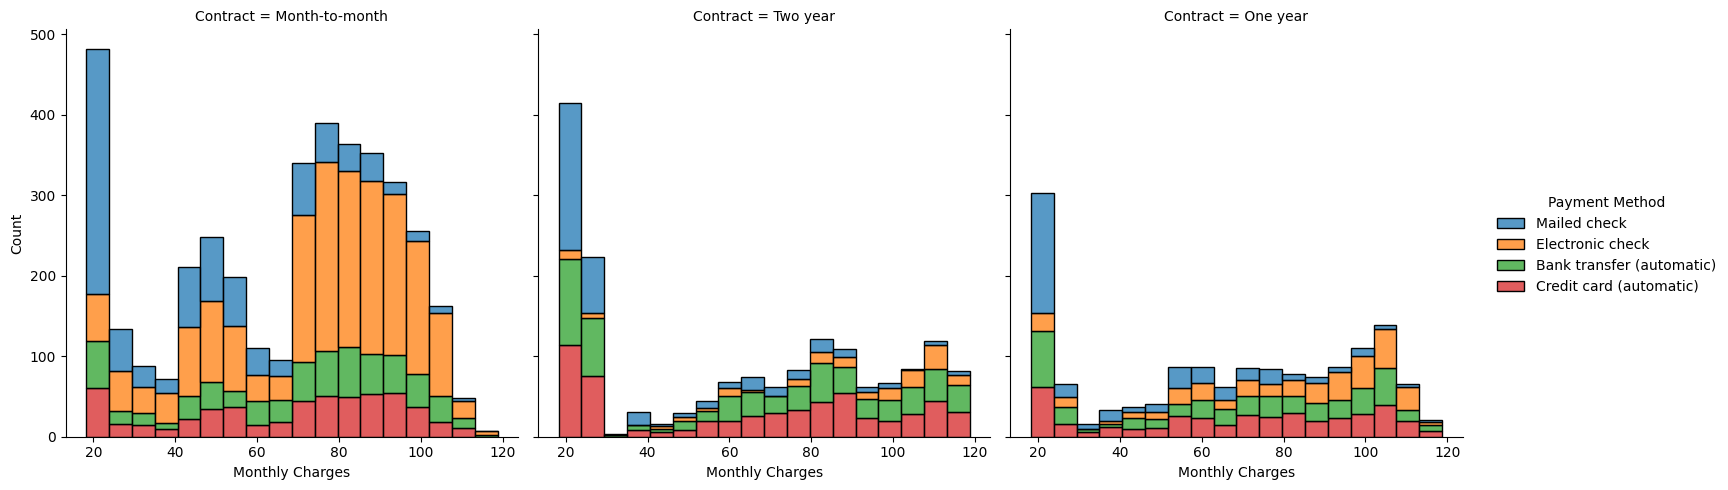

In [ ]:
sns.displot(data=df, x=MonthlyCharges, col='Contract', hue='Payment Method', multiple="stack")

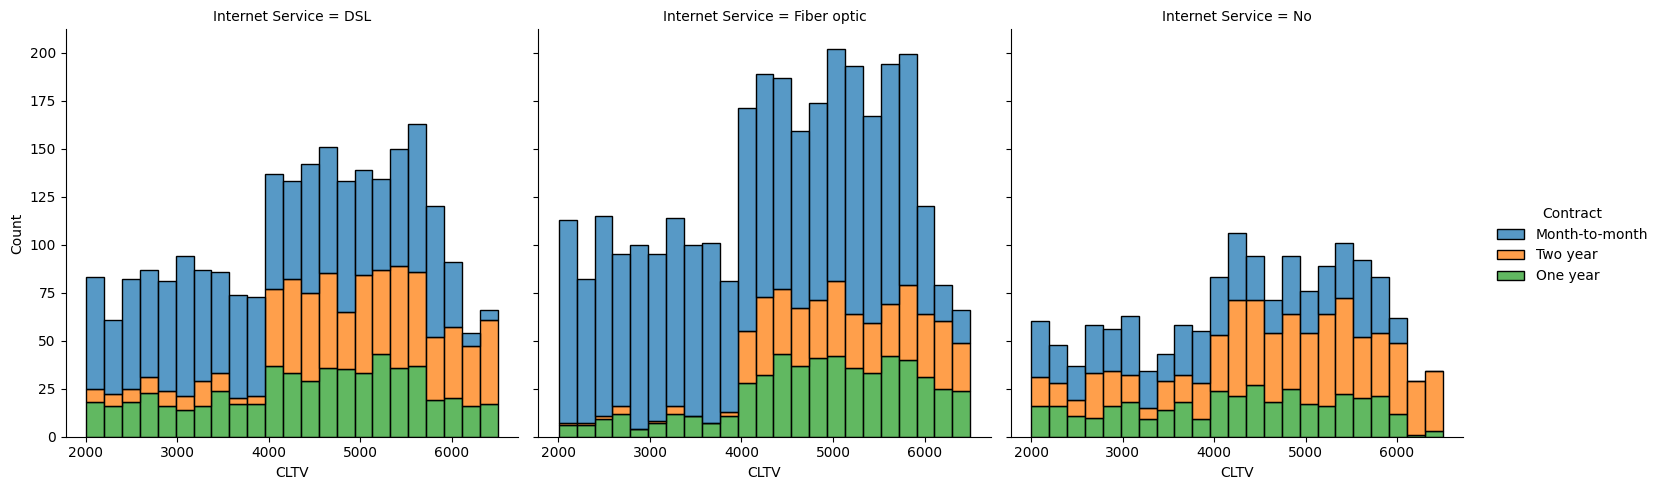

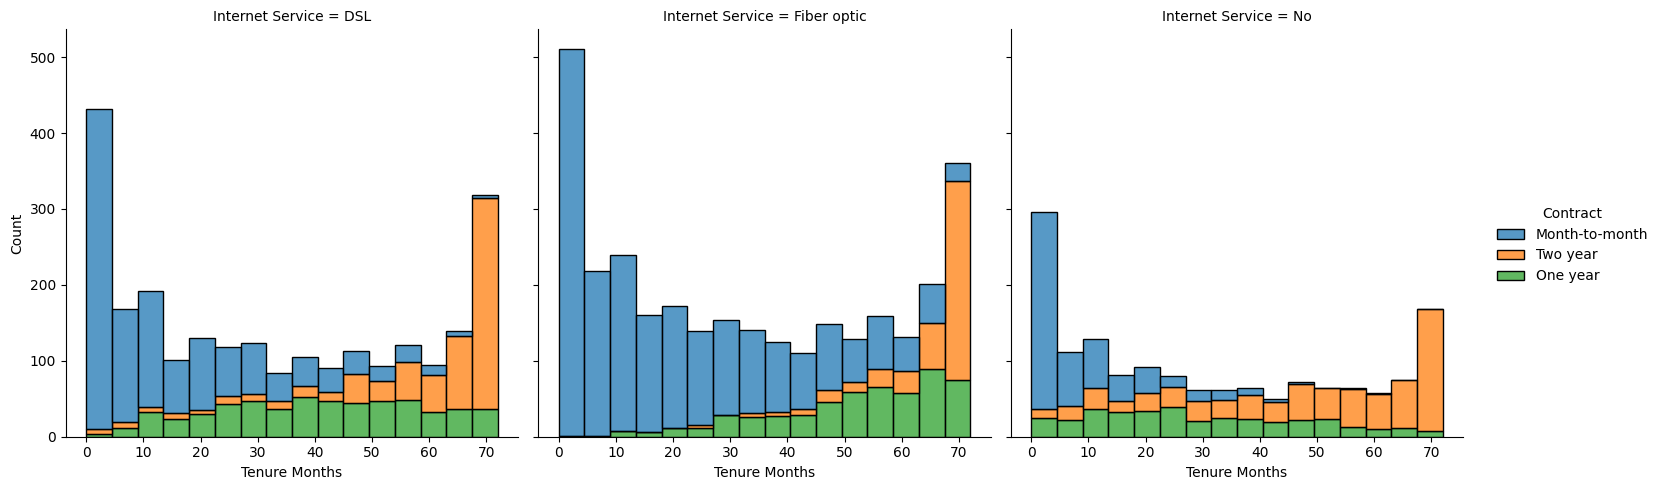

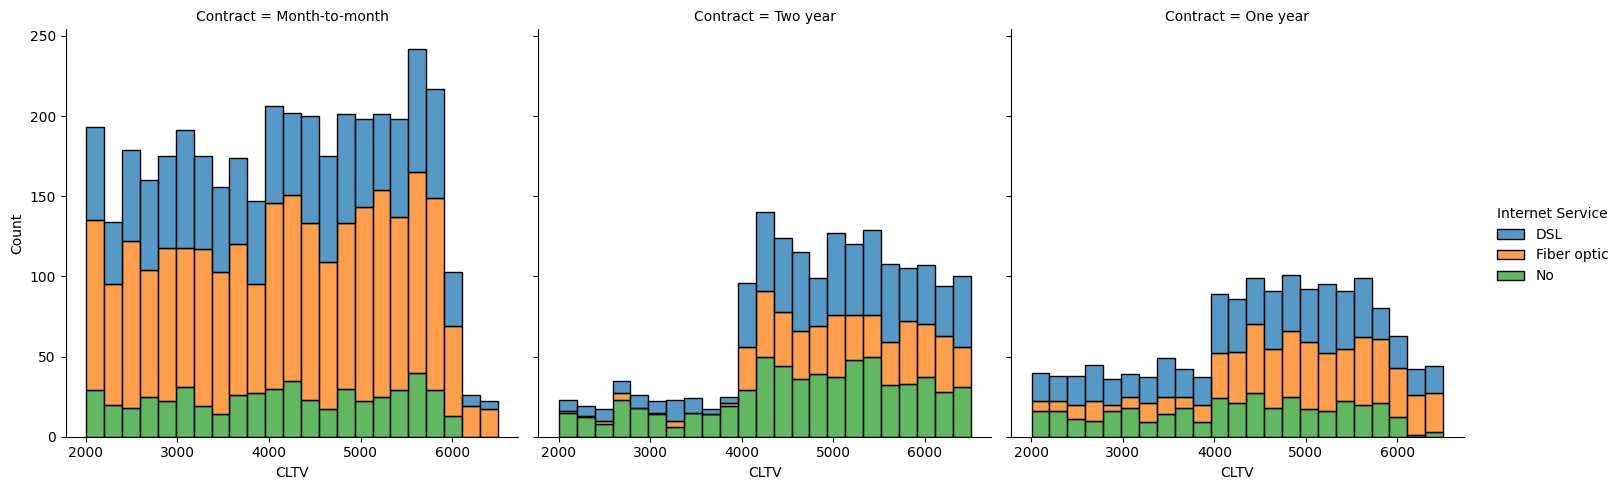

In [ ]:
sns.displot(data=df, x=CLTV, col='Internet Service', hue='Contract', multiple="stack")
sns.displot(data=df, x=TenureMonths, col='Internet Service', hue='Contract', multiple="stack")
sns.displot(data=df, x=CLTV, col='Contract', hue='Internet Service', multiple="stack")

↓ **Se calculó el churn** de acuerdo con el tipo de contrato y por el servicio de internet. En primer lugar, el churn del contrato M2M es del 43% en el trimestre vs. 11% y 3% del de 1Y y 2Y. Por otro lado, el churn de fibra es del 42% en un solo trimestre, lo cual es alarmante ya que es el servicio más costoso.

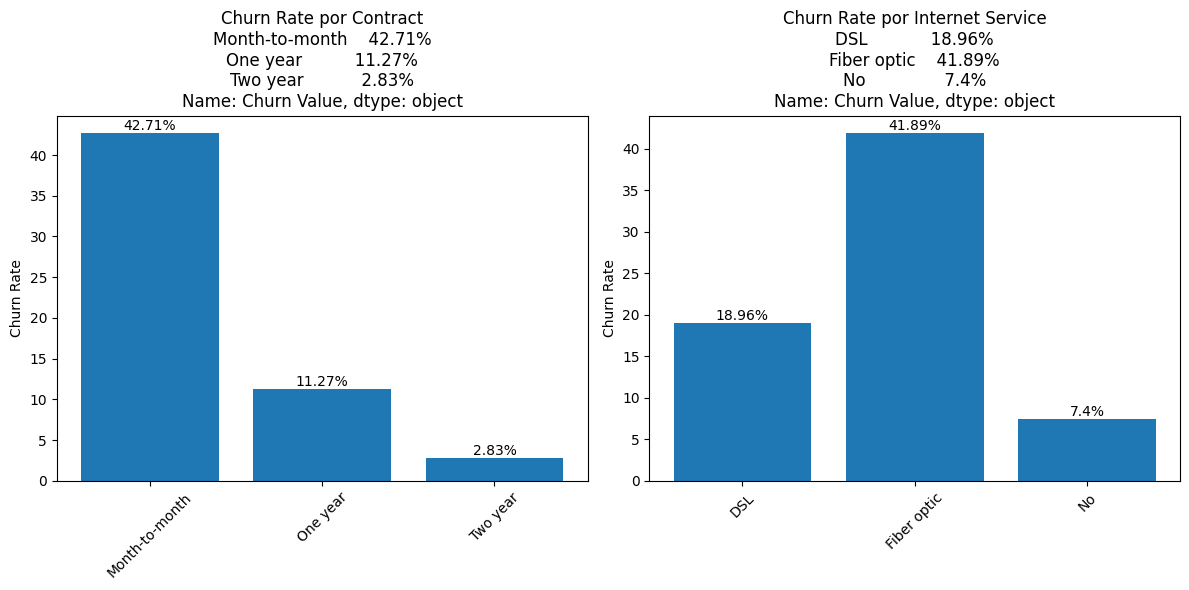

In [ ]:
x = 'Contract'
result = pd.DataFrame((churn_rate(x)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots

# Plot the first graph
ax1.bar(result.index, result['Churn Value'])
ax1.set_title('Churn Rate por {}'.format(result['Churn Value'].round(2).astype(str) + '%'))
ax1.set_ylabel('Churn Rate')
ax1.set_xticklabels(result.index, rotation=45)

# Add data labels to the bars in the first graph
for i, v in enumerate(result['Churn Value']):
    ax1.text(i, v, str(round(v, 2)) + '%', ha='center', va='bottom')

x_2 = 'Internet Service'
result_2 = pd.DataFrame((churn_rate(x_2)))

# Plot the second graph
ax2.bar(result_2.index, result_2['Churn Value'])
ax2.set_title('Churn Rate por {}'.format(result_2['Churn Value'].round(2).astype(str) + '%'))
ax2.set_ylabel('Churn Rate')
ax2.set_xticklabels(result_2.index, rotation=45)

for i, v in enumerate(result_2['Churn Value']):
    ax2.text(i, v, str(round(v, 2)) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Análisis Bivariado

↓ Se puede ver que los clientes que tienen contrato por mes duran menos con la compañía, pero curiosamente hay muchos usuarios que tienen precios superiores de 60-80USD. Definitivamente los clientes que más duran son los que poseen contratos de 1-2 años.

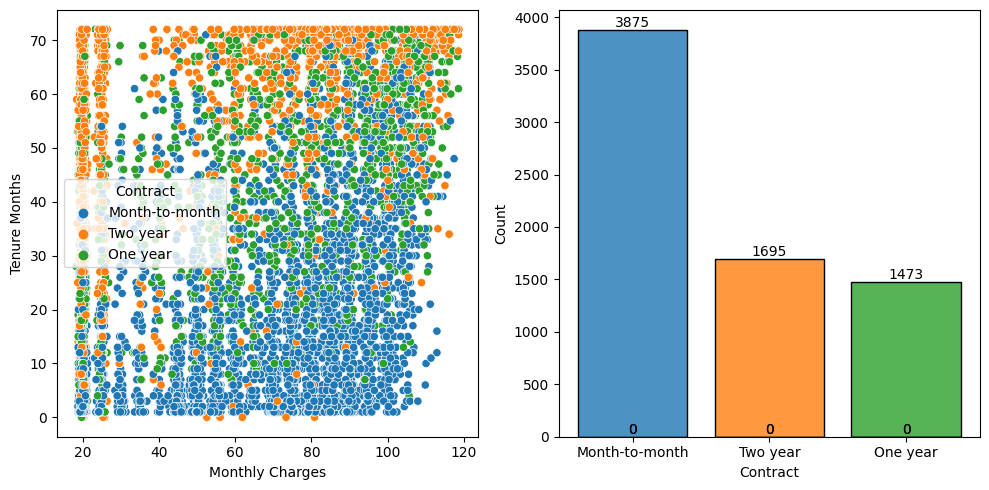

In [ ]:
dato = df['Contract']


f, axs = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=dict(width_ratios=[2, 2]))
sns.scatterplot(data=df, x=MonthlyCharges, y=TenureMonths, hue=dato, ax=axs[0])

ax = sns.histplot(data=df, x=dato, hue=dato, shrink=0.8, alpha=.8, legend=False, ax=axs[1])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


f.tight_layout()

↓ En el caso de hombres y mujeres, ambos tienen comportamientos similares con su tipo de contrato, la permanencia en el servicio, y los precios que pagan.

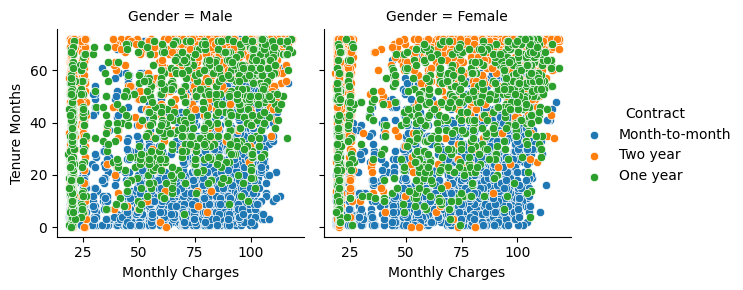

In [ ]:
g = sns.FacetGrid(df, col='Gender', hue='Contract')
g.map_dataframe(sns.scatterplot, x='Monthly Charges', y='Tenure Months')
g.add_legend()

↓ El género no genera ningún impacto en relación con la cantidad de meses que un usuario mantiene el servicio de internet. La gráfica siguiente demuestra que la distribución porcentual de los meses que un usuario puede tener el servicio de internet es similar tanto en hombres como en mujeres.

<Axes: xlabel='Tenure Months', ylabel='Count'>

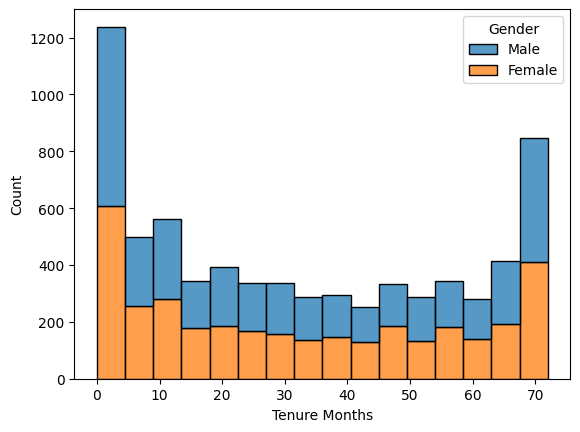

In [ ]:
sns.histplot(data=df, x=TenureMonths, hue='Gender', multiple="stack")

In [ ]:
avg_tenure_months = df[['Gender', 'Tenure Months']].mean()
avg_tenure_months = df.groupby('Gender')['Tenure Months'].mean()
avg_tenure_months = pd.DataFrame({'Gender': avg_tenure_months.index, 'Duración promedio': avg_tenure_months.values})
avg_tenure_months

Gender  Duración promedio
0  Female          32.244553
1    Male          32.495359

↓ Los resultados de significancia estadística negativa y pvalue de 0.66 indican que no hay evidencia suficiente para rechazar la hipótesis nula de no existencia de correlación entre la variable dicotómica (género) y la variable continua (el tiempo de duración con el servicio).

Un resultado de significancia estadística de -0.05 puede ser incorrecto o no paropiado en este contexto de análisis.

In [ ]:
avg_tenure_months = df[['Gender', 'Tenure Months']]
avg_tenure_months['Gender'] = avg_tenure_months.Gender.map({'Male':0, 'Female':1})
a = avg_tenure_months['Gender']
b = avg_tenure_months['Tenure Months']
stats.pointbiserialr(a, b)

SignificanceResult(statistic=-0.005106222619949799, pvalue=0.6683205263409168)

Con el objetivo de comenzar el análisis de la información, es necesario primero entender cómo está construido el DataSet, y si este requiere algún tipo de normalización para el ejercicio que se requiere hacer.

Las funciones .info() y .shape permiten ver la estructura del dataset y si algún atributo tiene datos en blanco que requiera normalización, y .drop_duplicates() permite ver si hay filas duplicadas dentro del todo DataSet.

<Axes: xlabel='Churn Value', ylabel='count'>

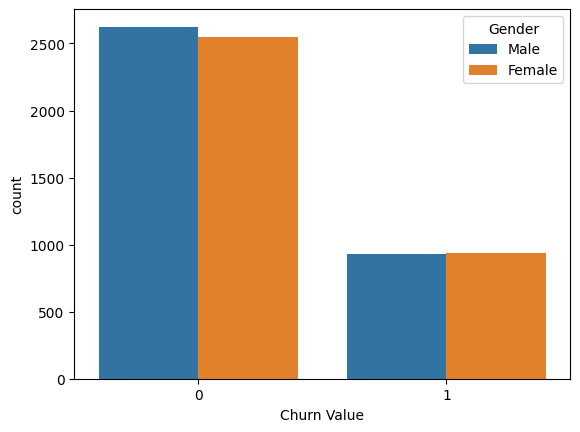

In [ ]:
sns.countplot(x='Churn Value', data = df, hue = 'Gender')

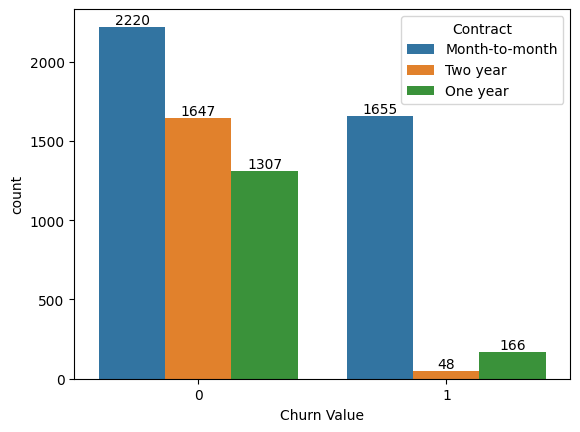

In [ ]:
ax = sns.countplot(x='Churn Value', data = df, hue = 'Contract')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


## Análisis Espacial

In [ ]:
pip install folium

In [ ]:
#Geolocalización
from geopy.geocoders import Nominatim #api que me ofrece las geolocaliciones de diferentes ciudades
import time
import math

In [ ]:
geo = Nominatim(user_agent="AppMap")

In [ ]:
#loc = geo.geocode("San Francisco")
#print((loc.latitude, loc.longitude))

In [ ]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

In [ ]:
informacion = ['Tenure Months', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV']

for col in informacion:
    print(col, d_desc[col])

#Se escogen las variables: Churn Score y CLTV para ver en el mapa las zonas con mayor churn y donde hay más clientes valiosos

Tenure Months Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
Churn Label Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
Churn Value the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
Churn Score  A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
CLTV Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.


In [ ]:
col = 'Churn Score'
print(col, d_desc[col])

Churn Score  A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.


In [ ]:
max_amount = float(df['Churn Score'].max())

folium_hmap = folium.Map(location=[37.7790262, -122.419906], #Ubicación de San Francisco
                        zoom_start=6,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['Latitude'], df['Longitude'], df['Churn Score'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6,
                   max_zoom=15,
                 )

folium_hmap.add_child(hm_wide)

In [ ]:
col = 'CLTV'
print(col, d_desc[col])

CLTV Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.


In [ ]:
max_amount = float(df['Churn Score'].max())

folium_hmap = folium.Map(location=[37.7790262, -122.419906], #Ubicación de San Francisco
                        zoom_start=6,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['Latitude'], df['Longitude'], df['CLTV'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6,
                   max_zoom=15,
                 )

folium_hmap.add_child(hm_wide)

In [ ]:
# df_ajustado = pd.DataFrame(df[df['Churn Reason'] == 'Activo'])
df_ajustado = df
# df_ajustado = df_ajustado['City'].count()
df_ajustado = df_ajustado.groupby('City')['Count'].count().sort_values(ascending=False).nlargest(10)
df_ajustado

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
Fresno            64
Long Beach        60
Oakland           52
Stockton          44
Bakersfield       40
Name: Count, dtype: int64

In [ ]:
df_ajustado = pd.DataFrame(df[df['Churn Reason'] == 'Activo'])

max_amount = float(df_ajustado['Churn Score'].max())

folium_hmap = folium.Map(location=[37.7790262, -122.419906], #Ubicación de San Francisco
                        zoom_start=6,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df_ajustado['Latitude'], df_ajustado['Longitude'], df_ajustado['CLTV'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6,
                   max_zoom=15,
                 )

folium_hmap.add_child(hm_wide)

In [ ]:
df_ajustado = pd.DataFrame(df[df['Churn Reason'] != 'Activo'])

max_amount = float(df_ajustado['Churn Score'].max())

folium_hmap = folium.Map(location=[37.7790262, -122.419906], #Ubicación de San Francisco
                        zoom_start=6,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df_ajustado['Latitude'], df_ajustado['Longitude'], df_ajustado['CLTV'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6,
                   max_zoom=15,
                 )

folium_hmap.add_child(hm_wide)

In [ ]:
informacion = ['Tenure Months', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV']

for col in informacion:
    print(col, d_desc[col])
    # fig, ax = plt.subplots(1,2, figsize=(15, 4))
    # ax[0] = sns.histplot(df_num[col], kde=True, ax=ax[0])
    # ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    # plt.show()

Tenure Months Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
Churn Label Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
Churn Value the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
Churn Score  A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
CLTV Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.


# Interpretación de resultados y conclusiones del EDA

*  La mayor parte de usuarios que decidieron cancelar el servicio de internet no lo hicieron por razones relativas al precio, sino por otras razones más relacionadas con las características del servicio y la atención al cliente prestada por la compañía. Esto demuestra que es necesario tomar medidas en tres aspectos principales:

    -  Cómo se entrena a las personas que hacen parte del equipo de atención al cliente.
    -  Qué tipo de ofertas en cuanto a velocidad del servicio se pueden ofrecer a los clientes para mejorar la tasa de retención.
    - Llama la atención que en el top 5 de razones de cancelación haya una participación importante de la categoría "No se". Esto debería ser un punto de revisión para la dirección de la compañía.

*  Los usuarios que tienen mayor tendencia a cancelar el servicio son aquellos que tienen un tipo de contrato Mes a Mes. Mientras que aquellos que deciden contratos por un año o más tienden a ser más fieles a la hora de permanecer con el servicio.

*  El género es indiferente en relación con la duración promedio de un usuario con el servicio de internet. Tanto hombres como mujeres tienen una duración similar.

*  La mayor cantidad de usuarios paga un precio entre 20 y 30 dólares por el servicio de internet, lo que indica que es importante continuar ofreciendo servicios con este rango de precios para mantener a la mayor cantidad de usuarios posible.

*  La mitad del CLTV de la muestra proviene de los clientes con contratos Month-to-Month, lo cual significa que es un cliente muy importante y la empresa debe ofrecerle ofertas de fidelización.

# Recomendaciones
Se recomienda tomar medidas de acción en tres enfoques:

*   Cómo se entrena a las personas que hacen parte del equipo de atención al cliente.
*   Qué tipo de ofertas en cuanto a velocidad del servicio se pueden ofrecer a los clientes para mejorar la tasa de retención.
*   Llama la atención que en el top 5 de razones de cancelación haya una participación importante de la categoría "No se". Esto debería ser un punto de revisión para la dirección de la compañía.

Adicionalmente, se recomienda analizar qué otro tipo de contrato se puede ofrecer a los usuarios para mejorar la tasa de retención de aquellos que tienen mayor tendencia a cancelar el servicio rápidamente.


# Data Preprocessing

##Data Cleaning

In [ ]:
prueba = pd.DataFrame(df)

Después de revisar el DataSet, se encuentra que se puede eliminar las columnas Count y "Lat Long" ya que no le agregan valor al ejercicio. Además, se cambia el tipo de dato de Total Cahrger a float porque posee decimales.

In [ ]:
columns_to_drop = ['Count', 'Lat Long']

if all(col in prueba.columns for col in columns_to_drop):
    prueba.drop(columns=columns_to_drop, inplace=True)
else:
    print("One or more columns to drop were not found in the DataFrame.")

In [ ]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            7043 non-null   object 
 1   State              7043 non-null   object 
 2   City               7043 non-null   object 
 3   Zip Code           7043 non-null   int64  
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   object 
 12  Multiple Lines     7043 non-null   object 
 13  Internet Service   7043 non-null   object 
 14  Online Security    7043 non-null   object 
 15  Online Backup      7043 non-null   object 
 16  Device Protect

In [ ]:
# Se muestra que el dataset no tiene duplicados
prueba = prueba.reset_index()
print(prueba.shape)
prueba= prueba.drop_duplicates()
print(prueba.shape)

(7043, 31)
(7043, 31)


In [ ]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Latitude           7043 non-null   float64
 6   Longitude          7043 non-null   float64
 7   Gender             7043 non-null   object 
 8   Senior Citizen     7043 non-null   object 
 9   Partner            7043 non-null   object 
 10  Dependents         7043 non-null   object 
 11  Tenure Months      7043 non-null   int64  
 12  Phone Service      7043 non-null   object 
 13  Multiple Lines     7043 non-null   object 
 14  Internet Service   7043 non-null   object 
 15  Online Security    7043 non-null   object 
 16  Online Backup      7043 

In [ ]:
# Columnas con porcentaje de nulos
# Los valores en nulo son porque los clientes siguen activos
# Los valores nulos se podrían reemplazar por un valor
pd.set_option('display.max_rows', None)  # or 1000
serie=(prueba.isnull().sum()/prueba.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Churn Reason     73.463013
Total Charges     0.156183
dtype: float64

<Axes: >

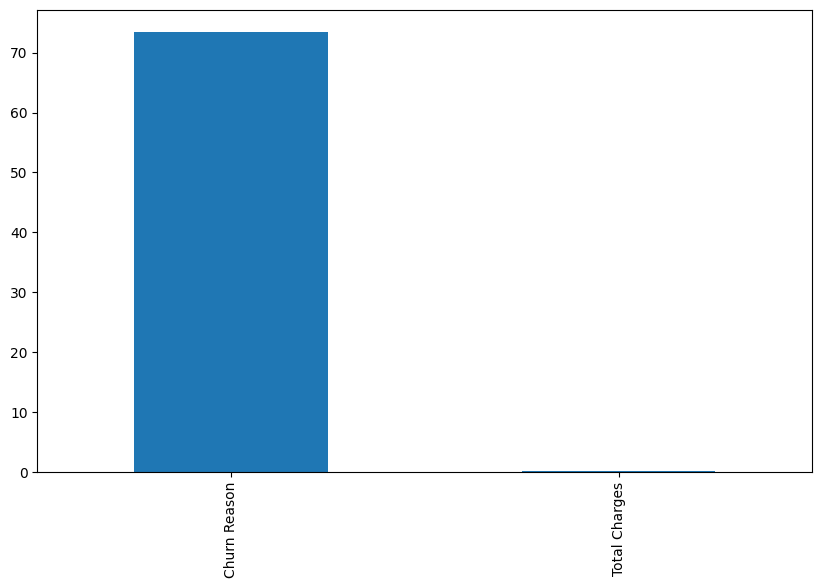

In [ ]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [ ]:
pip install missingno

<Axes: >

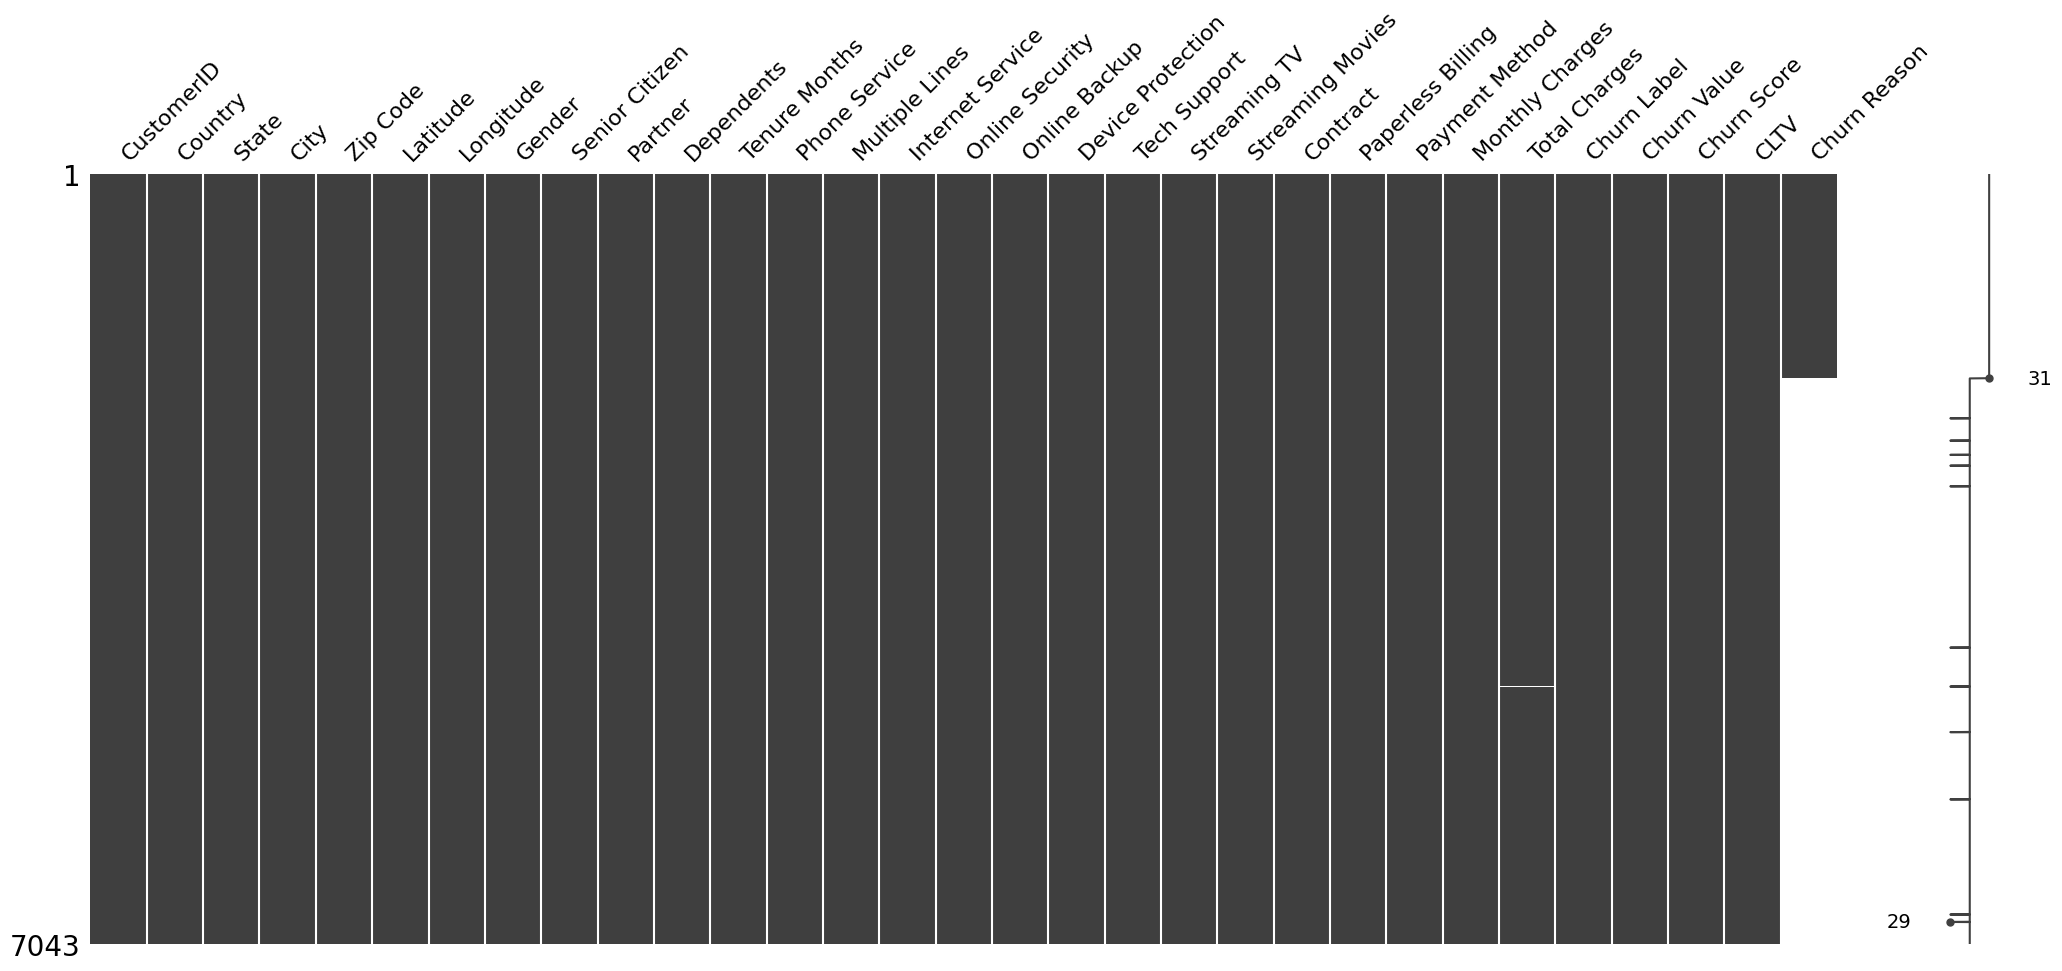

In [ ]:
import missingno as msno
msno.matrix(prueba)

Como resultado de esta primera revisión encontramos que sólo hay 1 atributo con datos en blanco: Churn Reason. Dentro del análisis, este es unos de los atributos más importantes por lo que se define que los datos en blanco deben tener una normalización: se rellena los espacios en blanco con “Activo”.


In [ ]:
col_cat= ['Churn Reason'] # Columnas categoricas

In [ ]:
for i in col_cat: # Reemplazar los vacios por Activo
  prueba[i] = prueba[i].fillna('Activo')

In [ ]:
prueba['Churn Reason'].isnull().sum() # Verificando que funciona

0

In [ ]:
# Calculate the average of the 'Total Charges' column excluding NaN values
average_total_charges = prueba['Total Charges'].mean()

# Replace NaN values with the average
prueba['Total Charges'].fillna(average_total_charges, inplace=True)

In [ ]:
# Ya no se tienen nulos
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Latitude           7043 non-null   float64
 6   Longitude          7043 non-null   float64
 7   Gender             7043 non-null   object 
 8   Senior Citizen     7043 non-null   object 
 9   Partner            7043 non-null   object 
 10  Dependents         7043 non-null   object 
 11  Tenure Months      7043 non-null   int64  
 12  Phone Service      7043 non-null   object 
 13  Multiple Lines     7043 non-null   object 
 14  Internet Service   7043 non-null   object 
 15  Online Security    7043 non-null   object 
 16  Online Backup      7043 

<Axes: >

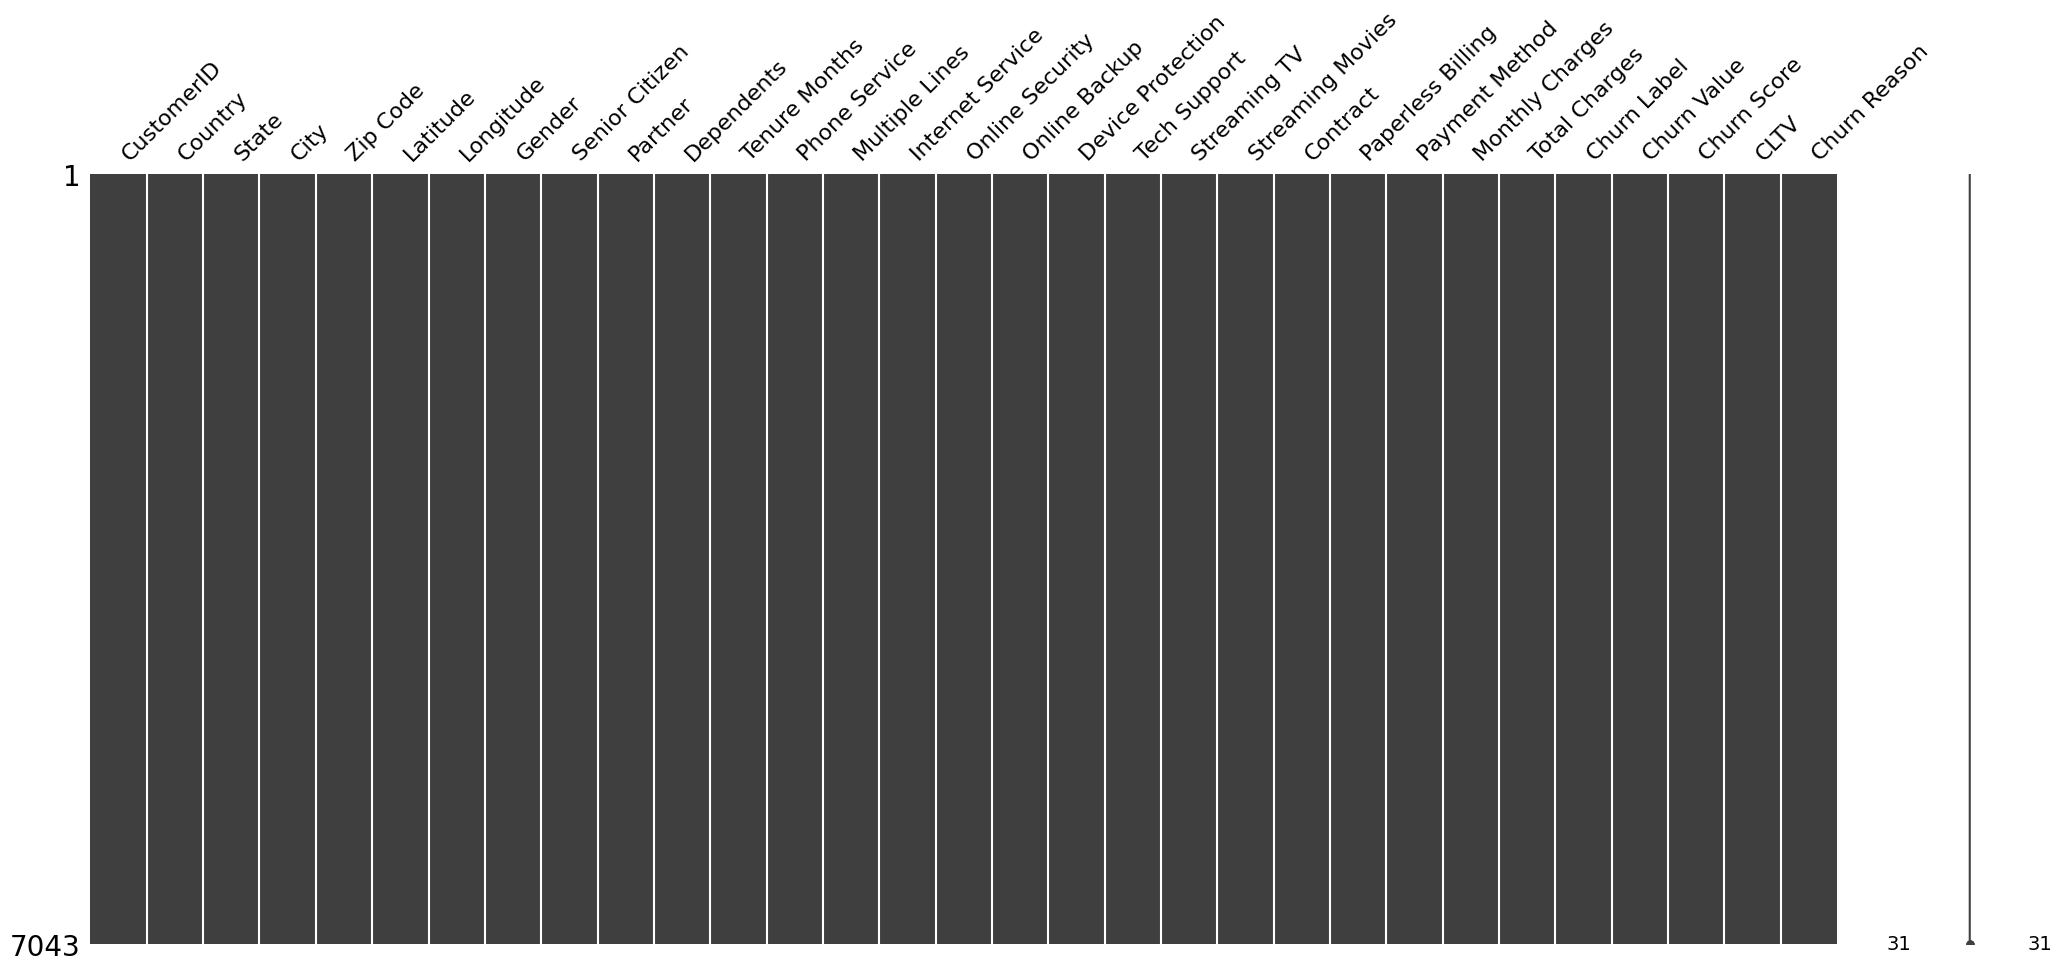

In [ ]:
msno.matrix(prueba)

In [ ]:
#Despues de pruebas con resultado positiva se integra en el modelo
df = prueba

##Creation of Synthetic Variables

In [ ]:
##   df['Ratio_Var'] = df['Monthly Charges'] / df['Total Charges']

In [ ]:
#bins = [0, 50, 100, float('inf')]
#labels = ['Low', 'Medium', 'High']
#df['Monthly_Charge_Category'] = pd.cut(df['Monthly Charges'], bins=bins, labels=labels)

In [ ]:
df.head(100).T

0                 1   \
CustomerID                           3668-QPYBK        9237-HQITU   
Country                           United States     United States   
State                                California        California   
City                                Los Angeles       Los Angeles   
Zip Code                                  90003             90005   
Latitude                              33.964131         34.059281   
Longitude                           -118.272783        -118.30742   
Gender                                     Male            Female   
Senior Citizen                               No                No   
Partner                                      No                No   
Dependents                                   No               Yes   
Tenure Months                                 2                 2   
Phone Service                               Yes               Yes   
Multiple Lines                               No                No   
Internet Service                            DSL       Fiber optic   
Online Security                             Yes                No   
Online Backup                               Yes                No   
Device Protection                            No                No   
Tech Support                                 No                No   
Streaming TV                                 No                No   
Streaming Movies                             No                No   
Contract                         Month-to-month    Month-to-month   
Paperless Billing                           Yes               Yes   
Payment Method                     Mailed check  Electronic check   
Monthly Charges                           53.85              70.7   
Total Charges                            108.15            151.65   
Churn Label                                 Yes               Yes   
Churn Value                                   1                 1   
Churn Score                                  86                67   
CLTV                                       3239              2701   
Churn Reason       Competitor made better offer             Moved   

                                 2                 3   \
CustomerID               9305-CDSKC        7892-POOKP   
Country               United States     United States   
State                    California        California   
City                    Los Angeles       Los Angeles   
Zip Code                      90006             90010   
Latitude                  34.048013         34.062125   
Longitude               -118.293953       -118.315709   
Gender                       Female            Female   
Senior Citizen                   No                No   
Partner                          No               Yes   
Dependents                      Yes               Yes   
Tenure Months                     8                28   
Phone Service                   Yes               Yes   
Multiple Lines                  Yes               Yes   
Internet Service        Fiber optic       Fiber optic   
Online Security                  No                No   
Online Backup                    No                No   
Device Protection               Yes               Yes   
Tech Support                     No               Yes   
Streaming TV                    Yes               Yes   
Streaming Movies                Yes               Yes   
Contract             Month-to-month    Month-to-month   
Paperless Billing               Yes               Yes   
Payment Method     Electronic check  Electronic check   
Monthly Charges               99.65             104.8   
Total Charges                 820.5           3046.05   
Churn Label                     Yes               Yes   
Churn Value                       1                 1   
Churn Score                      86                84   
CLTV                           5372              5003   
Churn Reason                  Moved             Moved   

           

## Distribución de variables numéricas

When working with non-normal data, there are several techniques you can consider. The choice of technique depends on the specific characteristics of your data, the nature of your problem, and the requirements of your analysis. Here are some common techniques for handling non-normal data:

1. Transformations:
   - Logarithmic transformation: Applying the logarithm to the data can help stabilize variance and reduce skewness.
   - Square root or cube root transformation: These transformations can also help reduce skewness and make the data more symmetrical.
   - Box-Cox transformation: This transformation allows you to find the optimal power transformation that maximizes normality.

2. Non-parametric methods:
   - Non-parametric tests: Instead of relying on assumptions of normality, non-parametric tests such as the Mann-Whitney U test or Kruskal-Wallis test can be used.
   - Resampling methods: Techniques like bootstrapping or permutation tests can provide robust statistical inference without assuming normality.

3. Robust statistical methods:
   - Robust regression: Techniques like robust linear regression (e.g., RANSAC, Theil-Sen) or robust generalized linear models can handle outliers and non-normality more effectively.
   - Robust estimators: Instead of relying on mean and standard deviation, robust estimators like median and MAD (median absolute deviation) can provide robust measures of central tendency and spread.

4. Distribution-free models:
   - Tree-based models: Decision trees, random forests, or gradient boosting models are often robust to non-normality and can handle a variety of data distributions.
   - Support Vector Machines (SVM): SVMs can handle non-linear relationships and non-normal data by using non-linear kernels.

5. Data discretization:
   - Converting continuous variables into categorical or ordinal variables can help mitigate the impact of non-normality.

6. Ensemble methods:
   - Combining predictions from multiple models, such as using an ensemble of multiple machine learning models, can help mitigate the impact of non-normality and improve overall performance.

It's important to assess the specific characteristics of your data and the requirements of your analysis before choosing the appropriate technique. It's also recommended to perform thorough validation and evaluate the performance of different techniques to determine the most suitable approach for your specific problem.

Tenure Months


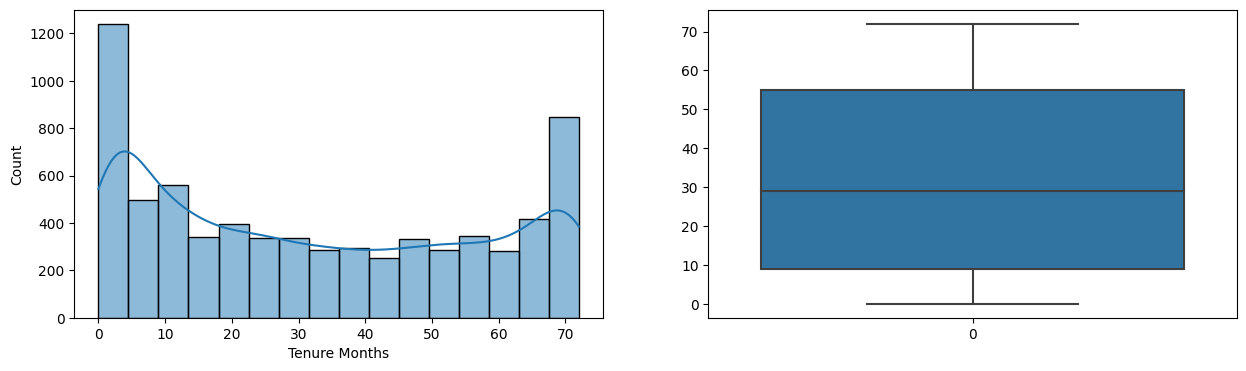

Monthly Charges


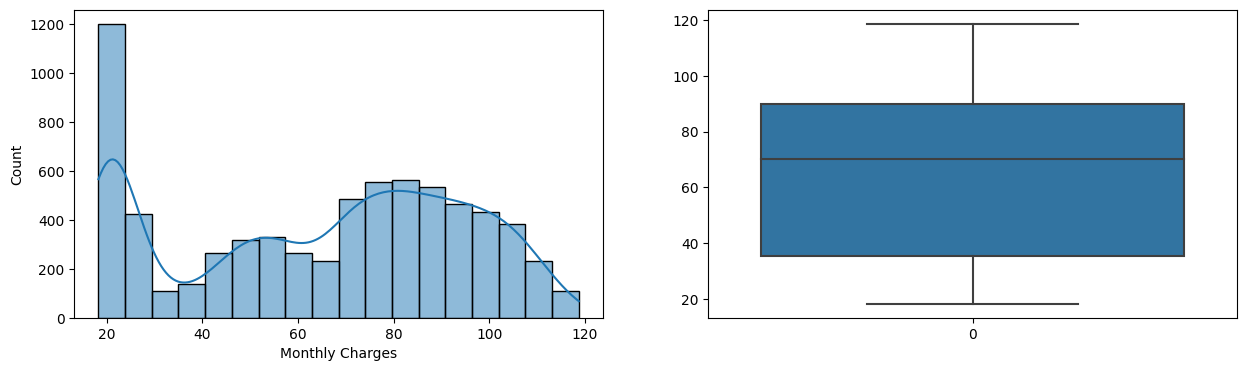

CLTV


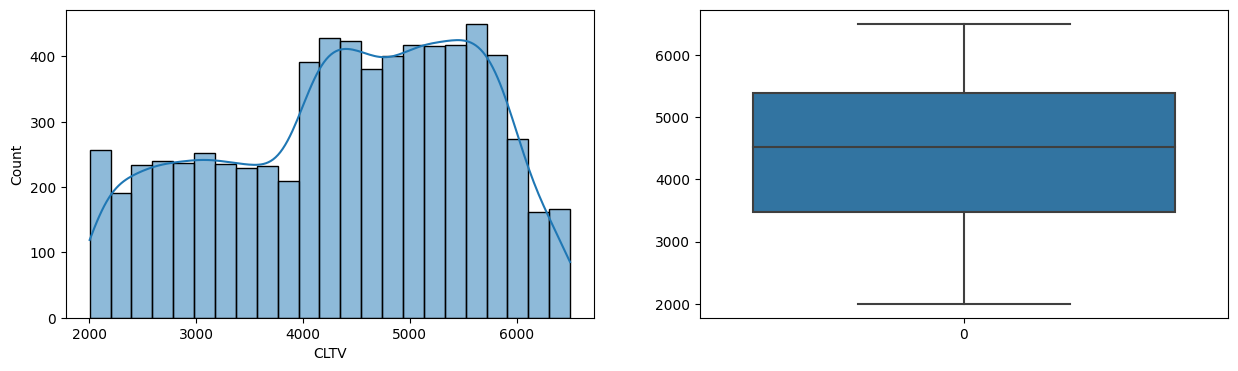

Churn Score


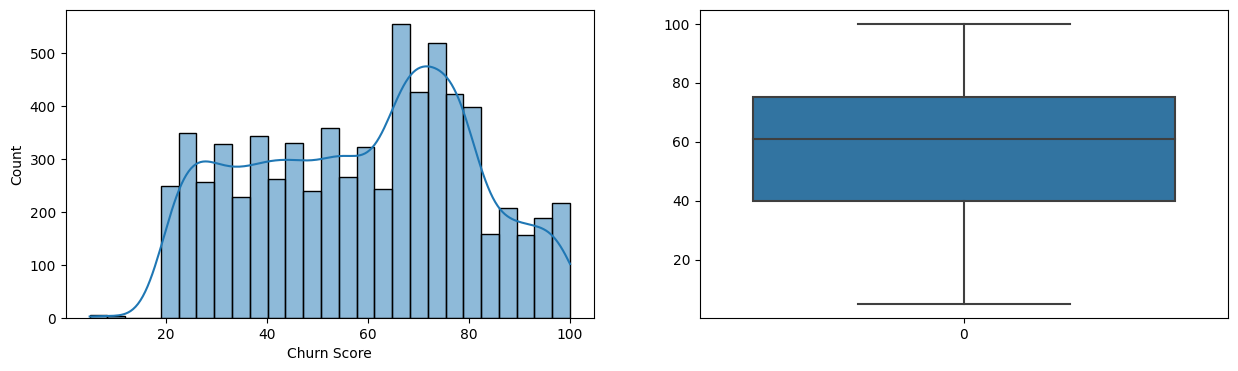

In [ ]:
for col in ['Tenure Months', 'Monthly Charges', 'CLTV', 'Churn Score']:
    #print(col, d_desc[col])
    print(col)
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.histplot(df[col], kde=True, ax=ax[0])
    ax[1] = sns.boxplot(df[col], ax=ax[1])
    plt.show()

###Churn Score

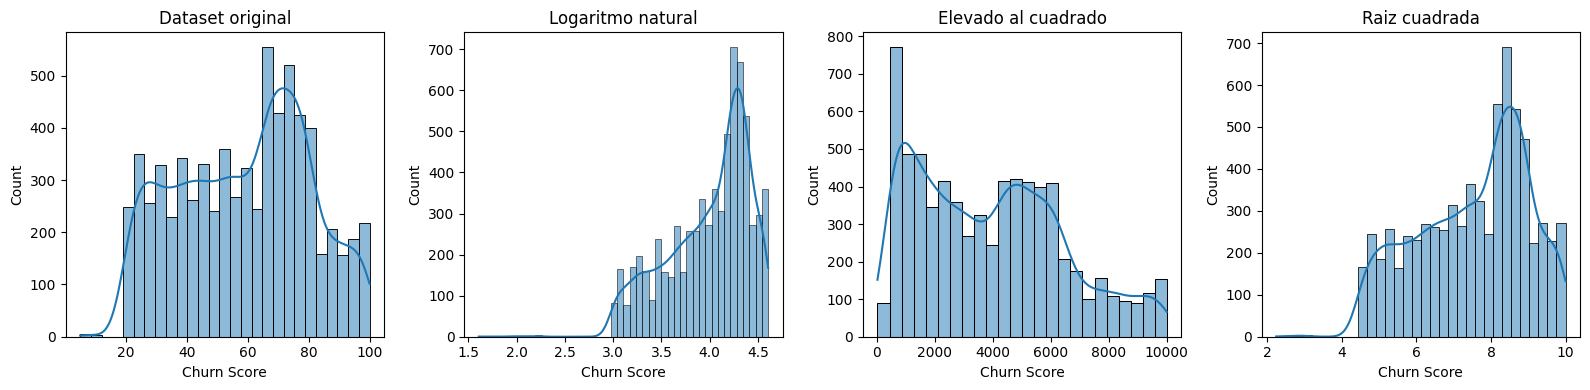

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Churn Score'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df, x=df[selected_x], kde=True, ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df, x=np.log(df[selected_x]), kde=True, ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df, x=df[selected_x]**2, kde=True, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df, x=df[selected_x]**0.5, kde=True, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Churn Score'

# Define the transformations
transformations = [
    lambda x: x,                             # Original data
    np.log,                                  # Natural logarithm
    lambda x: x ** 2,                        # Squared
    lambda x: np.sqrt(x)                     # Square root
]

# Perform evaluation for each transformation
for i, transformation in enumerate(transformations):
    transformed_data = transformation(df[selected_x])

    print(f"Scenario {i+1}: {transformation.__name__}")
    print("Summary Statistics:")
    print(f"Mean: {np.mean(transformed_data)}")
    print(f"Median: {np.median(transformed_data)}")
    print(f"Standard Deviation: {np.std(transformed_data)}")

    # Shapiro-Wilk test
    _, shapiro_pvalue = stats.shapiro(transformed_data)
    print("Shapiro-Wilk Test:")
    print(f"Test Statistic: {shapiro_pvalue}")
    print(f"p-value: {shapiro_pvalue}\n")

    # Anderson-Darling test
    anderson_result = stats.anderson(transformed_data)
    print("Anderson-Darling Test:")
    print(f"Test Statistic: {anderson_result.statistic}")
    print(f"Critical Values: {anderson_result.critical_values}")
    print(f"Significance Levels: {anderson_result.significance_level}\n")

    print("-------------------------------\n")

Scenario 1: <lambda>
Summary Statistics:
Mean: 58.69941786170666
Median: 61.0
Standard Deviation: 21.523602501947135
Shapiro-Wilk Test:
Test Statistic: 1.0318140400759399e-36
p-value: 1.0318140400759399e-36

Anderson-Darling Test:
Test Statistic: 61.04098840639199
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 2: log
Summary Statistics:
Mean: 3.9913978134715786
Median: 4.110873864173311
Standard Deviation: 0.425877365988459
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 160.79063105530622
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 3: <lambda>
Summary Statistics:
Mean: 3908.887121965072
Median: 3721.0
Standard Deviation: 2527.4548198029943
Shapiro-Wilk Test:
Test Statistic: 5.044674471569341e-44
p-value: 5.044674471569341e-44

Anderson-Darling Test:
Test S

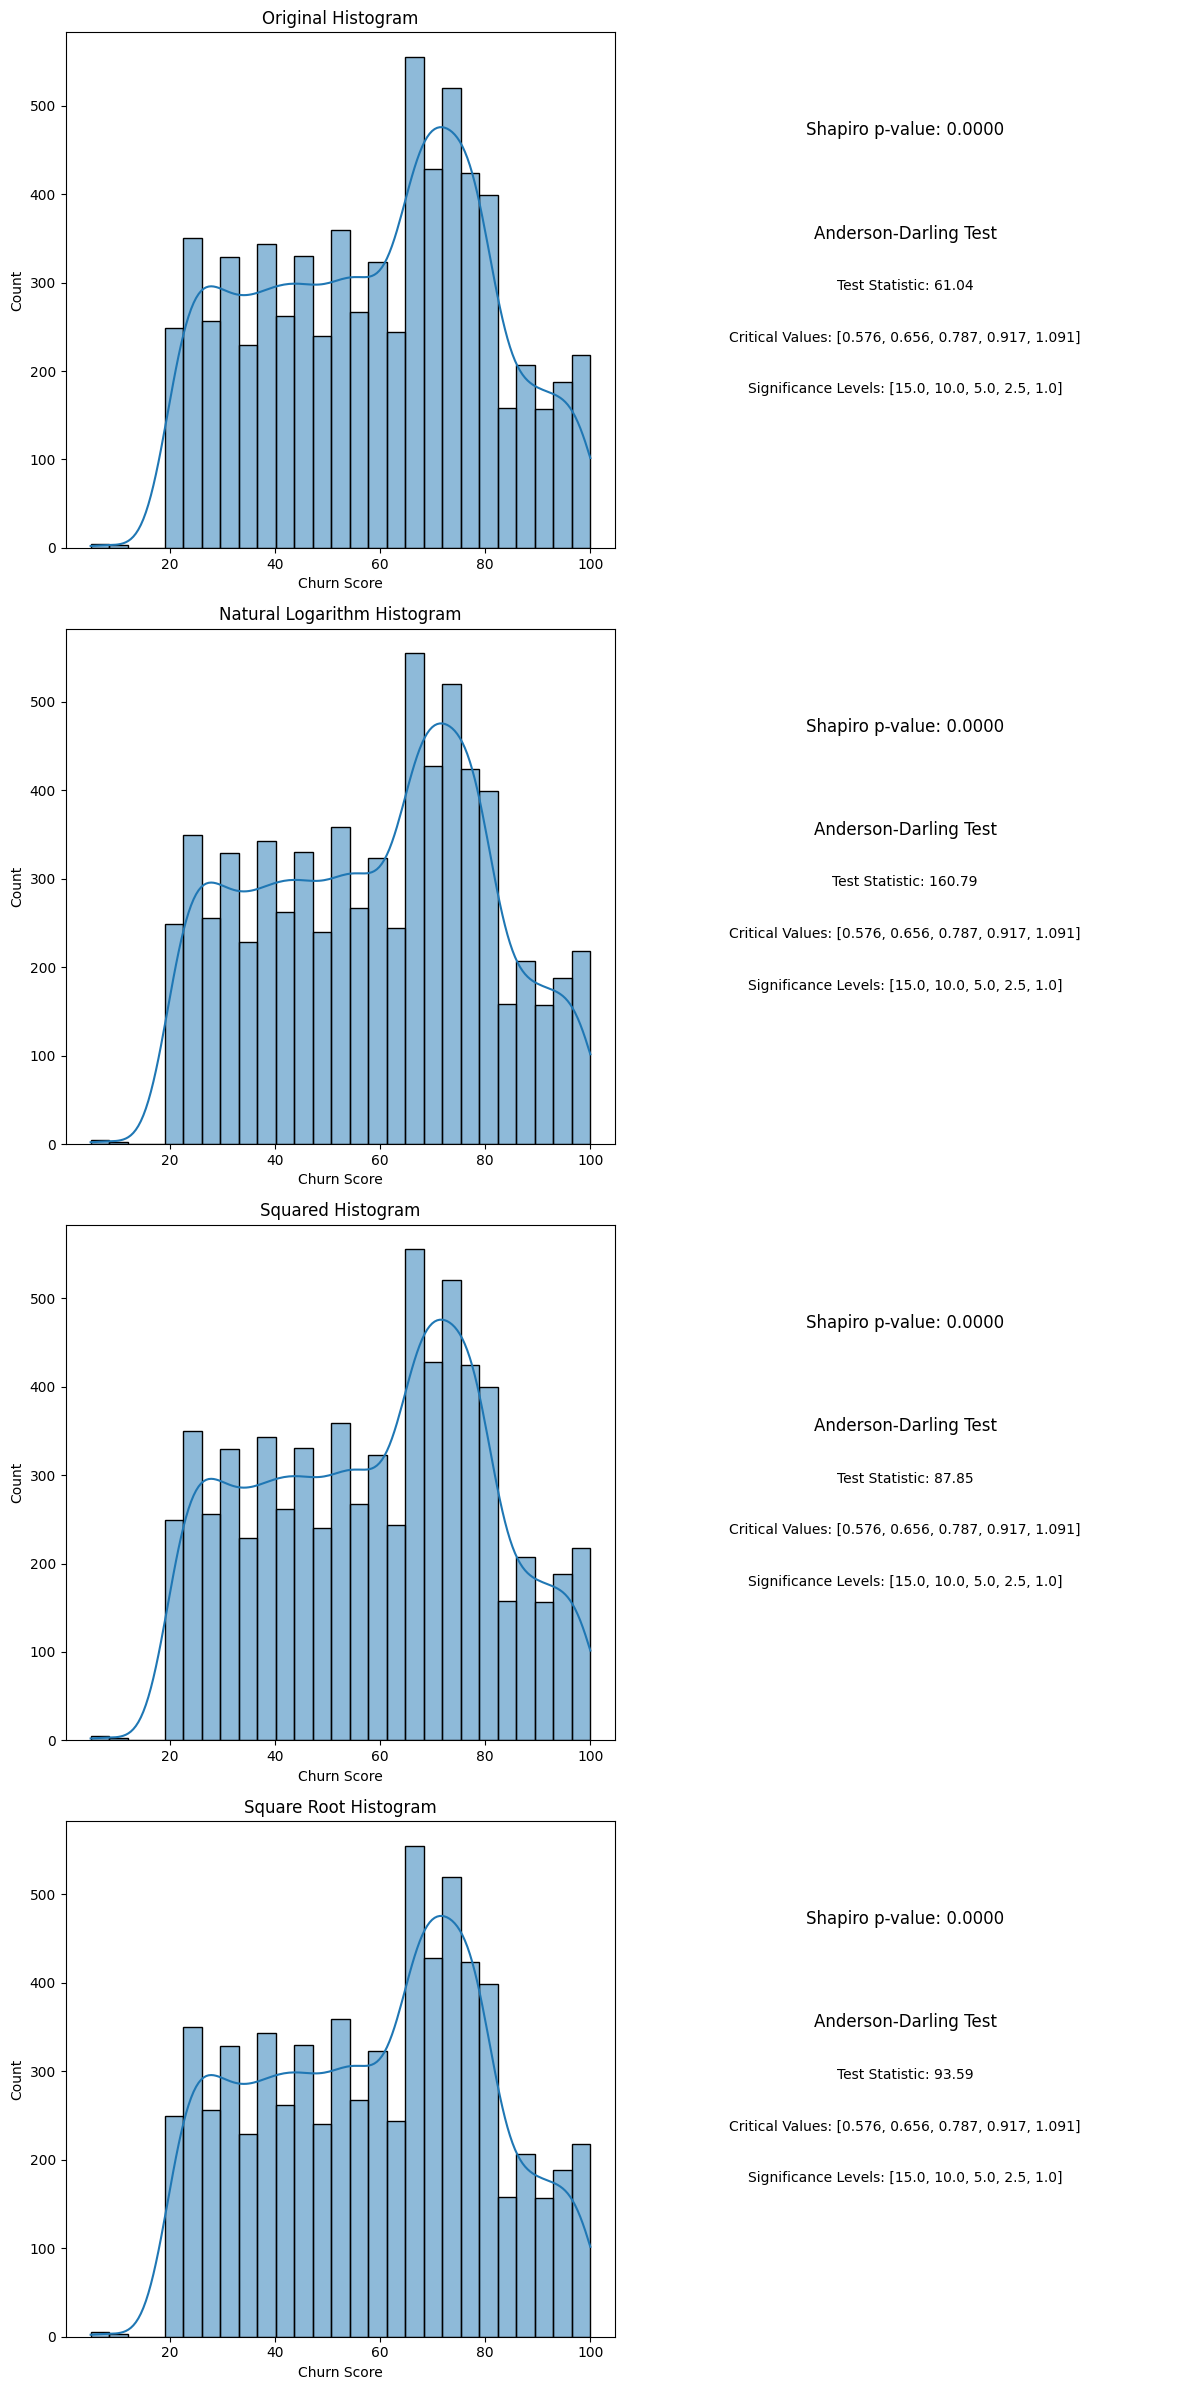

In [ ]:
import scipy.stats as stats

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Churn Score'

# Define the transformations
transformations = [
    (lambda x: x, 'Original'),
    (np.log, 'Natural Logarithm'),
    (lambda x: x ** 2, 'Squared'),
    (lambda x: np.sqrt(x), 'Square Root')
]

fig, axs = plt.subplots(len(transformations), 2, figsize=(12, 6*len(transformations)))

# Perform evaluation for each transformation
for i, (transformation, title) in enumerate(transformations):
    transformed_data = transformation(df[selected_x])

    # Plot histogram
    sns.histplot(data=df, x=df[selected_x], kde=True, ax=axs[i][0])
    axs[i][0].set_title(f'{title} Histogram')

    # Shapiro-Wilk test
    _, shapiro_pvalue = stats.shapiro(transformed_data)
    axs[i][1].text(0.5, 0.8, f"Shapiro p-value: {shapiro_pvalue:.4f}", fontsize=12, ha='center')
    axs[i][1].axis('off')

    # Anderson-Darling test
    anderson_result = stats.anderson(transformed_data)
    anderson_critical_values = list(anderson_result.critical_values)
    anderson_significance_levels = list(anderson_result.significance_level)
    axs[i][1].text(0.5, 0.6, "Anderson-Darling Test", fontsize=12, ha='center')
    axs[i][1].text(0.5, 0.5, f"Test Statistic: {anderson_result.statistic:.2f}", fontsize=10, ha='center')
    axs[i][1].text(0.5, 0.4, f"Critical Values: {anderson_critical_values}", fontsize=10, ha='center')
    axs[i][1].text(0.5, 0.3, f"Significance Levels: {anderson_significance_levels}", fontsize=10, ha='center')
    axs[i][1].axis('off')

plt.tight_layout()
plt.show()


Box-Cox Transformation Results:
Best Lambda: 0.9116985275126344
Summary Statistics:
Mean: 43.579650338934485
Median: 45.44367658417987
Standard Deviation: 15.121450717315653
Shapiro-Wilk Test:
Test Statistic: 4.823837008239888e-37
p-value: 4.823837008239888e-37

Anderson-Darling Test:
Test Statistic: 64.34280987923012
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



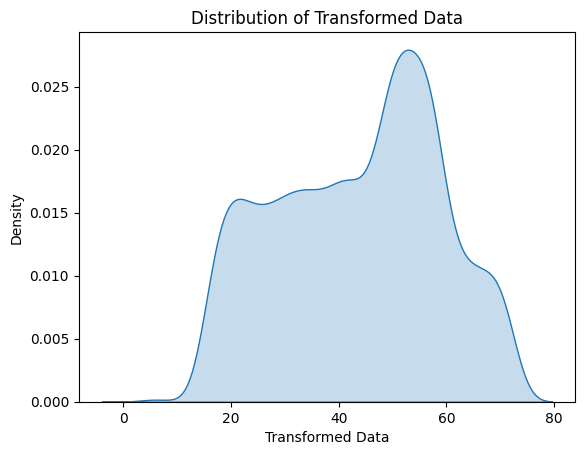

In [ ]:
import scipy.stats as stats

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Churn Score'

transformed_data, best_lambda = stats.boxcox(df[selected_x])

print("Box-Cox Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Yeo-Johnson Transformation Results:
Best Lambda: 0.9149718192982041
Summary Statistics:
Mean: 44.74213622059139
Median: 46.61385700448505
Standard Deviation: 15.295083725219214
Shapiro-Wilk Test:
Test Statistic: 5.047622355122772e-37
p-value: 5.047622355122772e-37

Anderson-Darling Test:
Test Statistic: 64.16501223236446
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



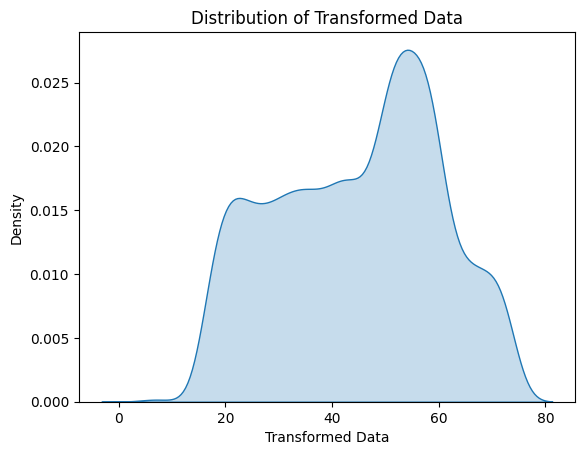

In [ ]:
import scipy.stats as stats

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Churn Score'

transformed_data, best_lambda = stats.yeojohnson(df[selected_x])

print("Yeo-Johnson Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Quantile Transformation Results:
Summary Statistics:
Mean: 0.01764656805010334
Median: -0.0037637150038949798
Standard Deviation: 1.064829481406297
Shapiro-Wilk Test:
Test Statistic: 1.0089037854879603e-38
p-value: 1.0089037854879603e-38

Anderson-Darling Test:
Test Statistic: 11.859353064688548
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



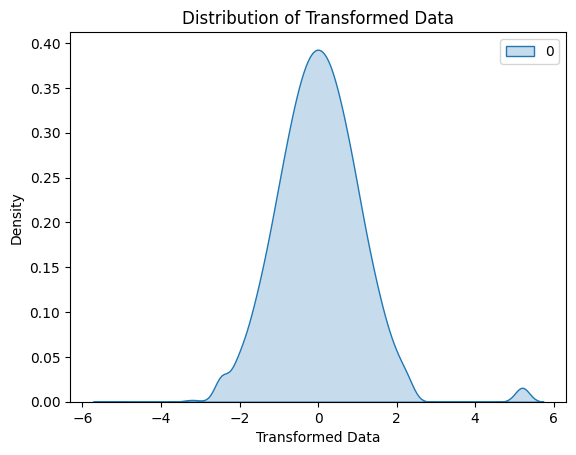

In [ ]:
from sklearn.preprocessing import QuantileTransformer

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Churn Score'

transformer = QuantileTransformer(output_distribution='normal')
transformed_data = transformer.fit_transform(df[[selected_x]])

print("Quantile Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data.flatten())
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data.flatten())
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

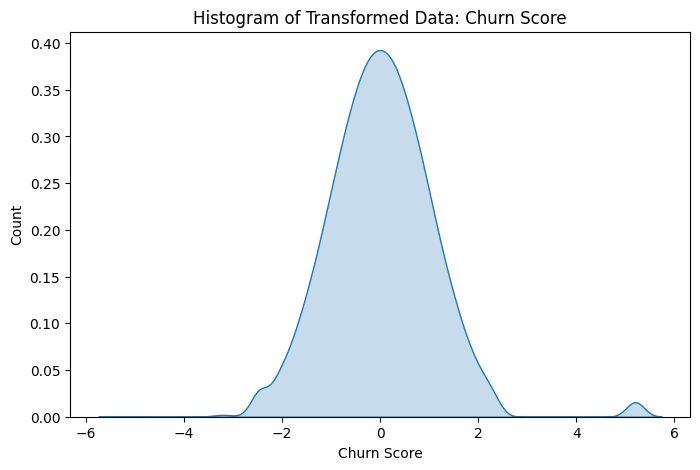

In [ ]:
df[selected_x] = transformed_data.flatten()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=df[selected_x], shade=True)
plt.title('Histogram of Transformed Data: ' + selected_x)
plt.xlabel(selected_x)
plt.ylabel('Count')
plt.show()

###Total Charges

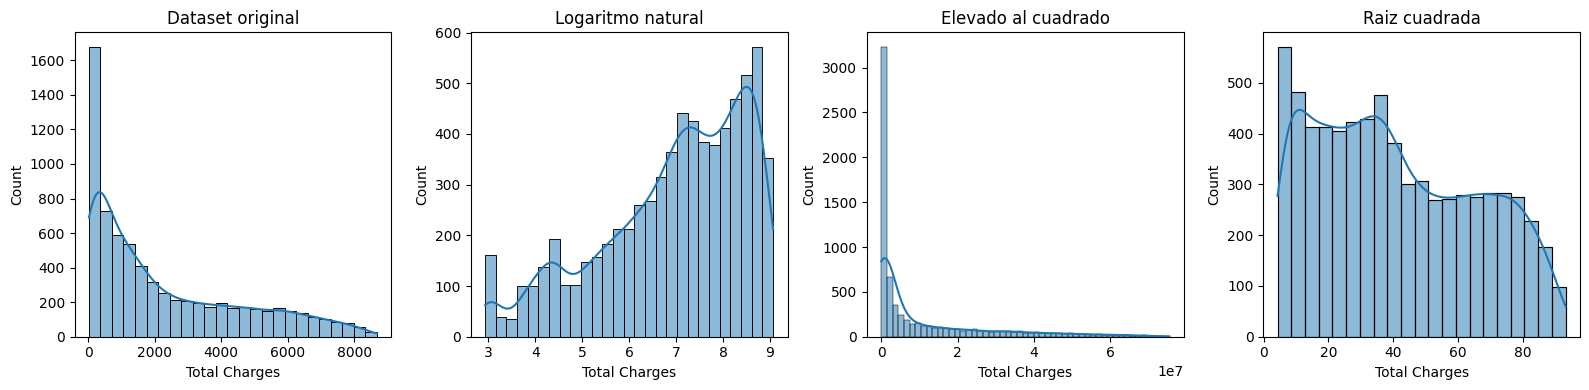

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Total Charges'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df, x=df[selected_x], kde=True, ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df, x=np.log(df[selected_x]), kde=True, ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df, x=df[selected_x]**2, kde=True, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df, x=df[selected_x]**0.5, kde=True, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# Define the transformations
transformations = [
    lambda x: x,                             # Original data
    np.log,                                  # Natural logarithm
    lambda x: x ** 2,                        # Squared
    lambda x: np.sqrt(x)                     # Square root
]

# Perform evaluation for each transformation
for i, transformation in enumerate(transformations):
    transformed_data = transformation(df[selected_x])

    print(f"Scenario {i+1}: {transformation.__name__}")
    print("Summary Statistics:")
    print(f"Mean: {np.mean(transformed_data)}")
    print(f"Median: {np.median(transformed_data)}")
    print(f"Standard Deviation: {np.std(transformed_data)}")

    # Shapiro-Wilk test
    _, shapiro_pvalue = stats.shapiro(transformed_data)
    print("Shapiro-Wilk Test:")
    print(f"Test Statistic: {shapiro_pvalue}")
    print(f"p-value: {shapiro_pvalue}\n")

    # Anderson-Darling test
    anderson_result = stats.anderson(transformed_data)
    print("Anderson-Darling Test:")
    print(f"Test Statistic: {anderson_result.statistic}")
    print(f"Critical Values: {anderson_result.critical_values}")
    print(f"Significance Levels: {anderson_result.significance_level}\n")

    print("-------------------------------\n")

Scenario 1: <lambda>
Summary Statistics:
Mean: 2283.3004408418656
Median: 1400.55
Standard Deviation: 2264.8394541214802
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 344.4410808522862
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 2: log
Summary Statistics:
Mean: 6.940719982738217
Median: 7.244620295598045
Standard Deviation: 1.5521282823628526
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 140.30824106605087
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 3: <lambda>
Summary Statistics:
Mean: 10342958.656093942
Median: 1961540.3024999998
Standard Deviation: 15990089.044083009
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 844.6088283092868
Critical Values: [0.576 0.656

Yeo-Johnson Transformation Results:
Best Lambda: 0.25423490776751445
Summary Statistics:
Mean: 20.712794847435543
Median: 20.883246081209236
Standard Deviation: 8.417480222260439
Shapiro-Wilk Test:
Test Statistic: 2.2167176840914354e-38
p-value: 2.2167176840914354e-38

Anderson-Darling Test:
Test Statistic: 55.631294296525994
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



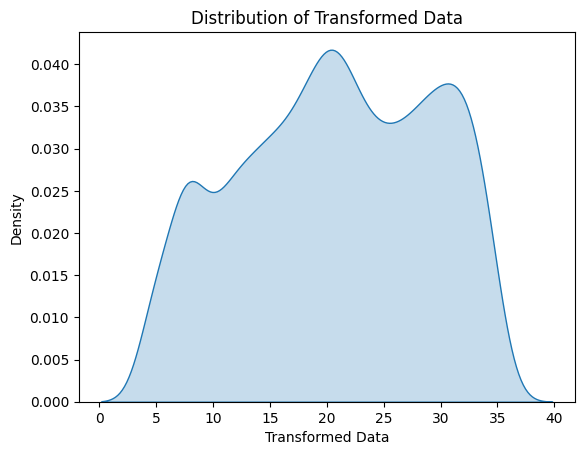

In [ ]:
import scipy.stats as stats

transformed_data, best_lambda = stats.yeojohnson(df[selected_x])

print("Yeo-Johnson Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Quantile Transformation Results:
Summary Statistics:
Mean: -0.00015745529529389798
Median: 0.0003064648471992228
Standard Deviation: 1.0027703419598728
Shapiro-Wilk Test:
Test Statistic: 0.0784216821193695
p-value: 0.0784216821193695

Anderson-Darling Test:
Test Statistic: 0.018260938613821054
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



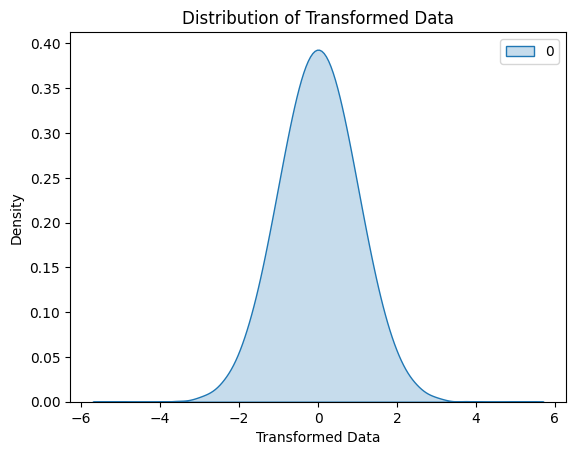

In [ ]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
transformed_data = transformer.fit_transform(df[[selected_x]])

print("Quantile Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data.flatten())
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data.flatten())
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

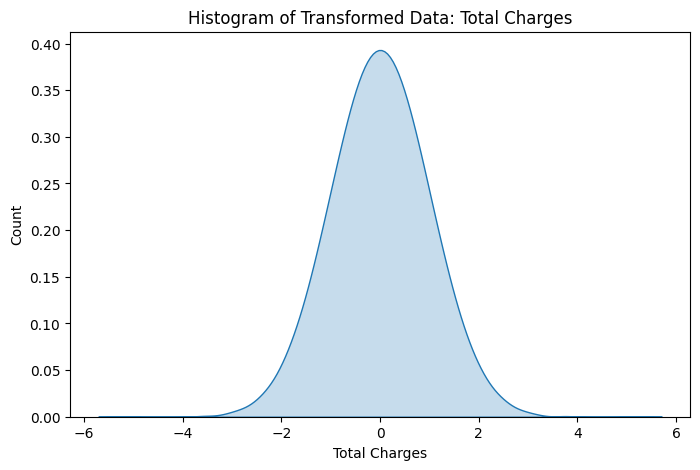

In [ ]:
df[selected_x] = transformed_data.flatten()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=df[selected_x], shade=True)
plt.title('Histogram of Transformed Data: ' + selected_x)
plt.xlabel(selected_x)
plt.ylabel('Count')
plt.show()

###Monthly Charges

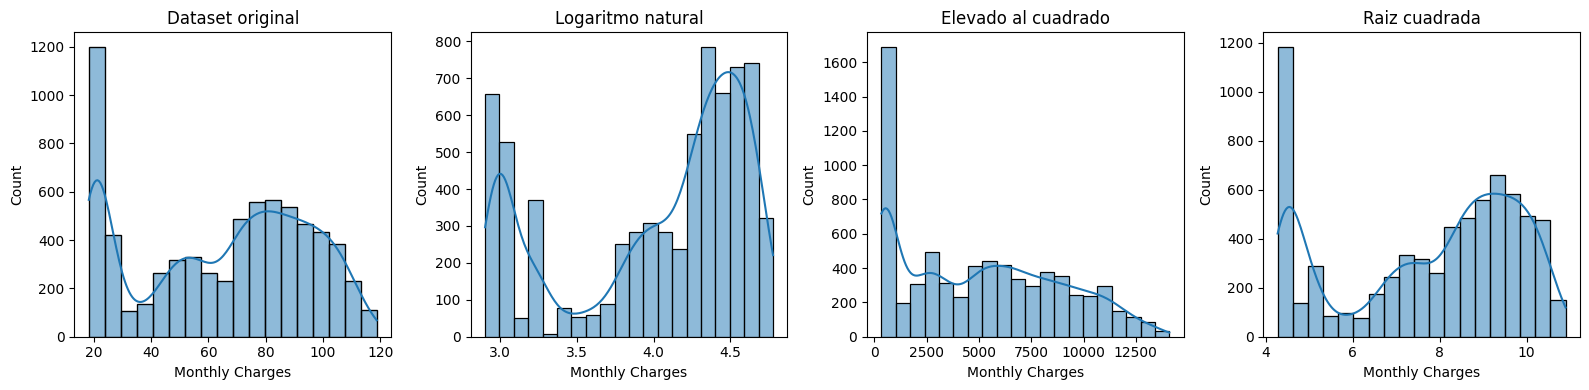

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Monthly Charges'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df, x=df[selected_x], kde=True, ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df, x=np.log(df[selected_x]), kde=True, ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df, x=df[selected_x]**2, kde=True, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df, x=df[selected_x]**0.5, kde=True, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# Define the transformations
transformations = [
    lambda x: x,                             # Original data
    np.log,                                  # Natural logarithm
    lambda x: x ** 2,                        # Squared
    lambda x: np.sqrt(x)                     # Square root
]

# Perform evaluation for each transformation
for i, transformation in enumerate(transformations):
    transformed_data = transformation(df[selected_x])

    print(f"Scenario {i+1}: {transformation.__name__}")
    print("Summary Statistics:")
    print(f"Mean: {np.mean(transformed_data)}")
    print(f"Median: {np.median(transformed_data)}")
    print(f"Standard Deviation: {np.std(transformed_data)}")

    # Shapiro-Wilk test
    _, shapiro_pvalue = stats.shapiro(transformed_data)
    print("Shapiro-Wilk Test:")
    print(f"Test Statistic: {shapiro_pvalue}")
    print(f"p-value: {shapiro_pvalue}\n")

    # Anderson-Darling test
    anderson_result = stats.anderson(transformed_data)
    print("Anderson-Darling Test:")
    print(f"Test Statistic: {anderson_result.statistic}")
    print(f"Critical Values: {anderson_result.critical_values}")
    print(f"Significance Levels: {anderson_result.significance_level}\n")

    print("-------------------------------\n")


Scenario 1: <lambda>
Summary Statistics:
Mean: 64.76169246059918
Median: 70.35
Standard Deviation: 30.087910854936975
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 170.555235072914
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 2: log
Summary Statistics:
Mean: 4.021917326387132
Median: 4.253482783560398
Standard Deviation: 0.5943822020861118
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 396.5103800391953
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 3: <lambda>
Summary Statistics:
Mean: 5099.359189975862
Median: 4949.1224999999995
Standard Deviation: 3773.63982698187
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 138.05040863433805
Critical Values: [0.576 0.656 0.787 

Box-Cox Transformation Results:
Best Lambda: 0.9189491915127169
Summary Statistics:
Mean: 48.71299073414508
Median: 53.14314271435565
Standard Deviation: 21.702317390002012
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 181.31504413235598
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



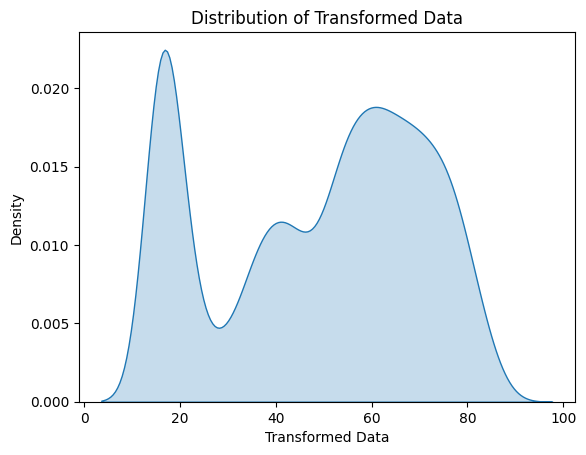

In [ ]:
import scipy.stats as stats

transformed_data, best_lambda = stats.boxcox(df[selected_x])

print("Box-Cox Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Yeo-Johnson Transformation Results:
Best Lambda: 0.926646286463581
Summary Statistics:
Mean: 50.70571950337599
Median: 55.223207037571484
Standard Deviation: 22.35299278209181
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 180.0775877883034
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



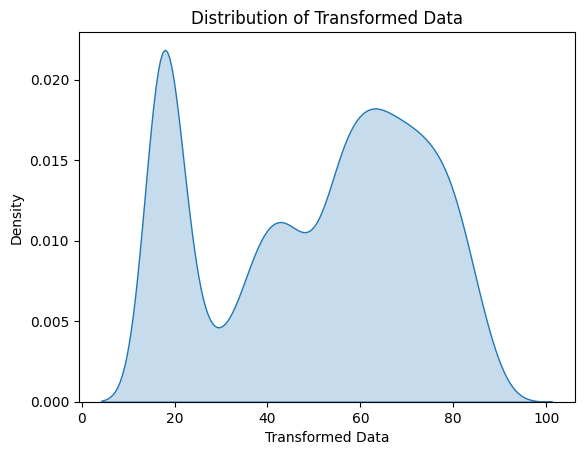

In [ ]:
import scipy.stats as stats

transformed_data, best_lambda = stats.yeojohnson(df[selected_x])

print("Yeo-Johnson Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Quantile Transformation Results:
Summary Statistics:
Mean: 0.0001228055684319975
Median: 0.0012545690351250104
Standard Deviation: 1.0030284241658145
Shapiro-Wilk Test:
Test Statistic: 0.045701075345277786
p-value: 0.045701075345277786

Anderson-Darling Test:
Test Statistic: 0.06847800091327372
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



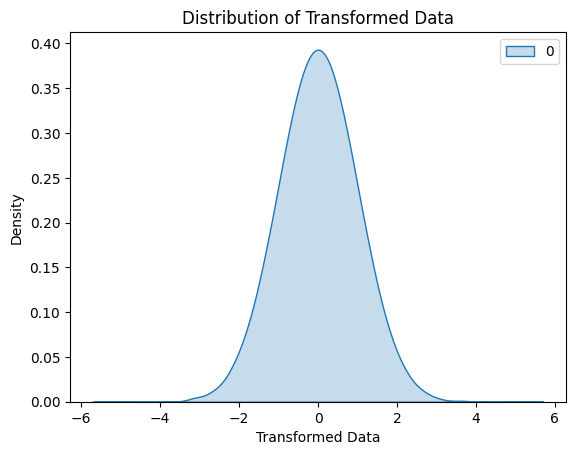

In [ ]:
from sklearn.preprocessing import QuantileTransformer

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']

transformer = QuantileTransformer(output_distribution='normal')
transformed_data = transformer.fit_transform(df[[selected_x]])

print("Quantile Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data.flatten())
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data.flatten())
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

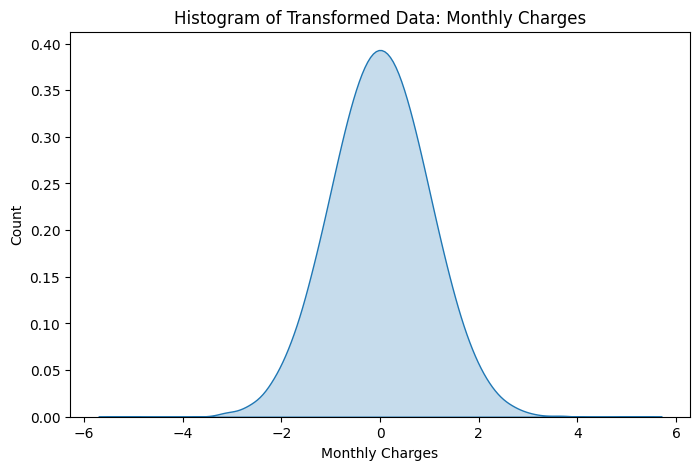

In [ ]:
df[selected_x] = transformed_data.flatten()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=df[selected_x], shade=True)
plt.title('Histogram of Transformed Data: ' + selected_x)
plt.xlabel(selected_x)
plt.ylabel('Count')
plt.show()

###CLTV

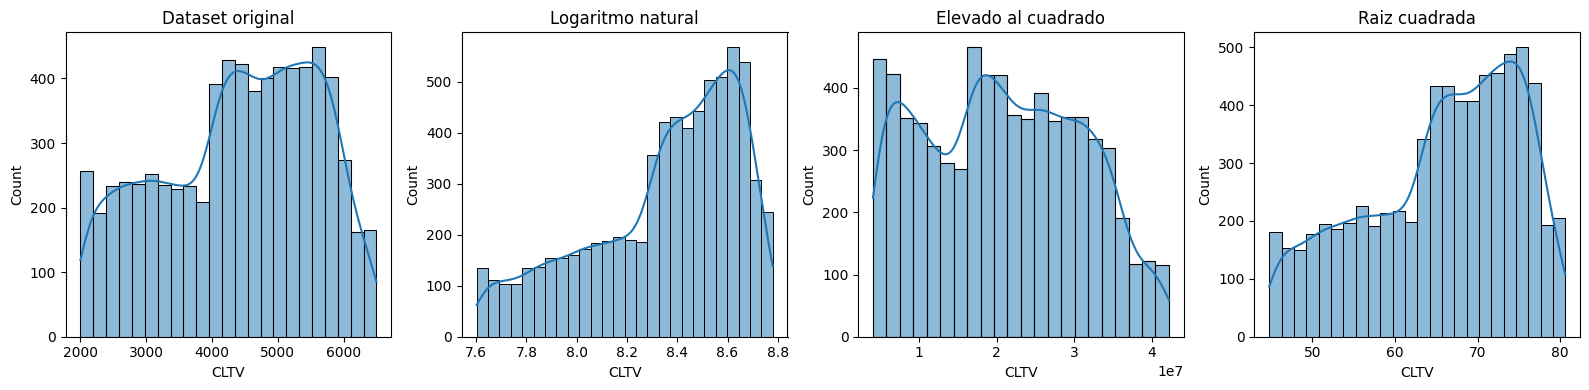

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'CLTV'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df, x=df[selected_x], kde=True, ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df, x=np.log(df[selected_x]), kde=True, ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df, x=df[selected_x]**2, kde=True, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df, x=df[selected_x]**0.5, kde=True, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# Define the transformations
transformations = [
    lambda x: x,                             # Original data
    np.log,                                  # Natural logarithm
    lambda x: x ** 2,                        # Squared
    lambda x: np.sqrt(x)                     # Square root
]

# Perform evaluation for each transformation
for i, transformation in enumerate(transformations):
    transformed_data = transformation(df[selected_x])

    print(f"Scenario {i+1}: {transformation.__name__}")
    print("Summary Statistics:")
    print(f"Mean: {np.mean(transformed_data)}")
    print(f"Median: {np.median(transformed_data)}")
    print(f"Standard Deviation: {np.std(transformed_data)}")

    # Shapiro-Wilk test
    _, shapiro_pvalue = stats.shapiro(transformed_data)
    print("Shapiro-Wilk Test:")
    print(f"Test Statistic: {shapiro_pvalue}")
    print(f"p-value: {shapiro_pvalue}\n")

    # Anderson-Darling test
    anderson_result = stats.anderson(transformed_data)
    print("Anderson-Darling Test:")
    print(f"Test Statistic: {anderson_result.statistic}")
    print(f"Critical Values: {anderson_result.critical_values}")
    print(f"Significance Levels: {anderson_result.significance_level}\n")

    print("-------------------------------\n")


Scenario 1: <lambda>
Summary Statistics:
Mean: 4400.295754650007
Median: 4527.0
Standard Deviation: 1182.9731608160005
Shapiro-Wilk Test:
Test Statistic: 1.5847144203202924e-39
p-value: 1.5847144203202924e-39

Anderson-Darling Test:
Test Statistic: 71.98201804471773
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 2: log
Summary Statistics:
Mean: 8.347688378112567
Median: 8.417814747435958
Standard Deviation: 0.3007731690907062
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 168.35868774815026
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 3: <lambda>
Summary Statistics:
Mean: 20762028.227601875
Median: 20493729.0
Standard Deviation: 10069539.311391704
Shapiro-Wilk Test:
Test Statistic: 4.673939326783922e-37
p-value: 4.673939326783922e-37

Anderson-Darling Test:

Box-Cox Transformation Results:
Best Lambda: 1.378314743281436
Summary Statistics:
Mean: 77781.6399370608
Median: 79342.36293788461
Standard Deviation: 27678.030534747297
Shapiro-Wilk Test:
Test Statistic: 3.794076800876364e-37
p-value: 3.794076800876364e-37

Anderson-Darling Test:
Test Statistic: 56.03016306308382
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



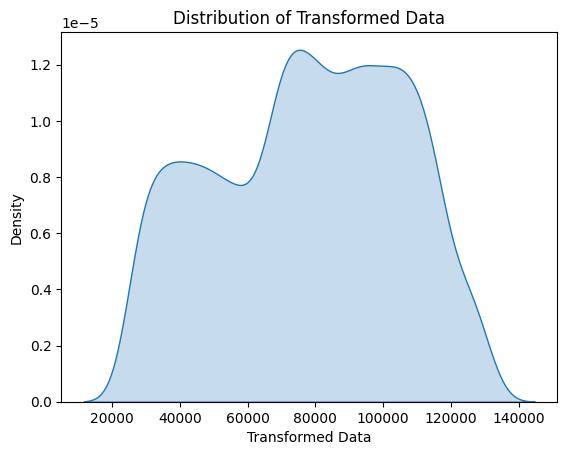

In [ ]:
import scipy.stats as stats

transformed_data, best_lambda = stats.boxcox(df[selected_x])

print("Box-Cox Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Yeo-Johnson Transformation Results:
Best Lambda: 1.3784775088057735
Summary Statistics:
Mean: 77903.23504187222
Median: 79465.95785164581
Standard Deviation: 27718.220521539704
Shapiro-Wilk Test:
Test Statistic: 3.794538668850205e-37
p-value: 3.794538668850205e-37

Anderson-Darling Test:
Test Statistic: 56.027406747541136
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



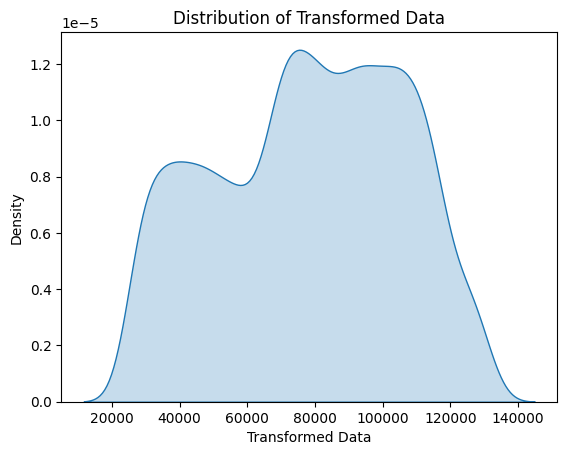

In [ ]:
import scipy.stats as stats

transformed_data, best_lambda = stats.yeojohnson(df[selected_x])

print("Yeo-Johnson Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Quantile Transformation Results:
Summary Statistics:
Mean: -0.0006312071060006442
Median: 0.0
Standard Deviation: 1.0052264918993221
Shapiro-Wilk Test:
Test Statistic: 1.504108149674721e-05
p-value: 1.504108149674721e-05

Anderson-Darling Test:
Test Statistic: 0.0626497595130786
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



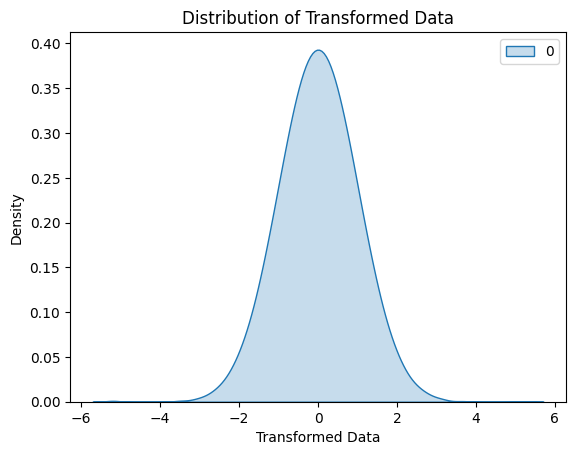

In [ ]:
from sklearn.preprocessing import QuantileTransformer

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']

transformer = QuantileTransformer(output_distribution='normal')
transformed_data = transformer.fit_transform(df[[selected_x]])

print("Quantile Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data.flatten())
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data.flatten())
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

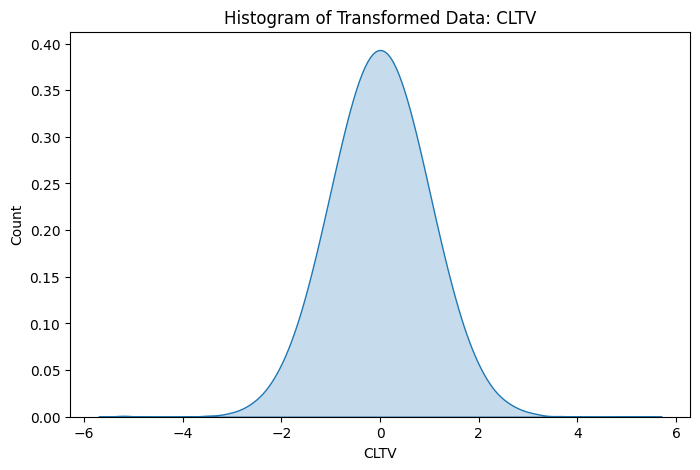

In [ ]:
df[selected_x] = transformed_data.flatten()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=df[selected_x], shade=True)
plt.title('Histogram of Transformed Data: ' + selected_x)
plt.xlabel(selected_x)
plt.ylabel('Count')
plt.show()

###Tenure Months

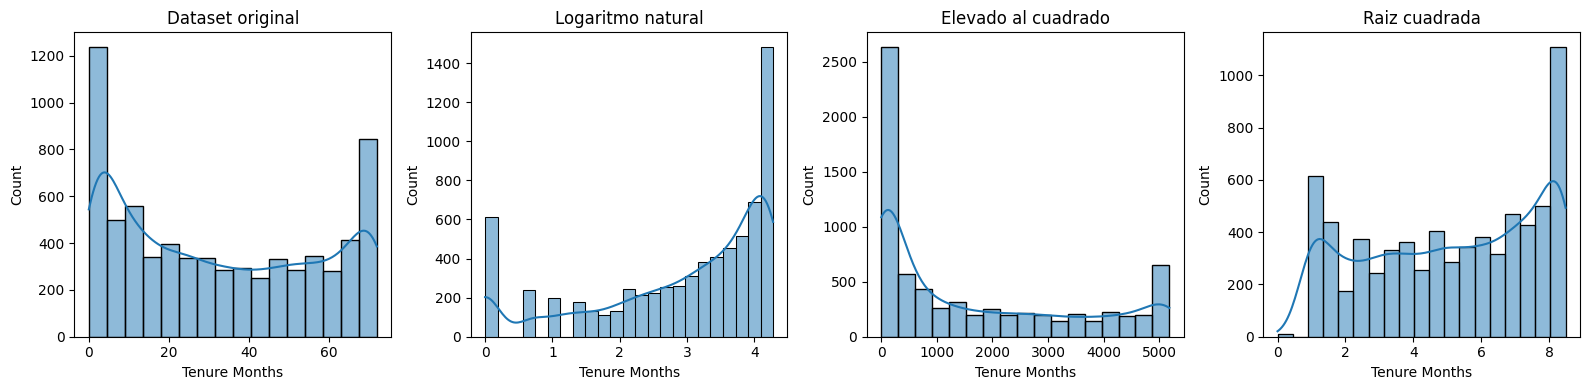

In [ ]:
x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']
selected_x = 'Tenure Months'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=df, x=df[selected_x], kde=True, ax=axs[0])
axs[0].set_title('Dataset original')

sns.histplot(data=df, x=np.log(df[selected_x]), kde=True, ax=axs[1])
axs[1].set_title('Logaritmo natural')

sns.histplot(data=df, x=df[selected_x]**2, kde=True, ax=axs[2])
axs[2].set_title('Elevado al cuadrado')

sns.histplot(data=df, x=df[selected_x]**0.5, kde=True, ax=axs[3])
axs[3].set_title('Raiz cuadrada')

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# Define the transformations
transformations = [
    lambda x: x,                             # Original data
    np.log,                                  # Natural logarithm
    lambda x: x ** 2,                        # Squared
    lambda x: np.sqrt(x)                     # Square root
]

# Perform evaluation for each transformation
for i, transformation in enumerate(transformations):
    transformed_data = transformation(df[selected_x])

    print(f"Scenario {i+1}: {transformation.__name__}")
    print("Summary Statistics:")
    print(f"Mean: {np.mean(transformed_data)}")
    print(f"Median: {np.median(transformed_data)}")
    print(f"Standard Deviation: {np.std(transformed_data)}")

    # Shapiro-Wilk test
    _, shapiro_pvalue = stats.shapiro(transformed_data)
    print("Shapiro-Wilk Test:")
    print(f"Test Statistic: {shapiro_pvalue}")
    print(f"p-value: {shapiro_pvalue}\n")

    # Anderson-Darling test
    anderson_result = stats.anderson(transformed_data)
    print("Anderson-Darling Test:")
    print(f"Test Statistic: {anderson_result.statistic}")
    print(f"Critical Values: {anderson_result.critical_values}")
    print(f"Significance Levels: {anderson_result.significance_level}\n")

    print("-------------------------------\n")


Scenario 1: <lambda>
Summary Statistics:
Mean: 32.37114865824223
Median: 29.0
Standard Deviation: 24.55773742286344
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 203.2354707966997
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 2: log
Summary Statistics:
Mean: -inf
Median: 3.367295829986474
Standard Deviation: nan
Shapiro-Wilk Test:
Test Statistic: 1.0
p-value: 1.0

Anderson-Darling Test:
Test Statistic: nan
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]

-------------------------------

Scenario 3: <lambda>
Summary Statistics:
Mean: 1650.973732784325
Median: 841.0
Standard Deviation: 1791.6461819219758
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 463.15975150608756
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5

Yeo-Johnson Transformation Results:
Best Lambda: 0.4461132559331459
Summary Statistics:
Mean: 7.499062190946191
Median: 7.980001747763974
Standard Deviation: 4.066541369623597
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 157.29583622622704
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



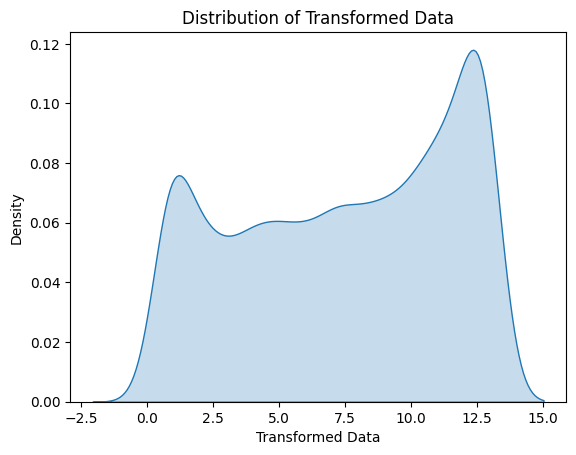

In [ ]:
import scipy.stats as stats

transformed_data, best_lambda = stats.yeojohnson(df[selected_x])

print("Yeo-Johnson Transformation Results:")
print(f"Best Lambda: {best_lambda}")

# Evaluate the transformed data
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Quantile Transformation Results:
Summary Statistics:
Mean: 0.1667880388053843
Median: 0.005018295886876199
Standard Deviation: 1.457592862214944
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 306.3682043842691
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



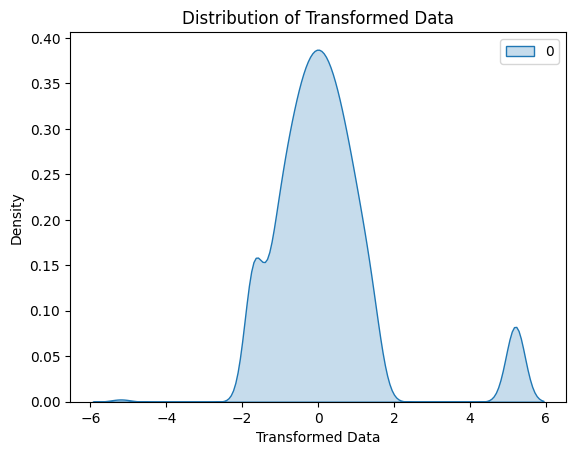

In [ ]:
from sklearn.preprocessing import QuantileTransformer

x = ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Total Charges']

transformer = QuantileTransformer(output_distribution='normal')
transformed_data = transformer.fit_transform(df[[selected_x]])

print("Quantile Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data.flatten())
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data.flatten())
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Box-Cox Transformation Results:
Summary Statistics:
Mean: 7.372761625103097
Median: 7.949520511174343
Standard Deviation: 4.350111576488445
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 153.02929343722826
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



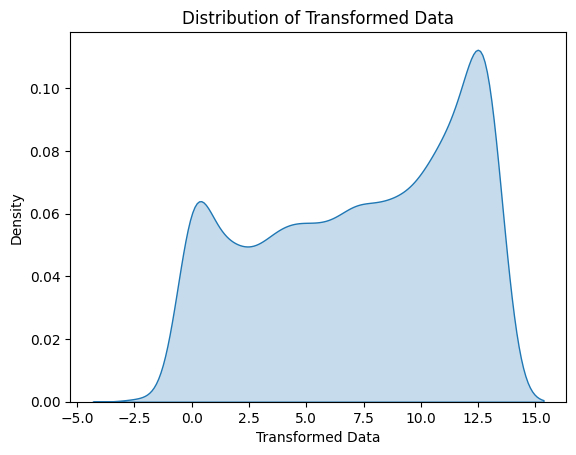

In [ ]:
from scipy.stats import boxcox

# Apply the Box-Cox transformation
# Add a constant value to make the data positive
constant = 0.001
transformed_data, lambda_ = boxcox(df[selected_x] + constant)

print("Box-Cox Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()

Exponential Transformation Results:
Summary Statistics:
Mean: 1.1828067393095687e+30
Median: 3931334297144.042
Standard Deviation: 4.1959854467382254e+30
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 2232.2471522759606
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



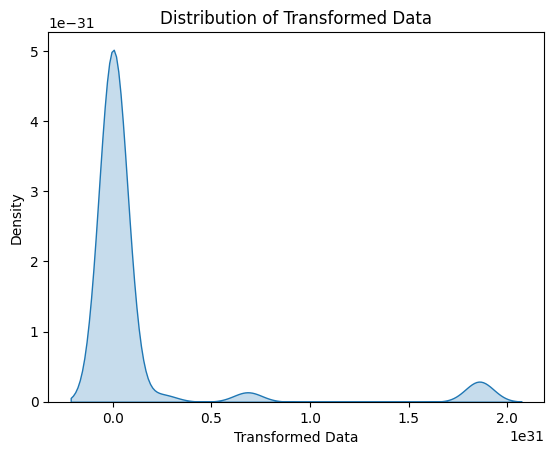

In [ ]:
transformed_data = np.exp(df[selected_x])

print("Exponential Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()


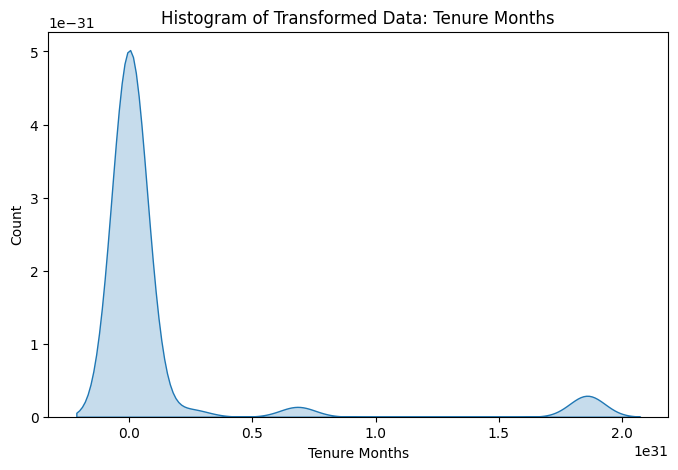

In [ ]:
df[selected_x] = transformed_data

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=df[selected_x], shade=True)
plt.title('Histogram of Transformed Data: ' + selected_x)
plt.xlabel(selected_x)
plt.ylabel('Count')
plt.show()

Reciprocal Transformation Results:
Summary Statistics:
Mean: 0.04021767260793326
Median: 2.543665647376923e-13
Standard Deviation: 0.11145489030215425
Shapiro-Wilk Test:
Test Statistic: 0.0
p-value: 0.0

Anderson-Darling Test:
Test Statistic: 1952.1063328554446
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]



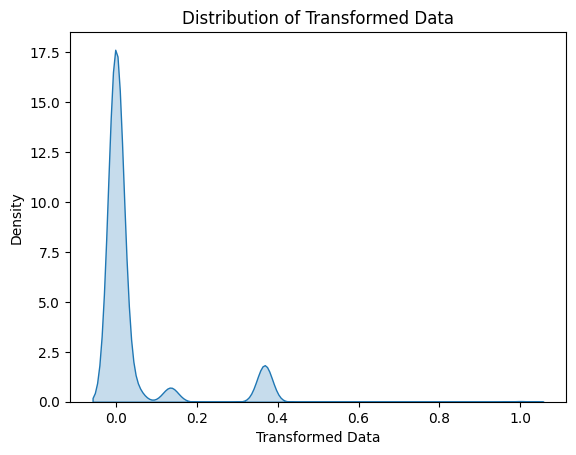

In [ ]:
# Perform reciprocal transformation
transformed_data = 1 / df[selected_x]

print("Reciprocal Transformation Results:")
print("Summary Statistics:")
print(f"Mean: {np.mean(transformed_data)}")
print(f"Median: {np.median(transformed_data)}")
print(f"Standard Deviation: {np.std(transformed_data)}")

# Shapiro-Wilk test
_, shapiro_pvalue = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_pvalue}")
print(f"p-value: {shapiro_pvalue}\n")

# Anderson-Darling test
anderson_result = stats.anderson(transformed_data)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_result.statistic}")
print(f"Critical Values: {anderson_result.critical_values}")
print(f"Significance Levels: {anderson_result.significance_level}\n")

# Plot the transformed data with kernel density estimate
sns.kdeplot(transformed_data, shade=True)

# Add labels and title to the plot
plt.xlabel('Transformed Data')
plt.ylabel('Density')
plt.title('Distribution of Transformed Data')

# Display the plot
plt.show()


## Encoding of categorical vaiables

Pendientes:
* City: Tiene 1129 categorías

In [ ]:
# Get columns that are not numeric
non_numeric_columns = df.select_dtypes(exclude=[float, int]).columns

print(non_numeric_columns)

Index(['CustomerID', 'Country', 'State', 'City', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label',
       'Churn Reason'],
      dtype='object')


In [ ]:
# Extract the first four letters from the left in the 'CustomerID' column
df['CustomerID_extracted'] = df['CustomerID'].str[:4]
print(df[['CustomerID_extracted', 'CustomerID']].head(10))
df = df.drop(['CustomerID'], axis=1)

# Se convierte Total Charges a float
df['CustomerID_extracted'] = pd.to_numeric(df['CustomerID_extracted'], errors='coerce')

  CustomerID_extracted  CustomerID
0                 3668  3668-QPYBK
1                 9237  9237-HQITU
2                 9305  9305-CDSKC
3                 7892  7892-POOKP
4                 0280  0280-XJGEX
5                 4190  4190-MFLUW
6                 8779  8779-QRDMV
7                 1066  1066-JKSGK
8                 6467  6467-CHFZW
9                 8665  8665-UTDHZ


In [ ]:
df = df.drop(['Churn Label'], axis=1)

In [ ]:
encoding = ['Country', 'State', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Reason']

for col in encoding:
  one_hot_encoded = pd.get_dummies(df[col], prefix=col)
  df = pd.concat([df, one_hot_encoded], axis=1)
  df = df.drop(col, axis=1)

In [ ]:
target_means = df.groupby('City')['Churn Value'].mean()
df['City_encoded'] = df['City'].map(target_means)
df = df.drop(['City'], axis=1)

In [ ]:
df.head(5).T

0  \
Zip Code                                            90003.000000   
Latitude                                               33.964131   
Longitude                                            -118.272783   
Tenure Months                                           7.389056   
Monthly Charges                                        -0.371687   
Total Charges                                          -1.177609   
Churn Value                                             1.000000   
Churn Score                                             1.247505   
CLTV                                                   -0.805043   
CustomerID_extracted                                 3668.000000   
Country_United States                                   1.000000   
State_California                                        1.000000   
Gender_Female                                           0.000000   
Gender_Male                                             1.000000   
Senior Citizen_No                                       1.000000   
Senior Citizen_Yes                                      0.000000   
Partner_No                                              1.000000   
Partner_Yes                                             0.000000   
Dependents_No                                           1.000000   
Dependents_Yes                                          0.000000   
Phone Service_No                                        0.000000   
Phone Service_Yes                                       1.000000   
Multiple Lines_No                                       1.000000   
Multiple Lines_No phone service                         0.000000   
Multiple Lines_Yes                                      0.000000   
Internet Service_DSL                                    1.000000   
Internet Service_Fiber optic                            0.000000   
Internet Service_No                                     0.000000   
Online Security_No                                      0.000000   
Online Security_No internet service                     0.000000   
Online Security_Yes                                     1.000000   
Online Backup_No                                        0.000000   
Online Backup_No internet service                       0.000000   
Online Backup_Yes                                       1.000000   
Device Protection_No                                    1.000000   
Device Protection_No internet service                   0.000000   
Device Protection_Yes                                   0.000000   
Tech Support_No                                         1.000000   
Tech Support_No internet service                        0.000000   
Tech Support_Yes                                        0.000000   
Streaming TV_No                                         1.000000   
Streaming TV_No internet service                        0.000000   
Streaming TV_Yes                                        0.000000   
Streaming Movies_No                                     1.000000   
Streaming Movies_No internet service                    0.000000   
Streaming Movies_Yes                                    0.000000   
Contract_Month-to-month                                 1.000000   
Contract_One year                                       0.000000   
Contract_Two year                                       0.000000   
Paperless Billing_No                                    0.000000   
Paperless Billing_Yes                                   1.000000   
Payment Method_Bank transfer (automatic)                0.000000   
Payment Method_Credit card (automatic)                  0.000000   
Payment Method_Electronic check                         0.000000   
Payment Method_Mailed check                             1.000000   
Churn Reason_Activo                                     0.000000   
Churn Reason_Attitude of service provider               0.000000   
Churn Reason_Attitude of support person                 0.000000   
Churn Reason_Competitor had better devices         

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=[float, int, np.uint8]).columns
non_numeric_columns

Index([], dtype='object')

<Axes: >

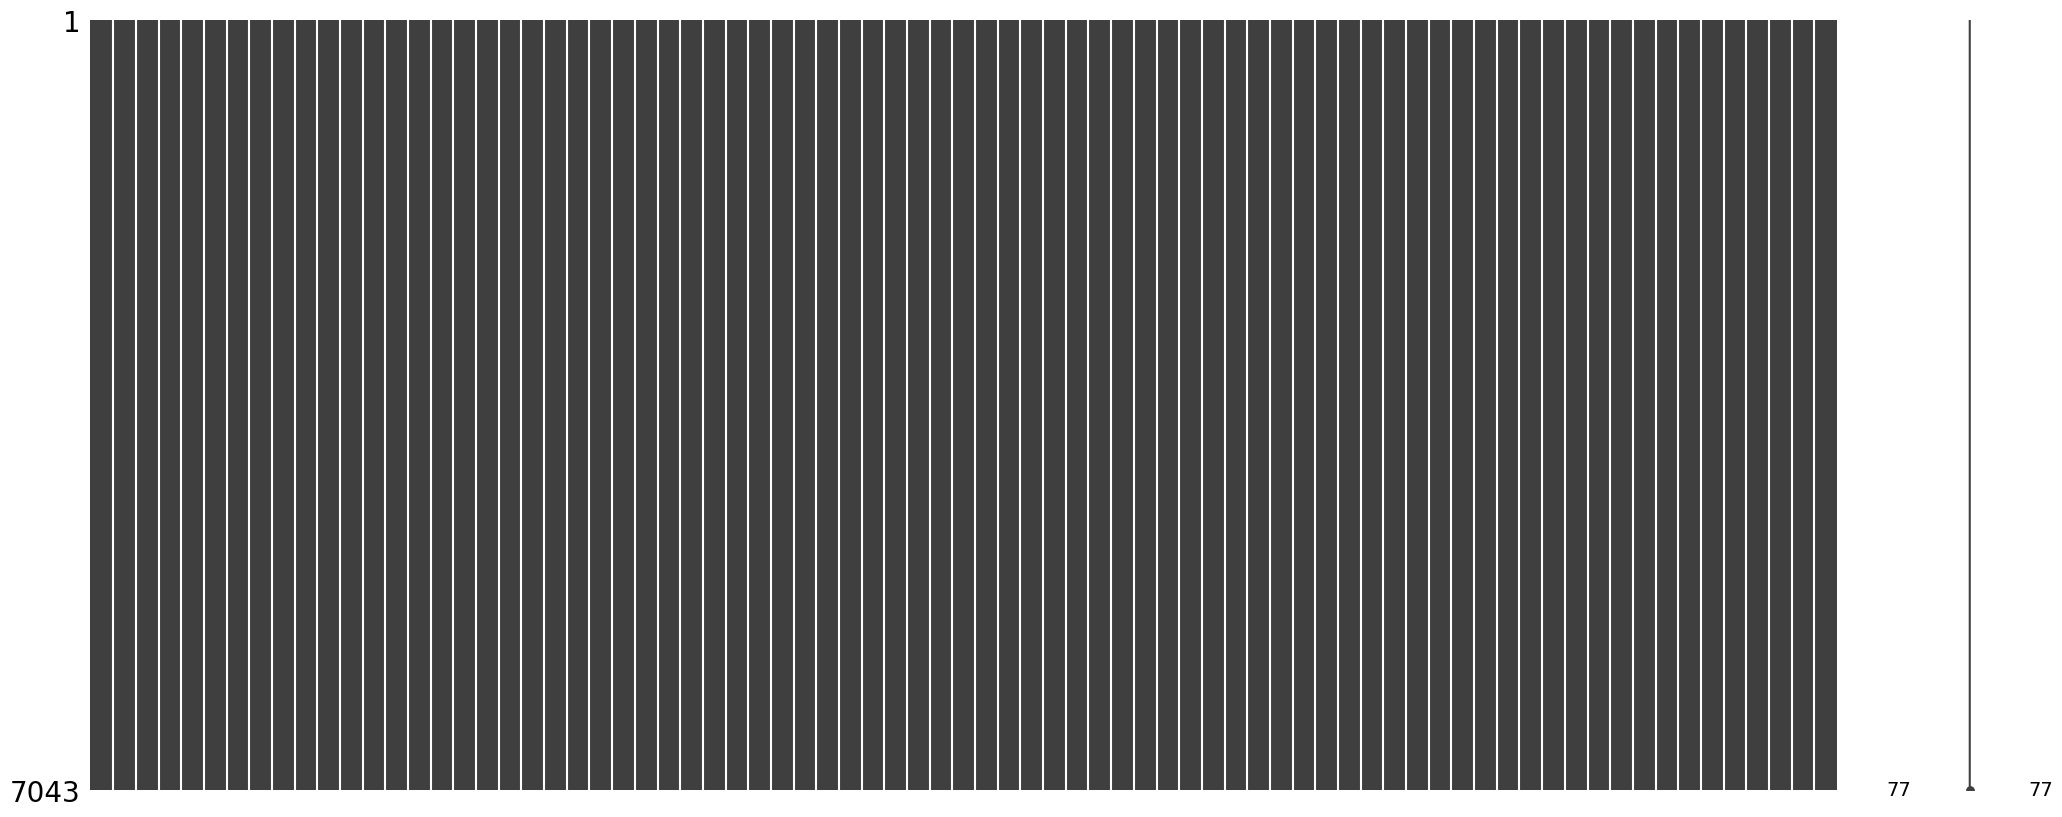

In [ ]:
msno.matrix(df)

In [ ]:
# Columnas con porcentaje de nulos
# Los valores en nulo son porque los clientes siguen activos
# Los valores nulos se podrían reemplazar por un valor
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

# Modelos de ML

##Procesamiento y selección de variables

### Feature selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 77 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zip Code                                                7043 non-null   int64  
 1   Latitude                                                7043 non-null   float64
 2   Longitude                                               7043 non-null   float64
 3   Tenure Months                                           7043 non-null   float64
 4   Monthly Charges                                         7043 non-null   float64
 5   Total Charges                                           7043 non-null   float64
 6   Churn Value                                             7043 non-null   int64  
 7   Churn Score                                             7043 non-null   float64
 8   CLTV                                  

In [ ]:
df_num = df.select_dtypes('number') #Me extrae solo los datos numéricos
df_num = pd.DataFrame(df_num) #Me los coloca con un DF de pandas

x= df_num.drop(['Churn Value'], 1) # feature matrix
y = df_num['Churn Value']  # target feature

df_num.head(5).T

0  \
Zip Code                                            90003.000000   
Latitude                                               33.964131   
Longitude                                            -118.272783   
Tenure Months                                           7.389056   
Monthly Charges                                        -0.371687   
Total Charges                                          -1.177609   
Churn Value                                             1.000000   
Churn Score                                             1.247505   
CLTV                                                   -0.805043   
CustomerID_extracted                                 3668.000000   
Country_United States                                   1.000000   
State_California                                        1.000000   
Gender_Female                                           0.000000   
Gender_Male                                             1.000000   
Senior Citizen_No                                       1.000000   
Senior Citizen_Yes                                      0.000000   
Partner_No                                              1.000000   
Partner_Yes                                             0.000000   
Dependents_No                                           1.000000   
Dependents_Yes                                          0.000000   
Phone Service_No                                        0.000000   
Phone Service_Yes                                       1.000000   
Multiple Lines_No                                       1.000000   
Multiple Lines_No phone service                         0.000000   
Multiple Lines_Yes                                      0.000000   
Internet Service_DSL                                    1.000000   
Internet Service_Fiber optic                            0.000000   
Internet Service_No                                     0.000000   
Online Security_No                                      0.000000   
Online Security_No internet service                     0.000000   
Online Security_Yes                                     1.000000   
Online Backup_No                                        0.000000   
Online Backup_No internet service                       0.000000   
Online Backup_Yes                                       1.000000   
Device Protection_No                                    1.000000   
Device Protection_No internet service                   0.000000   
Device Protection_Yes                                   0.000000   
Tech Support_No                                         1.000000   
Tech Support_No internet service                        0.000000   
Tech Support_Yes                                        0.000000   
Streaming TV_No                                         1.000000   
Streaming TV_No internet service                        0.000000   
Streaming TV_Yes                                        0.000000   
Streaming Movies_No                                     1.000000   
Streaming Movies_No internet service                    0.000000   
Streaming Movies_Yes                                    0.000000   
Contract_Month-to-month                                 1.000000   
Contract_One year                                       0.000000   
Contract_Two year                                       0.000000   
Paperless Billing_No                                    0.000000   
Paperless Billing_Yes                                   1.000000   
Payment Method_Bank transfer (automatic)                0.000000   
Payment Method_Credit card (automatic)                  0.000000   
Payment Method_Electronic check                         0.000000   
Payment Method_Mailed check                             1.000000   
Churn Reason_Activo                                     0.000000   
Churn Reason_Attitude of service provider               0.000000   
Churn Reason_Attitude of support person                 0.000000   
Churn Reason_Competitor had better devices         

In [ ]:
value_counts = df['Churn Value'].value_counts()
print(value_counts)

0    5174
1    1869
Name: Churn Value, dtype: int64


In [ ]:
x.shape[1]

76

In [ ]:
x.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'Churn Score', 'CLTV', 'CustomerID_extracted',
       'Country_United States', 'State_California', 'Gender_Female',
       'Gender_Male', 'Senior Citizen_No', 'Senior Citizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No',
       'Streaming TV_No intern

### Valores duplicados

In [ ]:
df_num.drop_duplicates(inplace=True)

In [ ]:
len(df_num)

7043

### Análisis y procesamiento de la variable Churn Value


In [ ]:
# cantidad de valores unicos que tiene Churn Value
df_num['Churn Value'].nunique()

2

In [ ]:
#Valores unicos que tiene Churn Value
df_num['Churn Value'].unique()

array([1, 0])

In [ ]:
# conteo de registros por cada valor para pdays
df_num['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

### Variables con Outliers

In [ ]:
df_num.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score', 'CLTV',
       'CustomerID_extracted', 'Country_United States', 'State_California',
       'Gender_Female', 'Gender_Male', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streami

In [ ]:
df_num.dtypes

Zip Code                                                    int64
Latitude                                                  float64
Longitude                                                 float64
Tenure Months                                             float64
Monthly Charges                                           float64
Total Charges                                             float64
Churn Value                                                 int64
Churn Score                                               float64
CLTV                                                      float64
CustomerID_extracted                                        int64
Country_United States                                       uint8
State_California                                            uint8
Gender_Female                                               uint8
Gender_Male                                                 uint8
Senior Citizen_No                                           uint8
Senior Cit

In [ ]:
#for col in ['Tenure Months', 'Monthly Charges', 'CLTV', 'Churn Score']:
#    print(col)
#    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
#    sns.histplot(df[col], kde=True, ax=ax[0])
#    ax[1] = sns.boxplot(df[col], ax=ax[1])
#    plt.show()

Tenure Months


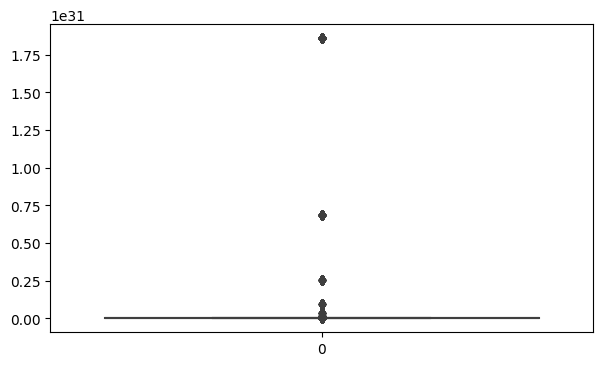

Monthly Charges


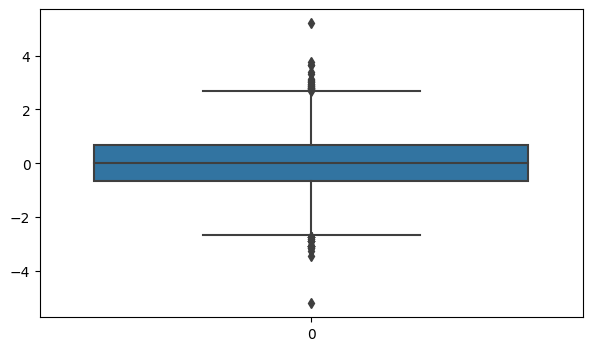

CLTV


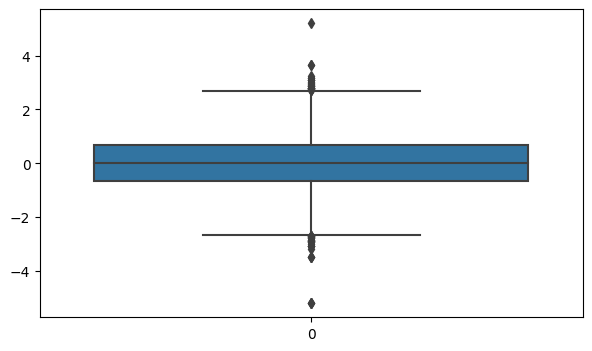

Churn Score


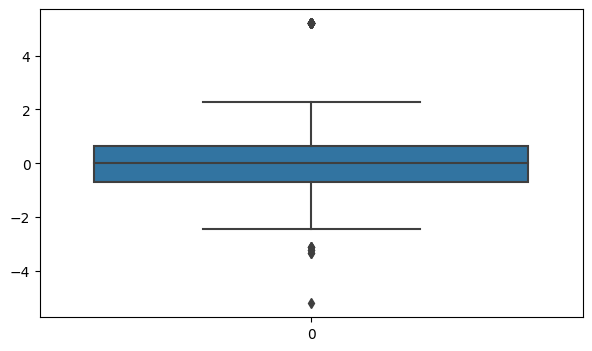

In [ ]:
for col in ['Tenure Months', 'Monthly Charges', 'CLTV', 'Churn Score']:
    print(col)
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(df[col], ax=ax)
    plt.show()

Tenure Months Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


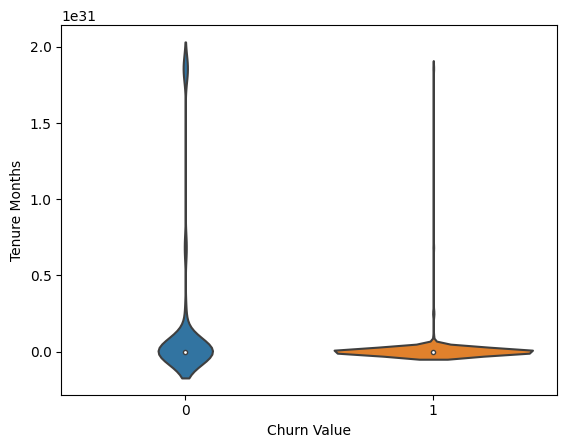

Monthly Charges Indicates the customer’s current total monthly charge for all their services from the company.


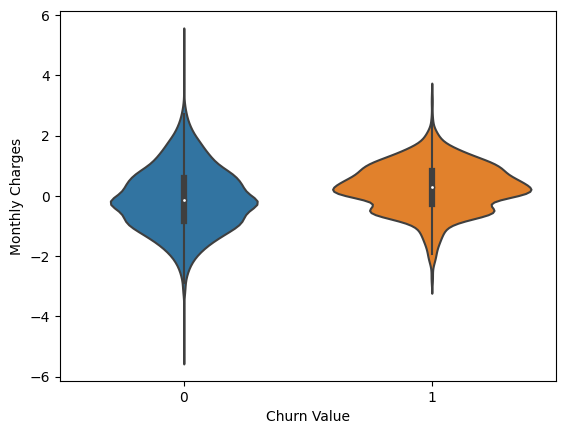

CLTV Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.


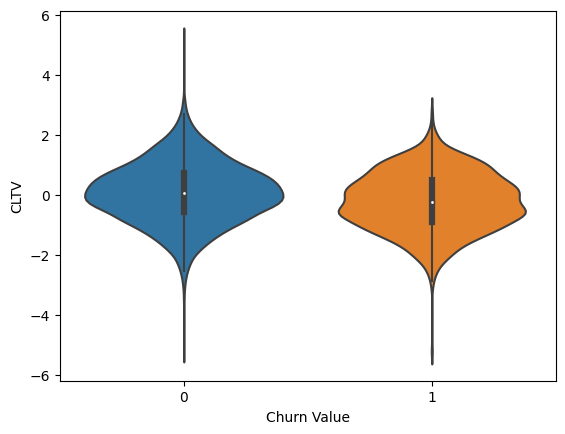

Churn Score  A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.


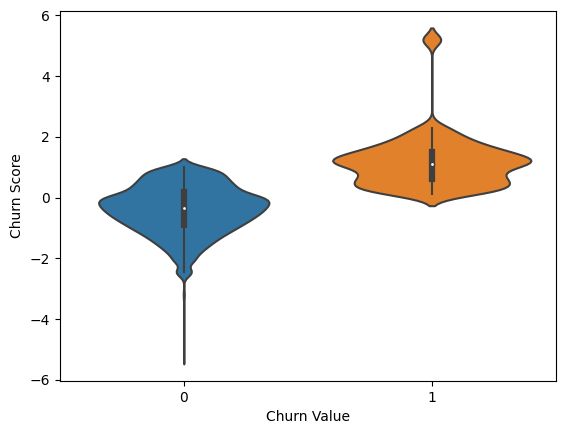

In [ ]:
for col in ['Tenure Months', 'Monthly Charges', 'CLTV', 'Churn Score']:
    print(col, d_desc[col])
    sns.violinplot(x='Churn Value', y=col, data=df_num)
    plt.show()

In [ ]:
target = df['Churn Value']

Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


2.5

In [ ]:
# creamos una nueva columas con valores reemplazados:
df_num['Churn_value_proc'] = df_num['Churn Value']
df_num.loc[df_num['Churn_value_proc']>tope, 'Churn_value_proc'] = tope

### Inputs del modelo:

In [ ]:
df_num.head().T

0  \
Zip Code                                            90003.000000   
Latitude                                               33.964131   
Longitude                                            -118.272783   
Tenure Months                                           7.389056   
Monthly Charges                                        -0.371687   
Total Charges                                          -1.177609   
Churn Value                                             1.000000   
Churn Score                                             1.247505   
CLTV                                                   -0.805043   
CustomerID_extracted                                 3668.000000   
Country_United States                                   1.000000   
State_California                                        1.000000   
Gender_Female                                           0.000000   
Gender_Male                                             1.000000   
Senior Citizen_No                                       1.000000   
Senior Citizen_Yes                                      0.000000   
Partner_No                                              1.000000   
Partner_Yes                                             0.000000   
Dependents_No                                           1.000000   
Dependents_Yes                                          0.000000   
Phone Service_No                                        0.000000   
Phone Service_Yes                                       1.000000   
Multiple Lines_No                                       1.000000   
Multiple Lines_No phone service                         0.000000   
Multiple Lines_Yes                                      0.000000   
Internet Service_DSL                                    1.000000   
Internet Service_Fiber optic                            0.000000   
Internet Service_No                                     0.000000   
Online Security_No                                      0.000000   
Online Security_No internet service                     0.000000   
Online Security_Yes                                     1.000000   
Online Backup_No                                        0.000000   
Online Backup_No internet service                       0.000000   
Online Backup_Yes                                       1.000000   
Device Protection_No                                    1.000000   
Device Protection_No internet service                   0.000000   
Device Protection_Yes                                   0.000000   
Tech Support_No                                         1.000000   
Tech Support_No internet service                        0.000000   
Tech Support_Yes                                        0.000000   
Streaming TV_No                                         1.000000   
Streaming TV_No internet service                        0.000000   
Streaming TV_Yes                                        0.000000   
Streaming Movies_No                                     1.000000   
Streaming Movies_No internet service                    0.000000   
Streaming Movies_Yes                                    0.000000   
Contract_Month-to-month                                 1.000000   
Contract_One year                                       0.000000   
Contract_Two year                                       0.000000   
Paperless Billing_No                                    0.000000   
Paperless Billing_Yes                                   1.000000   
Payment Method_Bank transfer (automatic)                0.000000   
Payment Method_Credit card (automatic)                  0.000000   
Payment Method_Electronic check                         0.000000   
Payment Method_Mailed check                             1.000000   
Churn Reason_Activo                                     0.000000   
Churn Reason_Attitude of service provider               0.000000   
Churn Reason_Attitude of support person                 0.000000   
Churn Reason_Competitor had better devices         

In [ ]:
columnas1 = df_num.columns.tolist()[:-2]
columnas1

['Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'CustomerID_extracted',
 'Country_United States',
 'State_California',
 'Gender_Female',
 'Gender_Male',
 'Senior Citizen_No',
 'Senior Citizen_Yes',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'Phone Service_No',
 'Phone Service_Yes',
 'Multiple Lines_No',
 'Multiple Lines_No phone service',
 'Multiple Lines_Yes',
 'Internet Service_DSL',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Online Security_No',
 'Online Security_No internet service',
 'Online Security_Yes',
 'Online Backup_No',
 'Online Backup_No internet service',
 'Online Backup_Yes',
 'Device Protection_No',
 'Device Protection_No internet service',
 'Device Protection_Yes',
 'Tech Support_No',
 'Tech Support_No internet service',
 'Tech Support_Yes',
 'Streaming TV_No',
 'Streaming TV_No internet service',
 'Streaming TV_Yes',
 'Streaming Movies_No

###Variables con mayor impacto en el modelo

In [ ]:
# Assuming your dataset is stored in the variable 'df'
# Iterate over the columns and check for infinite values
has_infinite_values = False
for col in df_num.columns:
    if pd.api.types.is_numeric_dtype(df_num[col].dtype):
        if np.isinf(df_num[col]).any():
            has_infinite_values = True
            break

if has_infinite_values:
    print("The dataset contains infinite values.")
else:
    print("The dataset does not contain infinite values.")


The dataset does not contain infinite values.


In [ ]:
#Me devuelve las columnas con valoers infinitos
columns_with_infinite_values = []

for col in df_num.columns:
    if pd.api.types.is_numeric_dtype(df_num[col].dtype):
        if np.isinf(df_num[col]).any():
            columns_with_infinite_values.append(col)

if len(columns_with_infinite_values) > 0:
    print("Columns with infinite values:", columns_with_infinite_values)
else:
    print("No columns contain infinite values.")

No columns contain infinite values.


In [ ]:
# Handle infinite or large values
df_num.replace([np.inf, -np.inf], np.nan, inplace=True)
df_num.fillna(0, inplace=True)  # Replace NaNs with a suitable value or use other imputation methods

# separamos las caracteristicas/features del target
X = df_num[columnas1]
y = df_num['Churn Value']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(data = X1, columns= X.columns)

#import numpy as np
#(X.age-np.mean(X.age))/np.std(X.age)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)



print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (5634, 76)
Tamaño del set de testeo: (1409, 76)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train) # 1 Paso y 2# Se hace al mismo tiempo

In [ ]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
plt.figure(figsize=(10, 12))  # Adjust the figure size as per your preference

values = pd.Series(clf.coef_.flat)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': values})
importance_df.sort_values(by='Importance', inplace=True)  # Sort the bars by importance

sns.barplot(data=importance_df, y='Feature', x='Importance')

plt.title('Importance of Features for the Churn Predictions')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add data labels to the right of the bars
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.01, i, f'{v:.2f}', color='black', ha='left')

plt.show()

AttributeError: ignored

<Figure size 1000x1200 with 0 Axes>

##Modelos con reducción de dimensionalidad a través de PCA

In [ ]:
# separamos las caracteristicas/features del target
X = df_num[columnas1]
y = df_num['Churn Value']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)



print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (5634, 76)
Tamaño del set de testeo: (1409, 76)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

###Regresión logística

In [ ]:
X_train #conjunto de entrenamiento reducido

array([[-1.16803965e+30,  4.64200575e+03, -1.60918047e+03,
        -6.58966912e-01,  6.20384587e-01,  9.05379723e-01],
       [-1.16180450e+30,  2.83416099e+03,  3.52569245e+03,
        -2.18319849e+00, -2.83647818e+00, -1.92274569e+00],
       [-1.16803965e+30,  3.56327880e+03, -1.00123184e+03,
        -2.45372231e-02, -1.22358501e+00, -1.52581120e+00],
       ...,
       [-1.16792545e+30, -1.68169527e+02,  1.51158952e+03,
        -5.31409367e-01,  1.67170190e+00, -9.07043497e-01],
       [-1.16803965e+30, -3.77987869e+03, -2.62554551e+03,
         1.36866719e-01, -2.74098451e-01,  1.57840011e+00],
       [-1.16803965e+30, -1.73994203e+03,  1.48427079e+03,
        -5.12613924e-01,  2.43622459e+00,  1.00491814e+00]])

In [ ]:
#Lo mismo sucedió con el conjunto de pruebas X_test
X_test

array([[-1.16792545e+30, -2.46520418e+03, -6.56315015e+02,
         2.79167747e+00, -1.65710546e+00, -1.85313426e+00],
       [ 5.66963158e+30, -1.47544770e+03,  2.41227110e+02,
        -1.47914046e+00, -8.45394800e-02, -2.05316093e+00],
       [-1.16803965e+30,  5.17772356e+02,  3.50989684e+03,
         3.00983047e+00, -1.89755399e+00, -1.34615878e+00],
       ...,
       [-1.16803965e+30,  1.40656846e+02, -1.54692637e+03,
        -8.75598184e-01, -1.93917384e-01,  1.07537422e+00],
       [-1.16803756e+30,  1.24545302e+03, -2.10933224e+03,
        -2.49934897e+00, -2.00341355e-03,  3.94363468e-01],
       [-1.16803965e+30,  3.53888291e+03,  3.25336375e+02,
        -3.29476834e-01,  3.80004757e-01,  2.97687832e+00]])

In [ ]:
# Explicación de la varianza de las componentes
explained_variance = pca.explained_variance_ratio_
explained_variance


array([1.00000000e+00, 4.69277567e-55, 2.00381201e-55, 1.80344982e-61,
       1.41630143e-61, 1.05893917e-61])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Reg_Log = LogisticRegression(random_state = 0)
Reg_Log.fit(X_train, y_train)

# Predicting the Test set results
y_pred = Reg_Log.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1035,    0],
       [ 374,    0]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7345635202271115

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 0.0000
Precision: 0.0000
F1: 0.0000
Accuracy: 0.7346


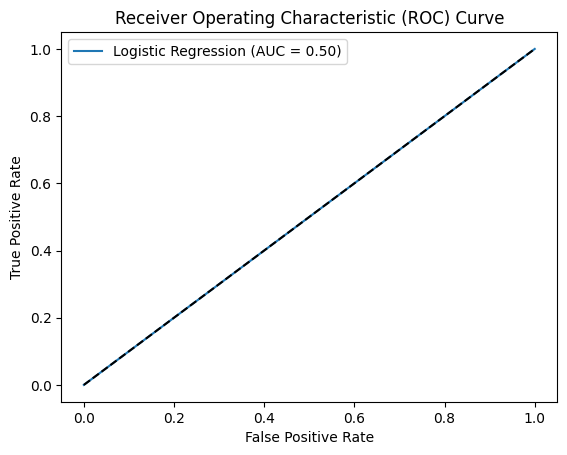

[[1035    0]
 [ 374    0]]


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

y_prob = Reg_Log.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Printing the confusion matrix
y_pred = Reg_Log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

### Random Forest

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 200) #1 Paso : Instanciar el algoritmo
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [ ]:
# separamos las caracteristicas/features del target
X = df_num[columnas1]
y = df_num['Churn Value']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
clf.fit(X_train, y_train) #2 Paso: Aprende de los datos
y_pred= clf.predict(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 4.69277567e-55, 2.00381201e-55, 1.80344982e-61,
       1.41630143e-61, 1.05893917e-61])

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9006387508871541


In [ ]:
confusion_matrix(y_test, y_pred)

array([[986,  49],
       [ 91, 283]])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 0.7567
Precision: 0.8524
F1: 0.8017
Accuracy: 0.9006


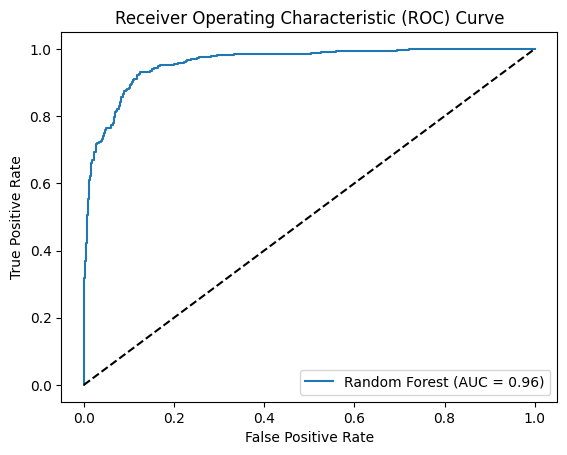

[[986  49]
 [ 91 283]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicting the probabilities for the test set
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Printing the confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

### Árbol del modelo y resultados

Se escoge un modelo de ML por clasificación, ya que se requiere predecir si un cliente es potencial churn o no con el fin de hacerle una oferta de fidelización de manera proactiva.

#### Train & Test Split

In [ ]:
# split del dataset
from sklearn.model_selection import train_test_split

In [ ]:
# separamos las caracteristicas/features del target
X = df_num[columnas1]
y = df_num['Churn Value']

In [ ]:
# train test split

from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (5634, 6)
Tamaño del set de testeo: (1409, 6)


In [ ]:
# porcentaje de clase True en train
100*y_train.sum()/len(y_train)

26.53532126375577

In [ ]:
# porcentaje de clase True en test
100*y_test.sum()/len(y_test)

26.543647977288856

#### Árbol de Decisión:

In [ ]:
# modelos
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Paso 1: Instanciar el objeto/modelo
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

In [ ]:
# entrenamiento
#Paso 2: Ajustar el modelo con los datos
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

#### Predicciones

In [ ]:
# predicciones
# Paso 3: Predecir
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [ ]:
X_test.shape, y_test.shape

((1409, 6), (1409,))

In [ ]:
y_pred.shape

(1409,)

In [ ]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test[:10].values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

#### Evaluación y métricas

In [ ]:
# evaluacion
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Which average should I choose?

* In general, if you are working with an imbalanced dataset where all classes are equally important, using the macro average would be a good choice as it treats all classes equally.
It means that for our example involving the classification of airplanes, boats, and cars, we would use the macro-F1 score.
* If you have an imbalanced dataset but want to assign greater contribution to classes with more examples in the dataset, then the weighted average is preferred.
This is because, in weighted averaging, the contribution of each class to the F1 average is weighted by its size.
* Suppose you have a balanced dataset and want an easily understandable metric for overall performance regardless of the class. In that case, you can go with accuracy, which is essentially our micro F1 score

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

Considero que las características del dataset clasifica en la segunda categoría de la pregunta de arriba:
* El dataset está desbalanceado ya que la distribución de los clientes no es uniforme dentro del atributo Contrato.
* Los valores de Contrato se deberían tratar de manera igualitaria.

In [ ]:
av_selected = 'macro'

In [ ]:
recall = recall_score(y_train, y_pred_train, average= av_selected)
precision = precision_score(y_train, y_pred_train, average = av_selected)
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average = av_selected)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 1.0000
Precision: 1.0000
F1: 1.0000
Accuracy: 1.0000


In [ ]:
recall = recall_score(y_test, y_pred, average=av_selected)
precision = precision_score(y_test, y_pred, average=av_selected)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=av_selected)

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TEST:
Recall: 0.8915
Precision: 0.8760
F1: 0.8832
Accuracy: 0.9070


In [ ]:
confusion_matrix(y_test, y_pred)

array([[957,  78],
       [ 53, 321]])

In [ ]:
y_test.value_counts()

0    1035
1     374
Name: Churn Value, dtype: int64

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
pd.Series(y_pred).value_counts()

0    1010
1     399
dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1035
           1       0.80      0.86      0.83       374

    accuracy                           0.91      1409
   macro avg       0.88      0.89      0.88      1409
weighted avg       0.91      0.91      0.91      1409



In [ ]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_test_pred = tree.predict(X_test) #Prediccion en Test

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 0.8824
Precision: 0.8108
F1: 0.8451
Accuracy: 0.9141


roc_auc_score for DecisionTree:  0.9039784029553851


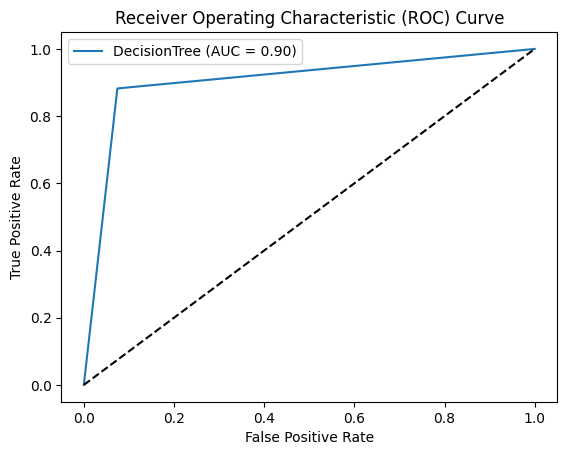

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = tree.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

# Calculate the ROC AUC score
roc_auc1 = roc_auc_score(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc1)

# Plot the ROC curve
plt.plot(false_positive_rate1, true_positive_rate1, label=f'DecisionTree (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Conclusiones

*